/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Number of members in each cluster for K-means Clustering:
0     4
1    51
2     4
Name: K-means_Cluster, dtype: int64
K-means Method:
Silhouette Score: 0.5451
Davies-Bouldin Index: 0.9444

Number of members in each cluster for Agglomerative Clustering:
0    24
1     4
2    31
Name: Agglomerative_Cluster, dtype: int64
Agglomerative Method:
Silhouette Score: 0.3529
Davies-Bouldin Index: 1.0839

Number of members in each cluster for Spectral Clustering:
0    56
1     2
2     1
Name: Spectral_Cluster, dtype: int64
Spectral Method:
Silhouette Score: 0.5542
Davies-Bouldin Index: 0.5407

Number of members in each cluster for DBSCAN Clustering:
-1    39
 0    14
 1     6
Name: DBSCAN_Cluster, dtype: int64
DBSCAN Method:
Silhouette Score: -0.0906
Davies-Bouldin Index: 1.3352

Number of members in each cluster for MeanShift Clustering:
0    47
1     2
2     1
3     1
4     1
5     3
6     2
7     1
8     1
Name: MeanShift_Cluster, dtype: int64
MeanShift Method:
Silhouette Score: 0.2916
Davies-Bo

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best method: Spectral
Best subset of residual columns: ('residual_normal_cd3_18h_ifng',)
Best metrics: {'Silhouette': 0.8101155124433879, 'Davies_Bouldin': 0.08062406771319768, 'Composite': 0.7294914447301902}


/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/4178722100.py:167: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


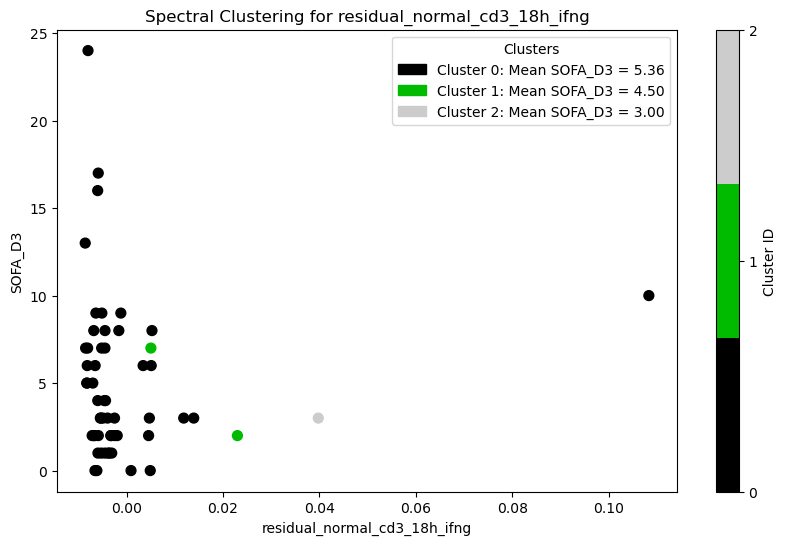

In [34]:
#control for apache

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, MeanShift, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.linear_model import LinearRegression
import itertools
import matplotlib.patches as mpatches
from itertools import chain, combinations

# Function to impute SOFA_D3
def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

# Read the data
df = pd.read_csv('20231026_Data_combined_python_D1.csv')

# Filter only septic patients
df = df[df['Sepsis'] == 1]

# Apply the impute_sofa_day3 function to the 'SOFA_D3' column
df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)

# Drop rows where 'SOFA_D3' is still NaN after imputation
df.dropna(subset=['SOFA_D3'], inplace=True)

# Columns you want to control for 'apache'
columns_to_control = [
    'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 
    'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
    'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
]

# Create a list to hold the names of the residual columns
residual_columns = []

for col in columns_to_control:
    # Prepare the features
    temp_df = df[['apache', col]].dropna()
    X = temp_df[['apache']].values
    y = temp_df[col].values
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate the residuals and store them back in the DataFrame
    df.loc[temp_df.index, f'residual_{col}'] = y - model.predict(X)
    
    # Append the residual column name to the list
    residual_columns.append(f'residual_{col}')


# Function to optimize clustering according to SOFA_D3
def optimize_clustering(df, method_name, columns):
    # Initialize method
    if method_name == 'K-means':
        method = KMeans(n_clusters=3, random_state=42)
    elif method_name == 'Agglomerative':
        method = AgglomerativeClustering(n_clusters=3)
    elif method_name == 'Spectral':
        method = SpectralClustering(n_clusters=3, random_state=42)
    elif method_name == 'DBSCAN':
        method = DBSCAN(eps=0.5, min_samples=5)
    elif method_name == 'MeanShift':
        method = MeanShift()
    elif method_name == 'AffinityPropagation':
        method = AffinityPropagation()
    
    # Impute and scale the columns
    imputer = SimpleImputer(strategy="mean")
    df_imputed = imputer.fit_transform(df[columns])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_imputed)
    
    # Fit and predict
    labels = method.fit_predict(X_scaled)
    
    # Evaluate silhouette score
    silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else 0
    davies_bouldin = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else float('inf')
    
    return labels, silhouette, davies_bouldin

# Clustering methods with adjustable n_clusters
methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN', 'MeanShift', 'AffinityPropagation']

# Create a dictionary to store the evaluation metrics for each method
evaluation_metrics = {}

for method in methods:
    labels, silhouette, davies_bouldin = optimize_clustering(df, method, residual_columns[:-1])  # Exclude 'residual_SOFA_D3'
    
    # Store the evaluation metrics
    evaluation_metrics[method] = {
        'Silhouette': silhouette,
        'Davies_Bouldin': davies_bouldin,
        'Composite': silhouette - davies_bouldin
    }

    # Add the labels as a new column to the DataFrame
    df[f'{method}_Cluster'] = labels

    # Calculate and print the number of members in each cluster
    cluster_counts = df[f'{method}_Cluster'].value_counts().sort_index()
    print(f"Number of members in each cluster for {method} Clustering:")
    print(cluster_counts)
    
    # Calculate the mean SOFA_D3 value for each cluster
    mean_sofa_per_cluster = df.groupby(f'{method}_Cluster')['SOFA_D3'].mean()
    
    print(f"{method} Method:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}\n")

# Generate all non-empty subsets of residual_columns
def all_subsets(lst):
    return chain(*[combinations(lst, i + 1) for i, _ in enumerate(lst)])

# Store the best metrics
best_metrics = {
    'Silhouette': -1,
    'Davies_Bouldin': float('inf'),
    'Composite': -float('inf')
}
best_subset = None
best_method = None

# ... (previous code remains unchanged)

# Iterate over all subsets of residual_columns
for subset in all_subsets(residual_columns):
    for method in methods:
        labels, silhouette, davies_bouldin = optimize_clustering(df, method, list(subset))
        
        # Calculate composite score as Silhouette - Davies_Bouldin
        composite = silhouette - davies_bouldin
        
        # Update the best metrics and subset if this one is better
        if composite > best_metrics['Composite']:
            best_metrics['Silhouette'] = silhouette
            best_metrics['Davies_Bouldin'] = davies_bouldin
            best_metrics['Composite'] = composite
            best_subset = subset
            best_method = method

print(f"Best method: {best_method}")
print(f"Best subset of residual columns: {best_subset}")
print(f"Best metrics: {best_metrics}")

# Plotting scatter plots for the best subset
for col in best_subset:
    plt.figure(figsize=(10, 6))
    
    labels = df[f'{best_method}_Cluster']
    
    cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
    
    scatter = plt.scatter(df[col], df['SOFA_D3'], c=labels, cmap=cmap, s=50)
    
    cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
    cbar.set_label('Cluster ID')
    
    legend_patches = []
    for cluster_id in np.unique(labels):
        mean_sofa = df[df[f'{best_method}_Cluster'] == cluster_id]['SOFA_D3'].mean()
        patch = mpatches.Patch(color=cmap(cluster_id), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
        legend_patches.append(patch)
    
    plt.legend(handles=legend_patches, title='Clusters')
    
    plt.xlabel(f'{col}')
    plt.ylabel('SOFA_D3')
    plt.title(f'{best_method} Clustering for {col}')
    
    plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

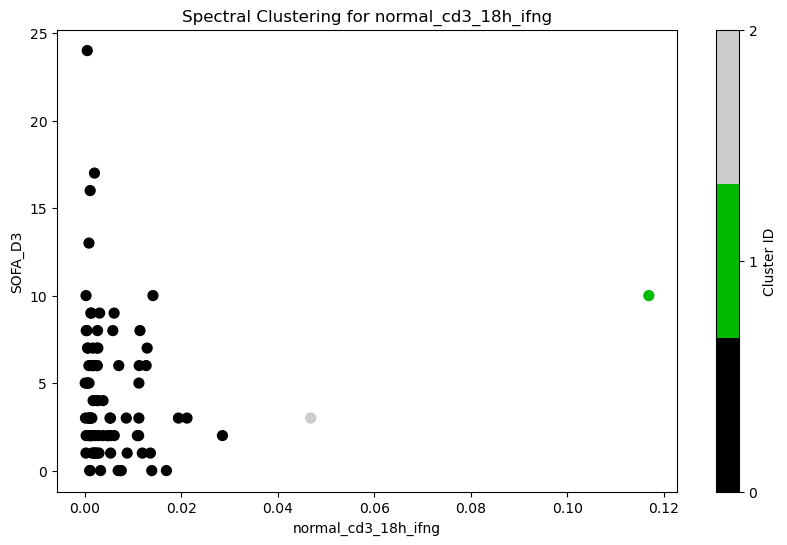

In [36]:
#modified so that
#1. get rid of adjustment of cytokines to apache
#2. get rid of mean shift and affinity propagation clustering
#3. include all patients (sepsis and CINS)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.patches as mpatches

# Function to impute SOFA_D3
def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

# Read and filter data
df = pd.read_csv('20231026_Data_combined_python_D1.csv')
df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
df.dropna(subset=['SOFA_D3'], inplace=True)

# Columns of interest
columns_of_interest = [
    'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 
    'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
    'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
]

# Clustering methods
methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']

# Function to optimize clustering
def optimize_clustering(df, method_name, columns):
    if method_name == 'K-means':
        method = KMeans(n_clusters=3, random_state=42)
    elif method_name == 'Agglomerative':
        method = AgglomerativeClustering(n_clusters=3)
    elif method_name == 'Spectral':
        method = SpectralClustering(n_clusters=3, random_state=42)
    elif method_name == 'DBSCAN':
        method = DBSCAN(eps=0.5, min_samples=5)
    
    imputer = SimpleImputer(strategy="mean")
    df_imputed = imputer.fit_transform(df[columns])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_imputed)
    
    labels = method.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else 0
    davies_bouldin = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else float('inf')
    
    return labels, silhouette, davies_bouldin

# Evaluate each method
best_metrics = {'Composite': -float('inf')}
best_method = None
best_column = None

for method in methods:
    for col in columns_of_interest:
        labels, silhouette, davies_bouldin = optimize_clustering(df, method, [col])
        composite = silhouette - davies_bouldin
        if composite > best_metrics['Composite']:
            best_metrics = {'Silhouette': silhouette, 'Davies_Bouldin': davies_bouldin, 'Composite': composite}
            best_method = method
            best_column = col

# Plotting
plt.figure(figsize=(10, 6))
labels, _, _ = optimize_clustering(df, best_method, [best_column])
cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
scatter = plt.scatter(df[best_column], df['SOFA_D3'], c=labels, cmap=cmap, s=50)
cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
cbar.set_label('Cluster ID')

plt.xlabel(best_column)
plt.ylabel('SOFA_D3')
plt.title(f'{best_method} Clustering for {best_column}')
plt.show()


Method: K-means, Column: normal_cd3_4h_ifng
Silhouette Score: 0.7655
Davies-Bouldin Index: 0.3821
Composite Score: 0.3834
Number of members in each cluster: 0    51
1     4
2     4
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


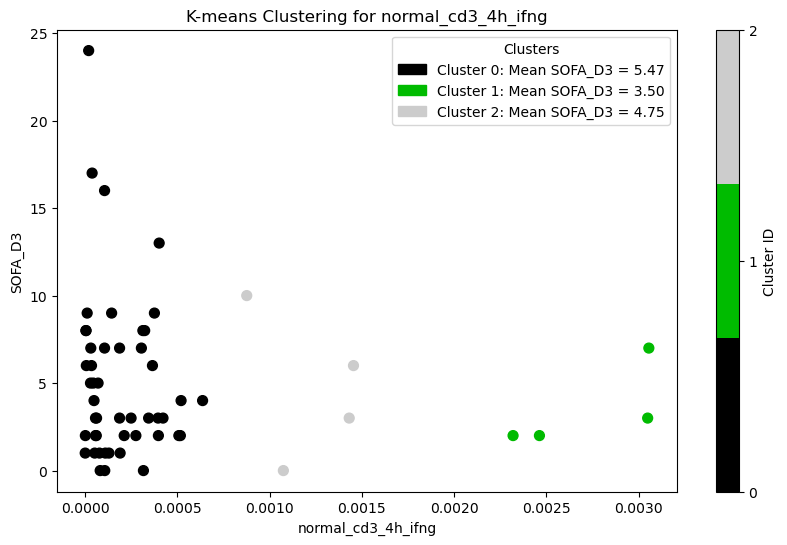

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


Method: K-means, Column: normal_cd3_18h_ifng
Silhouette Score: 0.7783
Davies-Bouldin Index: 0.3512
Composite Score: 0.4271
Number of members in each cluster: 0    54
1     1
2     4
dtype: int64



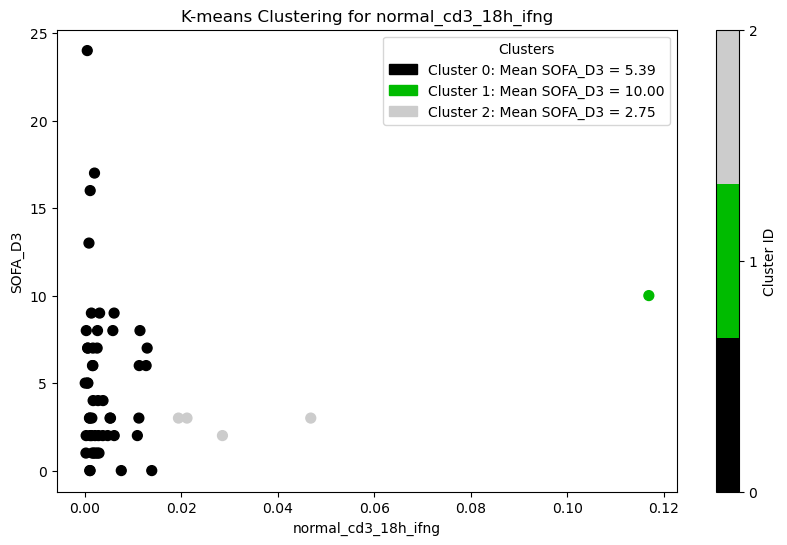

Method: K-means, Column: normal_pma_4h_ifng
Silhouette Score: 0.6114
Davies-Bouldin Index: 0.4749
Composite Score: 0.1365
Number of members in each cluster: 0    43
1     5
2    11
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


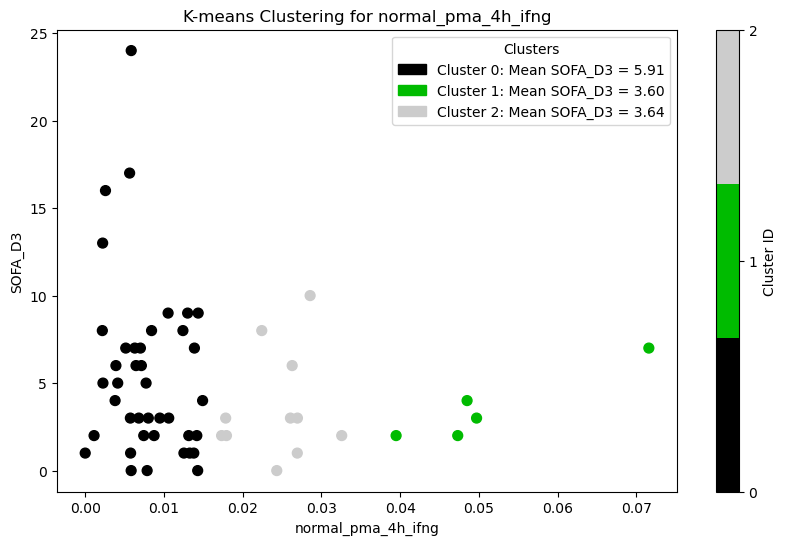

Method: K-means, Column: normal_pma_18h_ifng
Silhouette Score: 0.6779
Davies-Bouldin Index: 0.3521
Composite Score: 0.3258
Number of members in each cluster: 0    48
1     1
2    10
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


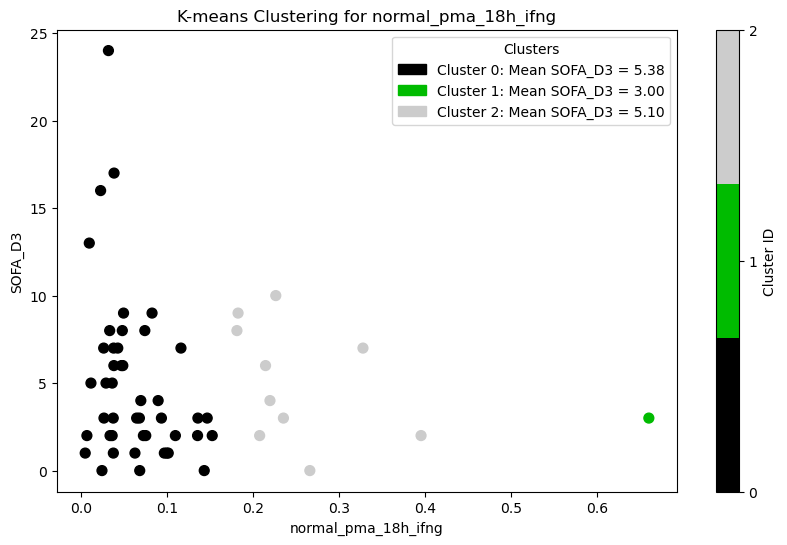

Method: K-means, Column: lps_4h_tnf
Silhouette Score: 0.6174
Davies-Bouldin Index: 0.4108
Composite Score: 0.2066
Number of members in each cluster: 0    43
1    15
2     1
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


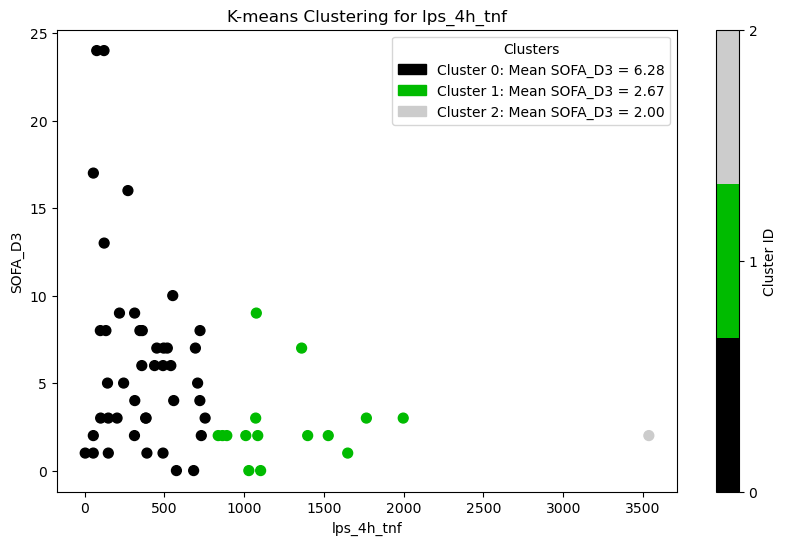

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


Method: K-means, Column: lps_18h_tnf
Silhouette Score: 0.6773
Davies-Bouldin Index: 0.4389
Composite Score: 0.2384
Number of members in each cluster: 0    45
1    12
2     2
dtype: int64



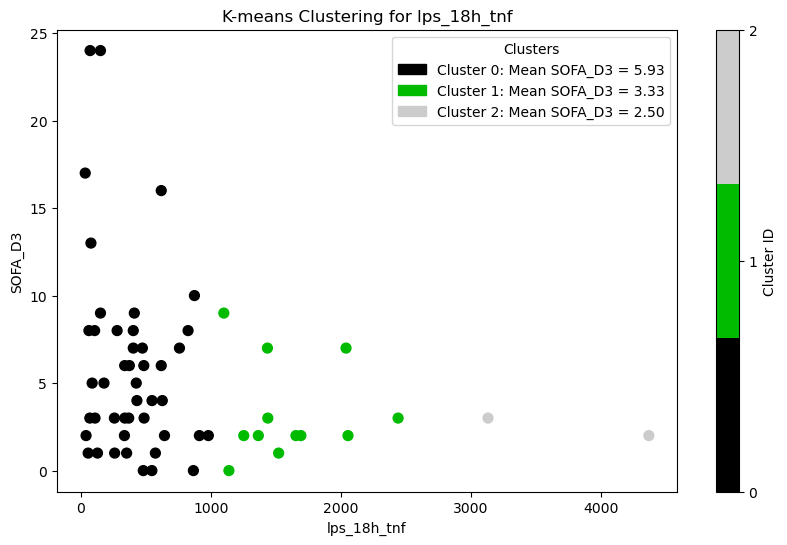

Method: K-means, Column: lps_4h_il6
Silhouette Score: 0.6258
Davies-Bouldin Index: 0.4790
Composite Score: 0.1468
Number of members in each cluster: 0    44
1     2
2    13
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


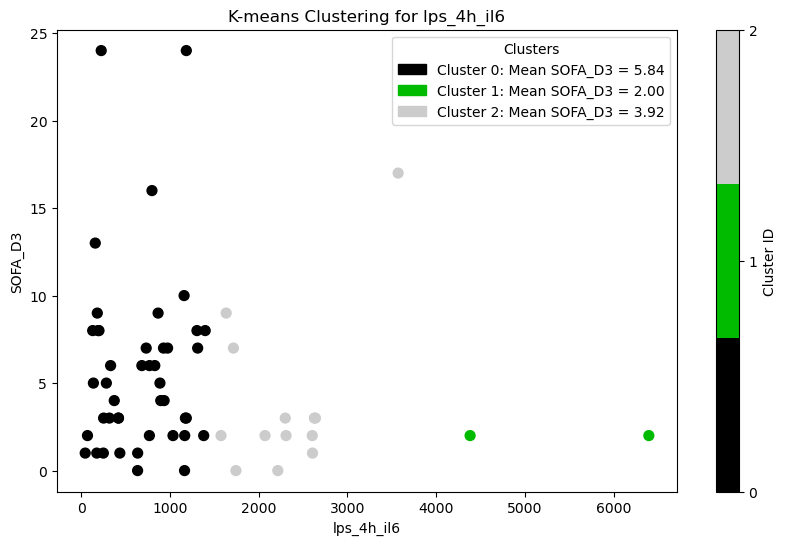

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Method: K-means, Column: lps_18h_il6
Silhouette Score: 0.6473
Davies-Bouldin Index: 0.4434
Composite Score: 0.2039
Number of members in each cluster: 0    37
1     5
2    17
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


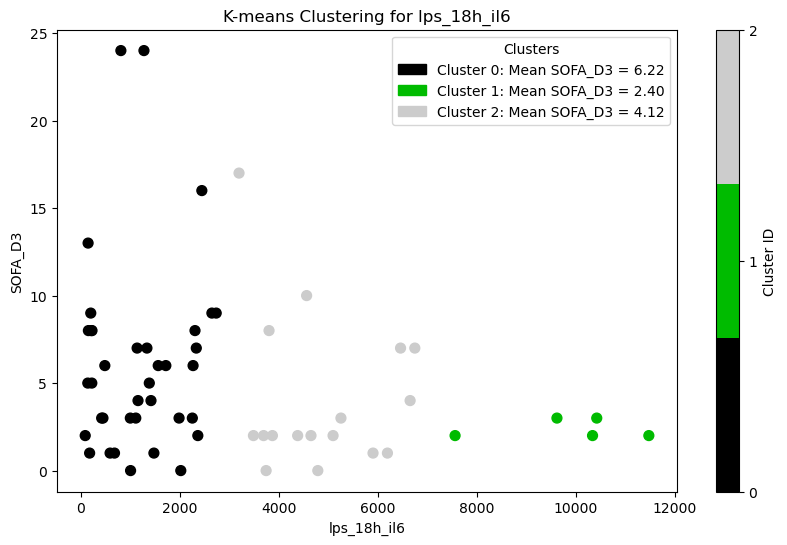

/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


Method: Agglomerative, Column: normal_cd3_4h_ifng
Silhouette Score: 0.7655
Davies-Bouldin Index: 0.3821
Composite Score: 0.3834
Number of members in each cluster: 0    51
1     4
2     4
dtype: int64



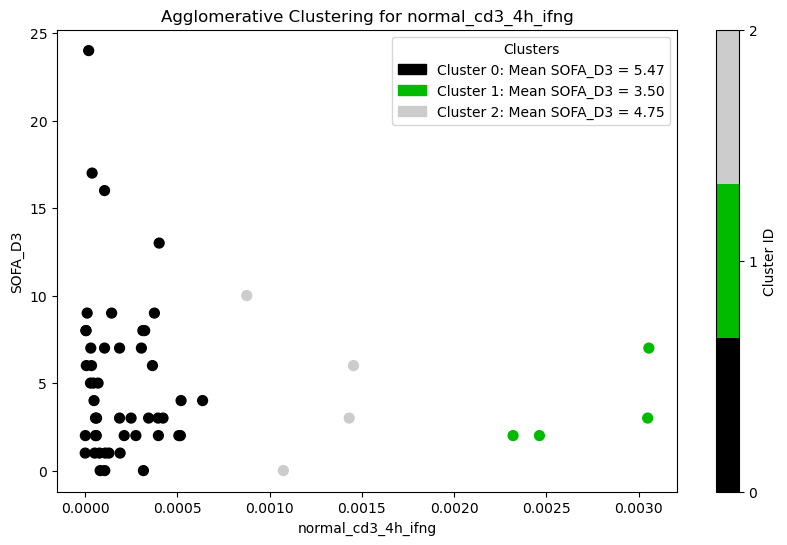

Method: Agglomerative, Column: normal_cd3_18h_ifng
Silhouette Score: 0.7783
Davies-Bouldin Index: 0.3512
Composite Score: 0.4271
Number of members in each cluster: 0    54
1     1
2     4
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


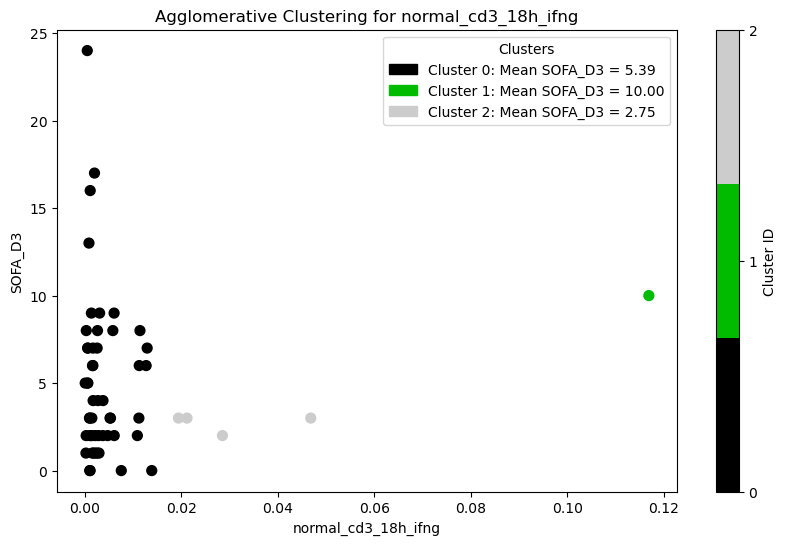

Method: Agglomerative, Column: normal_pma_4h_ifng
Silhouette Score: 0.6630
Davies-Bouldin Index: 0.4486
Composite Score: 0.2144
Number of members in each cluster: 0    46
1     4
2     9
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


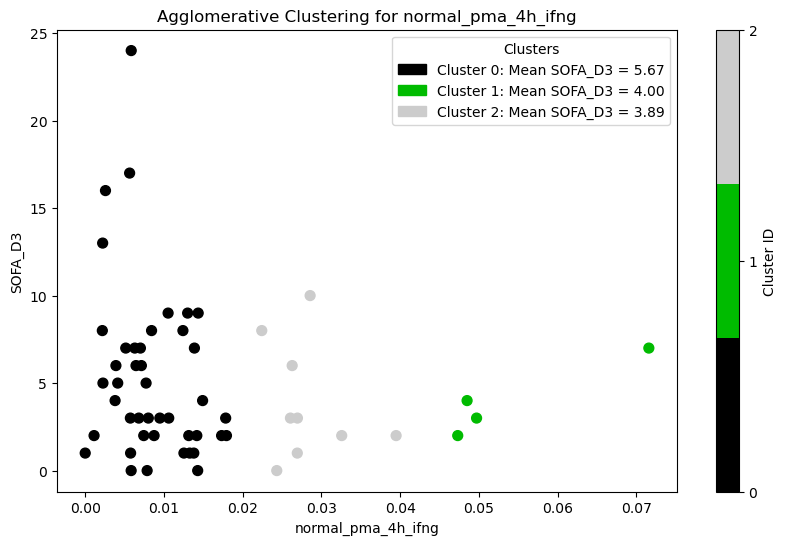

Method: Agglomerative, Column: normal_pma_18h_ifng
Silhouette Score: 0.6460
Davies-Bouldin Index: 0.3911
Composite Score: 0.2549
Number of members in each cluster: 0    15
1    43
2     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


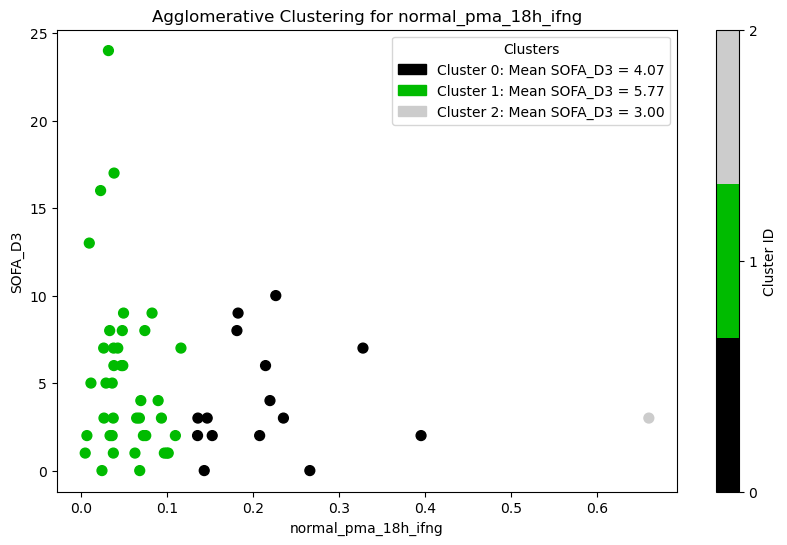

Method: Agglomerative, Column: lps_4h_tnf
Silhouette Score: 0.5869
Davies-Bouldin Index: 0.4225
Composite Score: 0.1645
Number of members in each cluster: 0    22
1    36
2     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


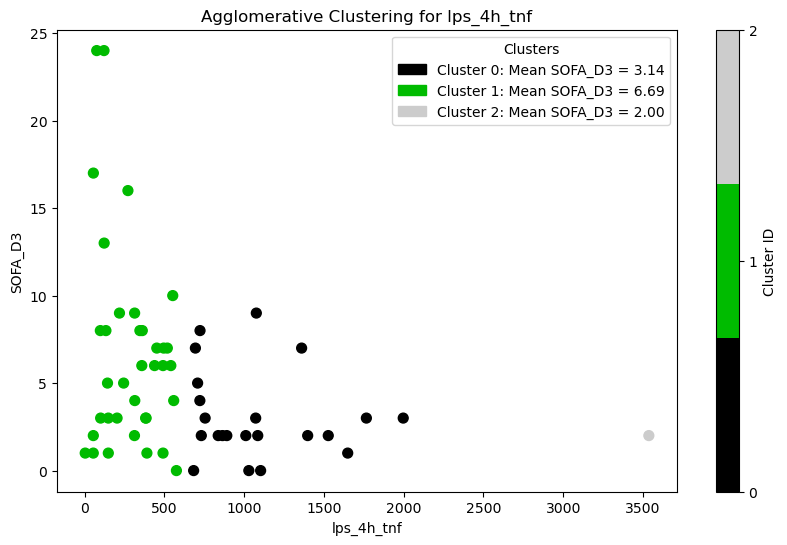

Method: Agglomerative, Column: lps_18h_tnf
Silhouette Score: 0.6221
Davies-Bouldin Index: 0.5921
Composite Score: 0.0300
Number of members in each cluster: 0     5
1    39
2    15
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


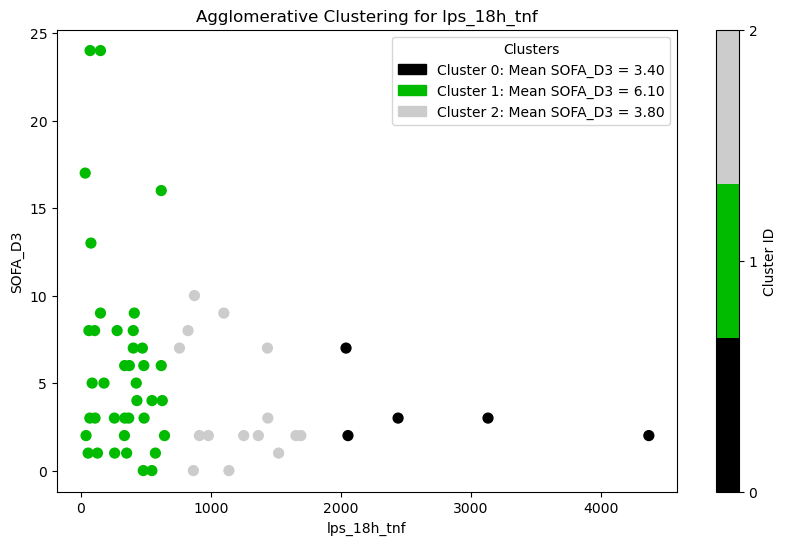

Method: Agglomerative, Column: lps_4h_il6
Silhouette Score: 0.6536
Davies-Bouldin Index: 0.3530
Composite Score: 0.3006
Number of members in each cluster: 0    48
1    10
2     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


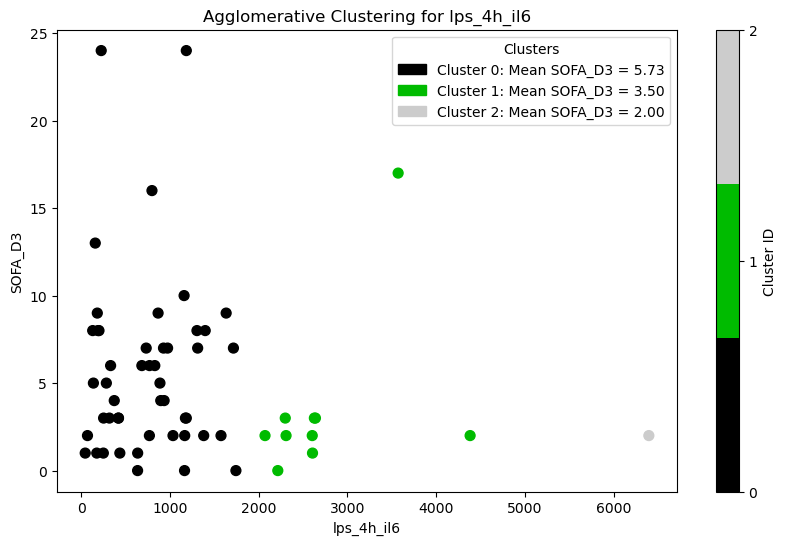

Method: Agglomerative, Column: lps_18h_il6
Silhouette Score: 0.6615
Davies-Bouldin Index: 0.4150
Composite Score: 0.2465
Number of members in each cluster: 0    18
1    37
2     4
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


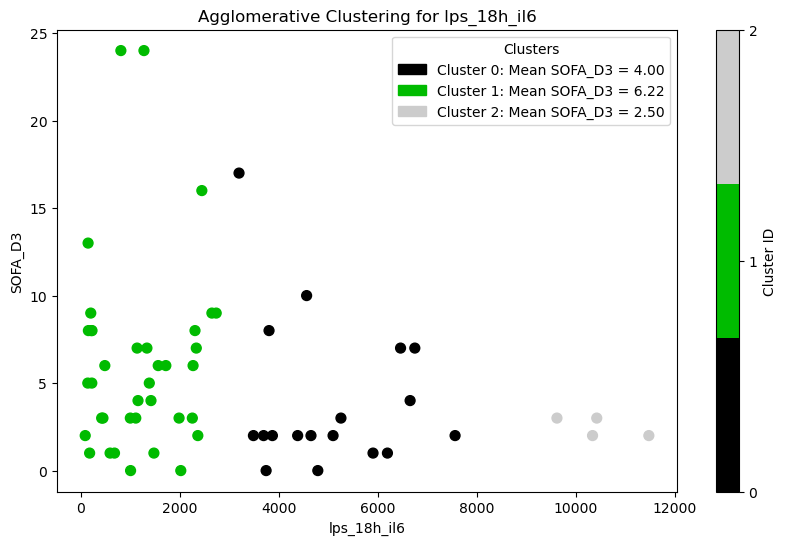

Method: Spectral, Column: normal_cd3_4h_ifng
Silhouette Score: 0.7639
Davies-Bouldin Index: 0.2473
Composite Score: 0.5167
Number of members in each cluster: 0    53
1     4
2     2
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


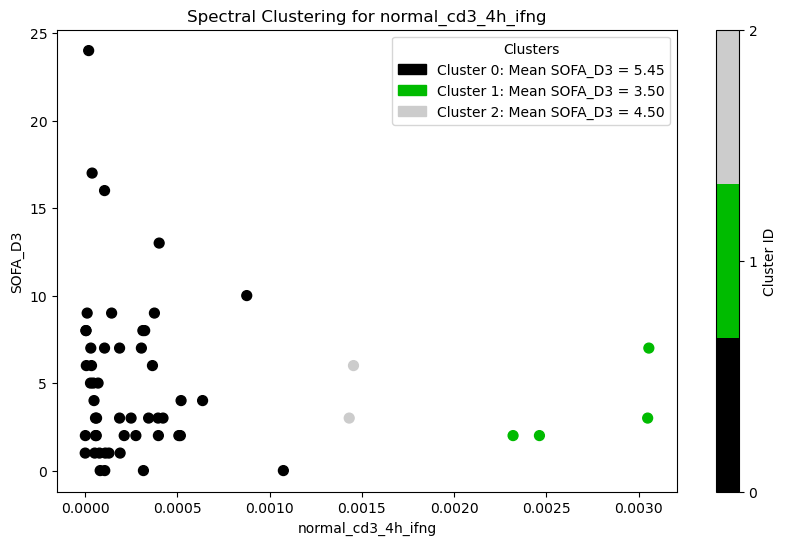

Method: Spectral, Column: normal_cd3_18h_ifng
Silhouette Score: 0.8183
Davies-Bouldin Index: 0.0794
Composite Score: 0.7388
Number of members in each cluster: 0    57
1     1
2     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


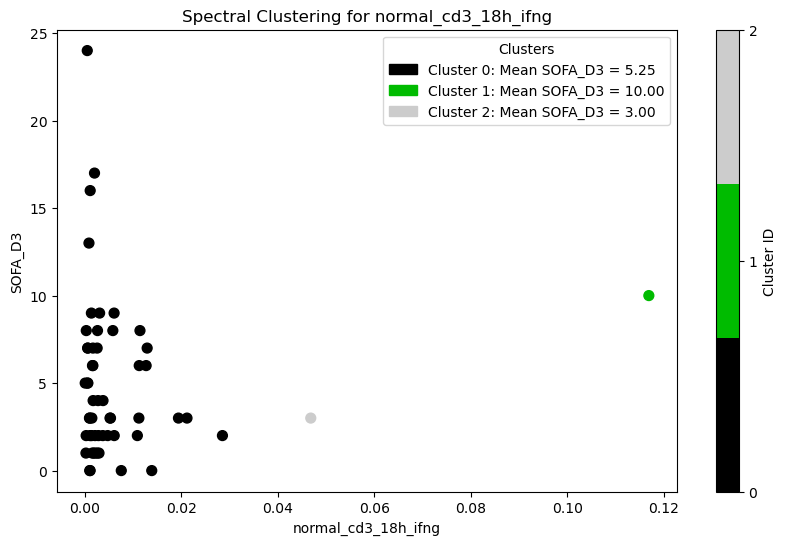

Method: Spectral, Column: normal_pma_4h_ifng
Silhouette Score: 0.6630
Davies-Bouldin Index: 0.4486
Composite Score: 0.2144
Number of members in each cluster: 0     9
1     4
2    46
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


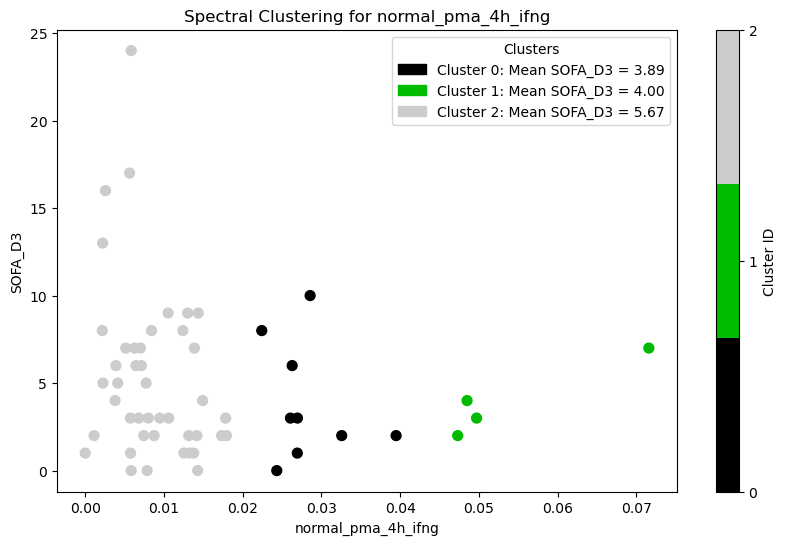

Method: Spectral, Column: normal_pma_18h_ifng

/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)



Silhouette Score: 0.6727
Davies-Bouldin Index: 0.2474
Composite Score: 0.4253
Number of members in each cluster: 0     2
1     1
2    56
dtype: int64



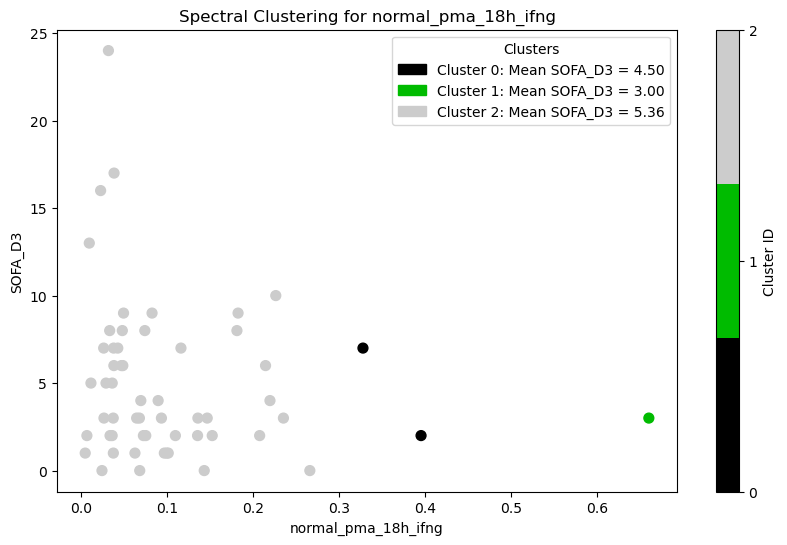

Method: Spectral, Column: lps_4h_tnf
Silhouette Score: 0.6067
Davies-Bouldin Index: 0.2700
Composite Score: 0.3367
Number of members in each cluster: 0     4
1     1
2    54
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


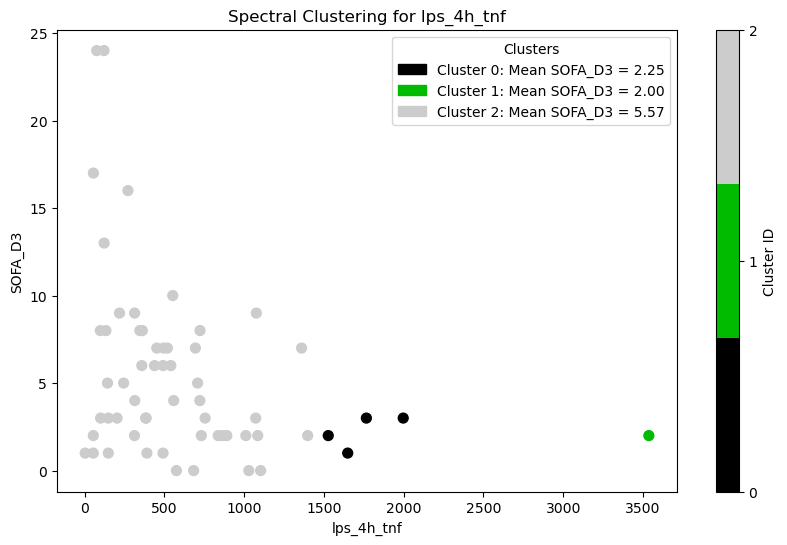

Method: Spectral, Column: lps_18h_tnf
Silhouette Score: 0.6770
Davies-Bouldin Index: 0.1599
Composite Score: 0.5171
Number of members in each cluster: 0    57
1     1
2     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


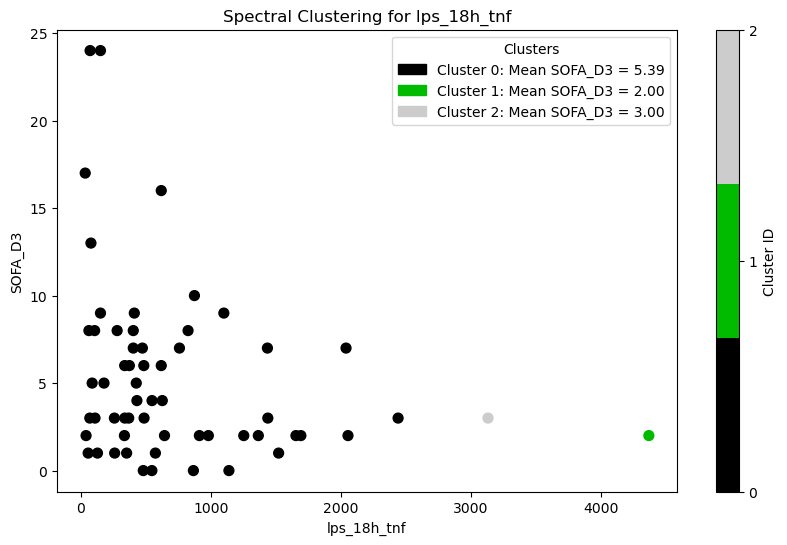

Method: Spectral, Column: lps_4h_il6
Silhouette Score: 0.6586
Davies-Bouldin Index: 0.1672
Composite Score: 0.4914
Number of members in each cluster: 0    57
1     1
2     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


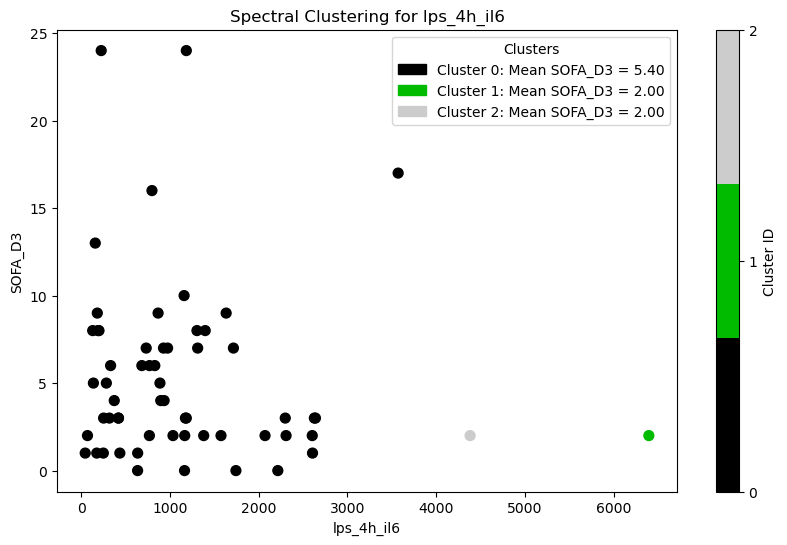

Method: Spectral, Column: lps_18h_il6
Silhouette Score: 0.6332
Davies-Bouldin Index: 0.3981
Composite Score: 0.2352
Number of members in each cluster: 0    12
1    43
2     4
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


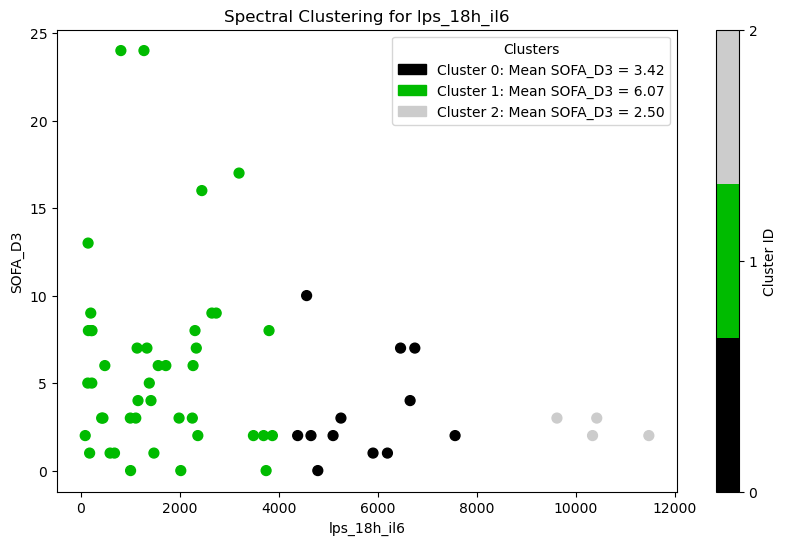

Method: DBSCAN, Column: normal_cd3_4h_ifng
Silhouette Score: 0.8216
Davies-Bouldin Index: 0.4480
Composite Score: 0.3736
Number of members in each cluster: -1     7
 0    52
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


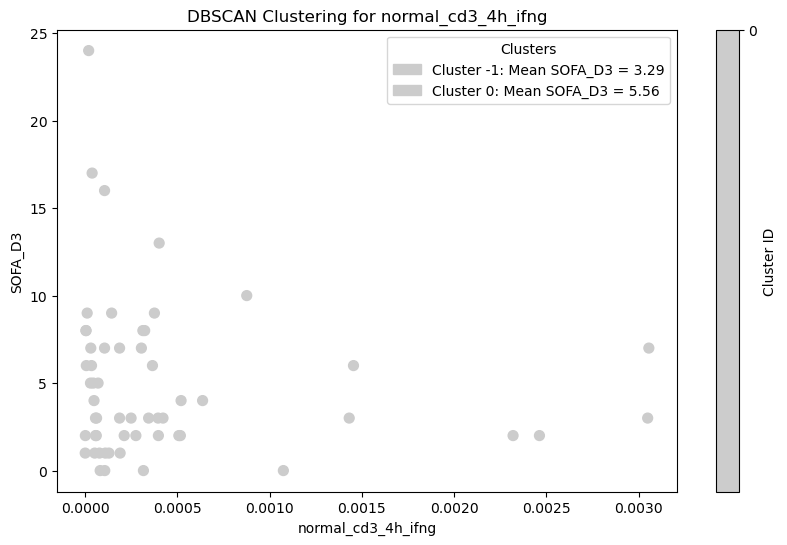

Method: DBSCAN, Column: normal_cd3_18h_ifng
Silhouette Score: 0.8623
Davies-Bouldin Index: 0.6524
Composite Score: 0.2099
Number of members in each cluster: -1     3
 0    56
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


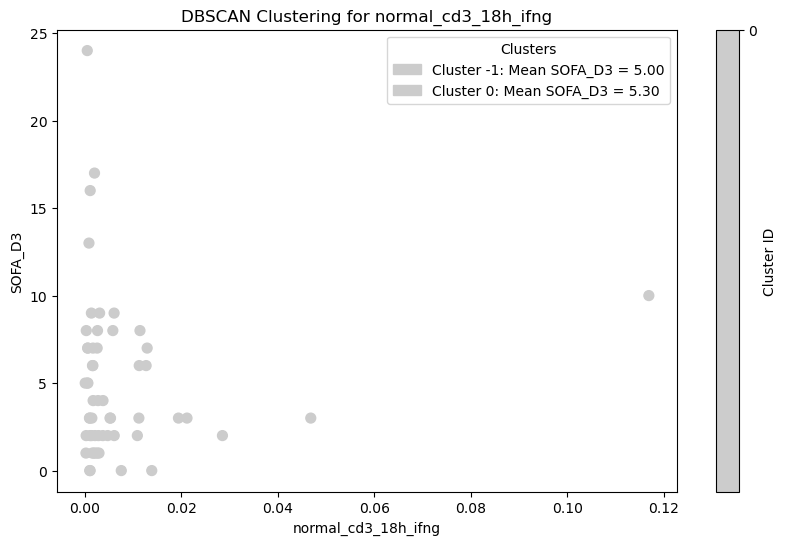

Method: DBSCAN, Column: normal_pma_4h_ifng
Silhouette Score: 0.7425
Davies-Bouldin Index: 0.3635
Composite Score: 0.3790
Number of members in each cluster: -1     5
 0    54
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


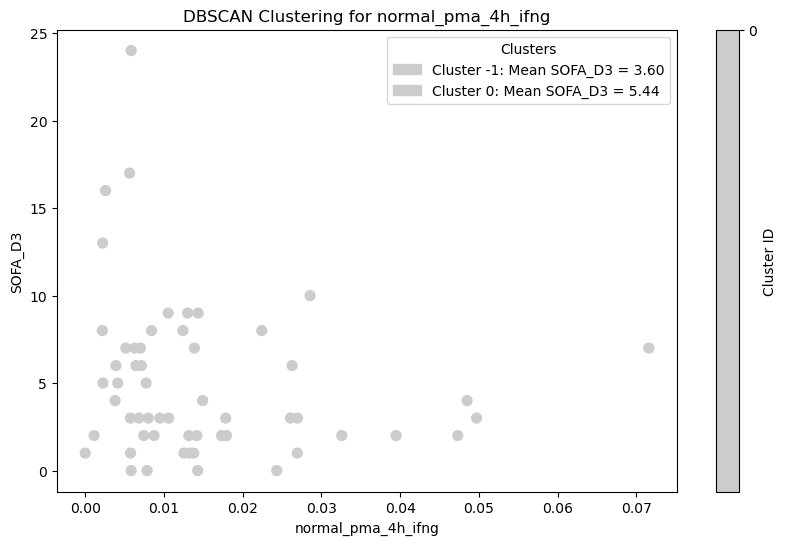

Method: DBSCAN, Column: normal_pma_18h_ifng
Silhouette Score: 0.7624
Davies-Bouldin Index: 0.4953
Composite Score: 0.2671
Number of members in each cluster: -1     3
 0    56
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


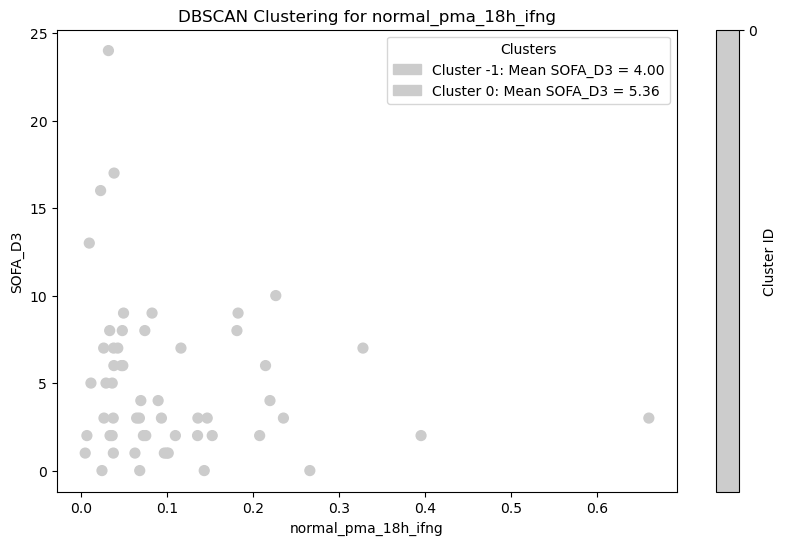

Method: DBSCAN, Column: lps_4h_tnf
Silhouette Score: 0.7312
Davies-Bouldin Index: 0.5064
Composite Score: 0.2247
Number of members in each cluster: -1     2
 0    57
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


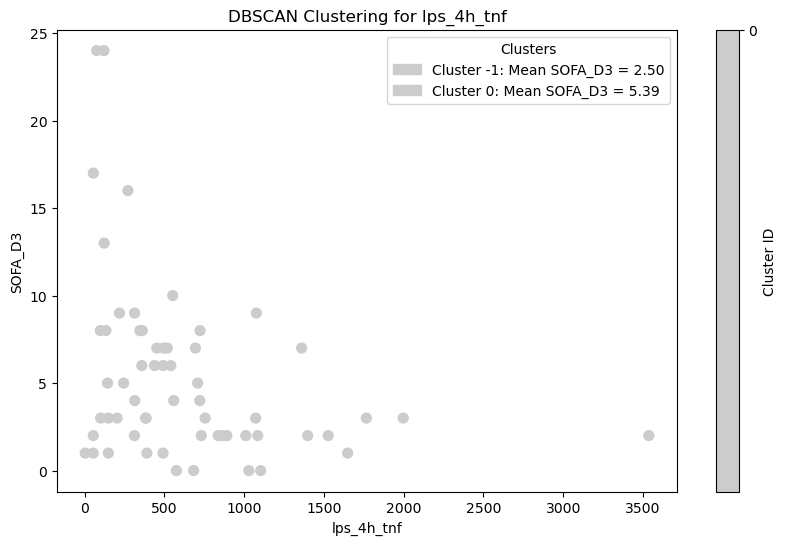

Method: DBSCAN, Column: lps_18h_tnf
Silhouette Score: 0.7640
Davies-Bouldin Index: 0.3432
Composite Score: 0.4208
Number of members in each cluster: -1     2
 0    57
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


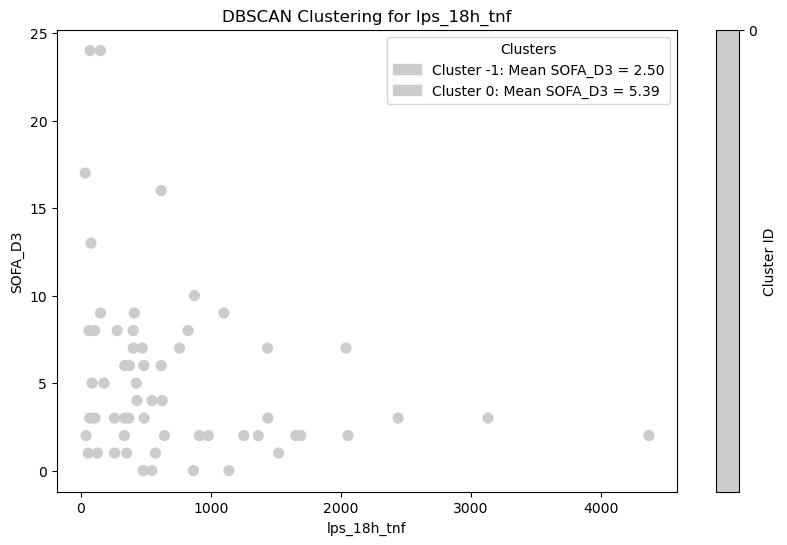

Method: DBSCAN, Column: lps_4h_il6
Silhouette Score: 0.7377
Davies-Bouldin Index: 0.4410
Composite Score: 0.2967
Number of members in each cluster: -1     3
 0    56
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


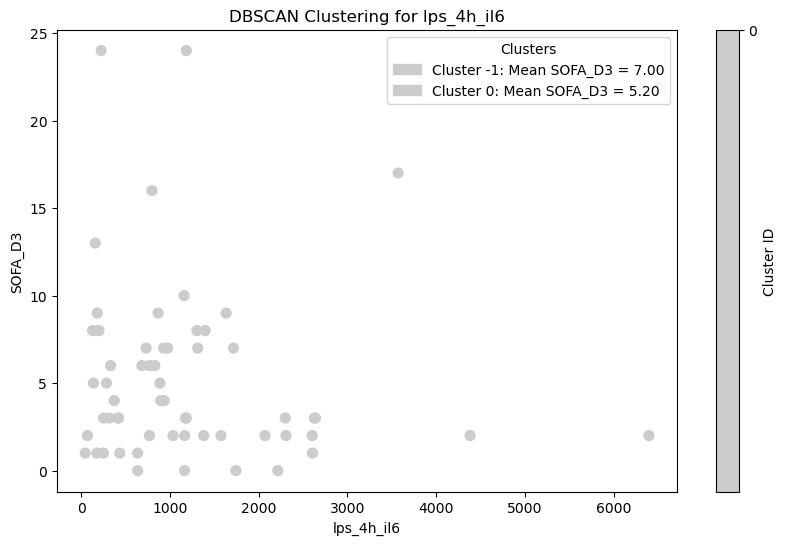

Method: DBSCAN, Column: lps_18h_il6
Silhouette Score: 0.6687
Davies-Bouldin Index: 0.2746
Composite Score: 0.3941
Number of members in each cluster: -1     4
 0    55
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/814518736.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


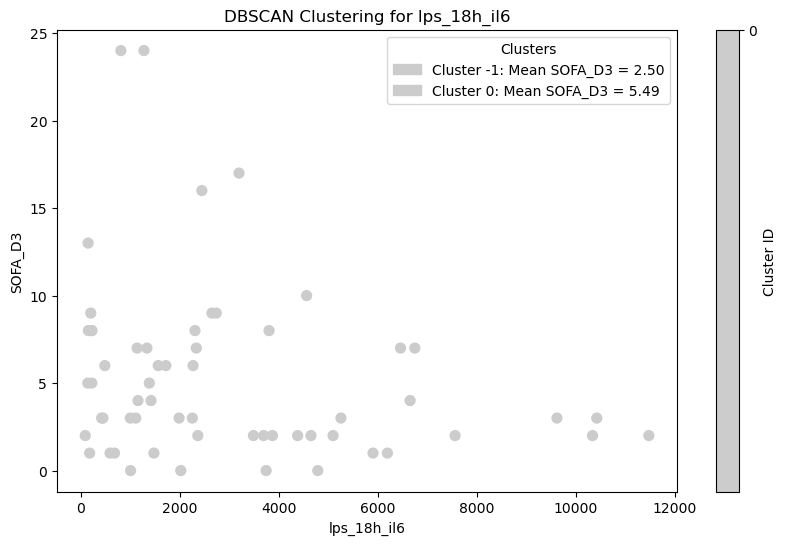

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.patches as mpatches

# Function to impute SOFA_D3
def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

# Read and filter data
df = pd.read_csv('20231026_Data_combined_python_D1.csv')
df = df[df['Sepsis'] == 1]
df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
df.dropna(subset=['SOFA_D3'], inplace=True)

# Columns of interest
columns_of_interest = [
    'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 
    'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
    'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
]

# Clustering methods
methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']

# Function to optimize clustering
def optimize_clustering(df, method_name, columns):
    if method_name == 'K-means':
        method = KMeans(n_clusters=3, random_state=42)
    elif method_name == 'Agglomerative':
        method = AgglomerativeClustering(n_clusters=3)
    elif method_name == 'Spectral':
        method = SpectralClustering(n_clusters=3, random_state=42)
    elif method_name == 'DBSCAN':
        method = DBSCAN(eps=0.5, min_samples=5)
    
    imputer = SimpleImputer(strategy="mean")
    df_imputed = imputer.fit_transform(df[columns])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_imputed)
    
    labels = method.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else 0
    davies_bouldin = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else float('inf')
    
    return labels, silhouette, davies_bouldin

# Evaluate each method and plot
for method in methods:
    for col in columns_of_interest:
        plt.figure(figsize=(10, 6))
        
        labels, silhouette, davies_bouldin = optimize_clustering(df, method, [col])
        composite = silhouette - davies_bouldin
        cluster_counts = pd.Series(labels).value_counts().sort_index()
        
        print(f"Method: {method}, Column: {col}")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f"Composite Score: {composite:.4f}")
        print(f"Number of members in each cluster: {cluster_counts}\n")
        
        cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
        scatter = plt.scatter(df[col], df['SOFA_D3'], c=labels, cmap=cmap, s=50)
        
        cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
        cbar.set_label('Cluster ID')
        
        legend_patches = []
        for cluster_id in np.unique(labels):
            mean_sofa = df[labels == cluster_id]['SOFA_D3'].mean()
            patch = mpatches.Patch(color=cmap(cluster_id), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
            legend_patches.append(patch)
        
        plt.legend(handles=legend_patches, title='Clusters')
        plt.xlabel(col)
        plt.ylabel('SOFA_D3')
        plt.title(f'{method} Clustering for {col}')
        plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Method: K-means, Column: normal_cd3_4h_ifng, Best num clusters: 2
Silhouette Score: 0.8362
Davies-Bouldin Index: 0.3640
Composite Score: 0.4722
Number of members in each cluster: 0    53
1     6
dtype: int64



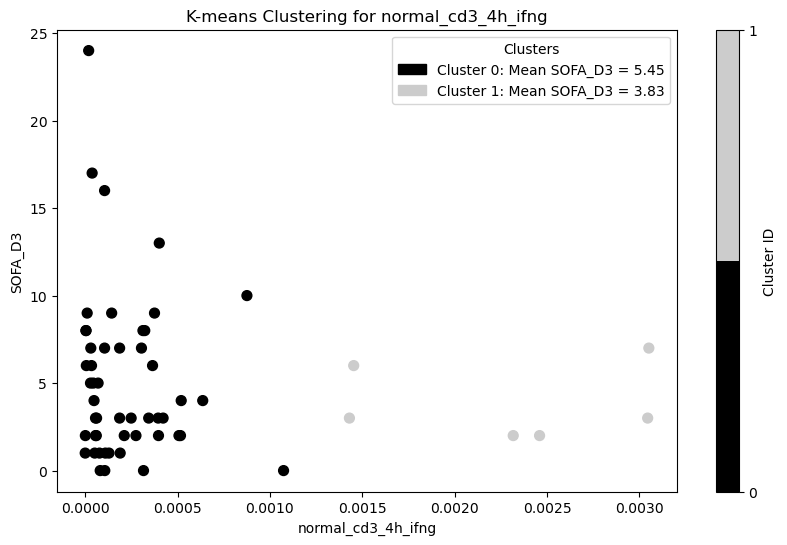

Method: K-means, Column: normal_cd3_18h_ifng, Best num clusters: 2
Silhouette Score: 0.9146
Davies-Bouldin Index: 0.0480
Composite Score: 0.8666
Number of members in each cluster: 0    58
1     1
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

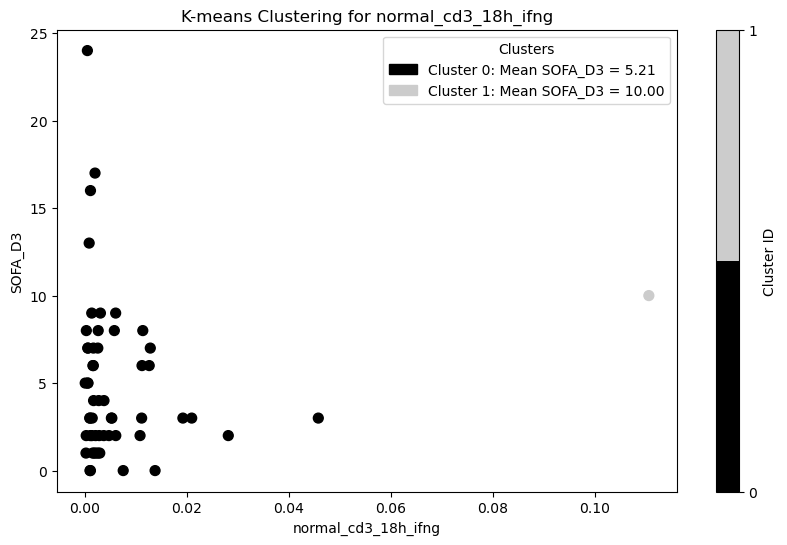

Method: K-means, Column: normal_pma_4h_ifng, Best num clusters: 2
Silhouette Score: 0.6941
Davies-Bouldin Index: 0.5705
Composite Score: 0.1236
Number of members in each cluster: 0    47
1    12
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

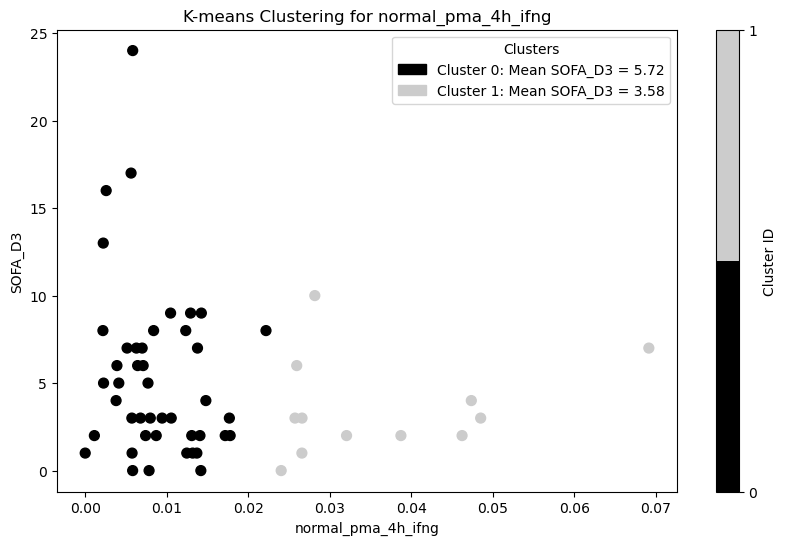

Method: K-means, Column: normal_pma_18h_ifng, Best num clusters: 2
Silhouette Score: 0.6879
Davies-Bouldin Index: 0.5604
Composite Score: 0.1275
Number of members in each cluster: 0    48
1    11
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

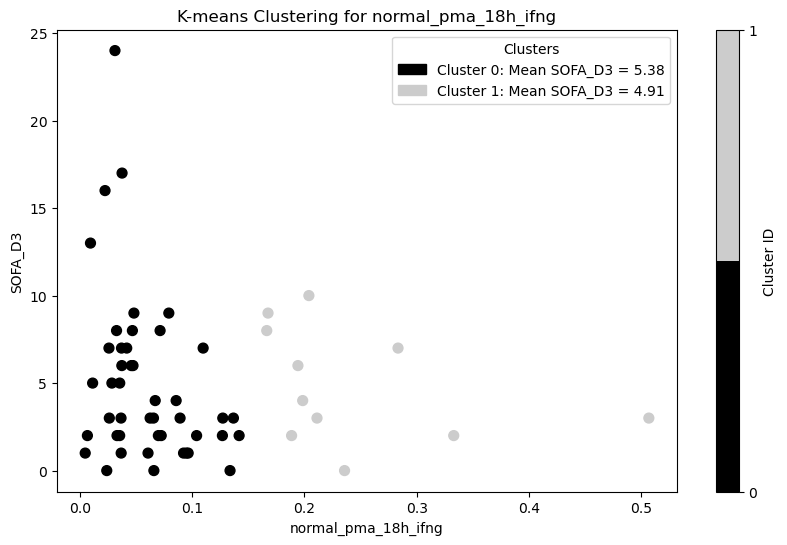

Method: K-means, Column: lps_4h_tnf, Best num clusters: 10
Silhouette Score: 0.6133
Davies-Bouldin Index: 0.3307
Composite Score: 0.2827
Number of members in each cluster: 0     9
1     4
2     1
3     9
4     7
5     8
6     6
7    10
8     1
9     4
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

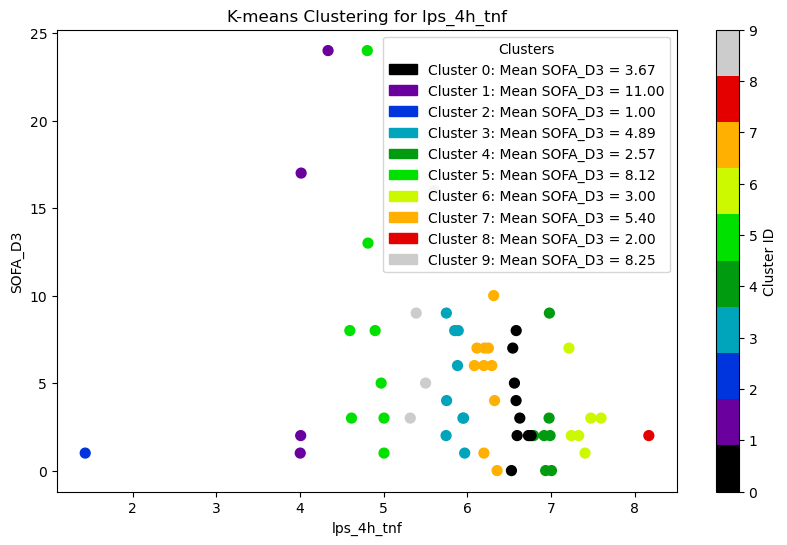

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Method: K-means, Column: lps_18h_tnf, Best num clusters: 3
Silhouette Score: 0.6158
Davies-Bouldin Index: 0.4526
Composite Score: 0.1632
Number of members in each cluster: 0    26
1    14
2    19
dtype: int64



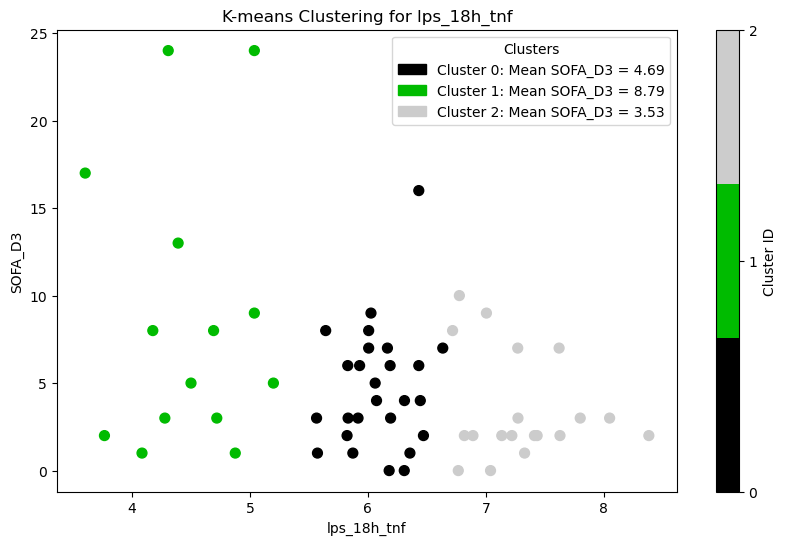

Method: K-means, Column: lps_4h_il6, Best num clusters: 2
Silhouette Score: 0.6461
Davies-Bouldin Index: 0.4764
Composite Score: 0.1697
Number of members in each cluster: 0    40
1    19
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

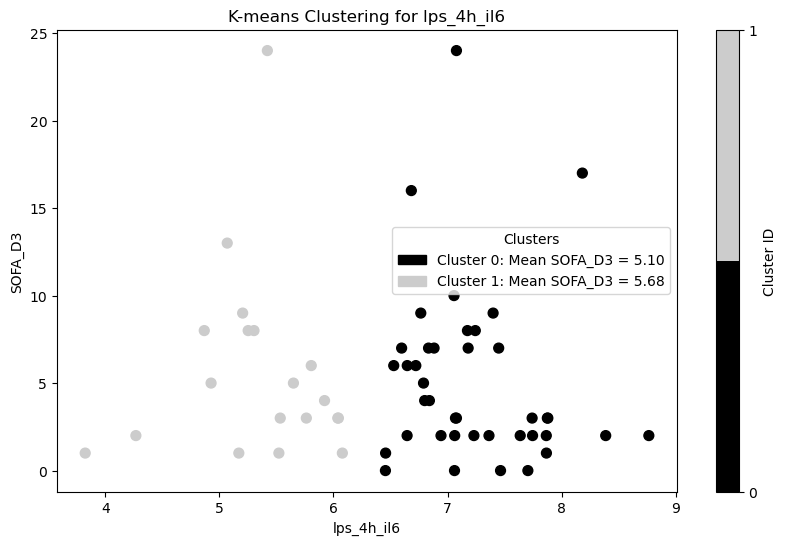

Method: K-means, Column: lps_18h_il6, Best num clusters: 2
Silhouette Score: 0.6291
Davies-Bouldin Index: 0.4843
Composite Score: 0.1448
Number of members in each cluster: 0    44
1    15
dtype: int64



/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

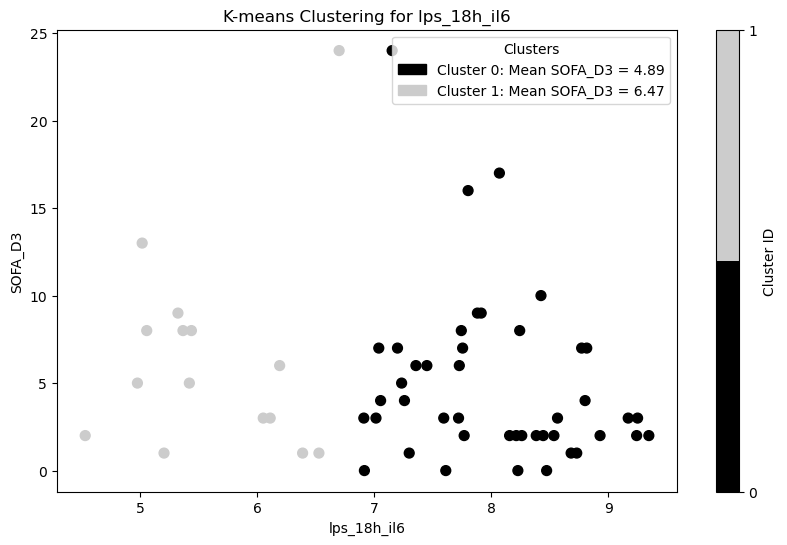

Method: Agglomerative, Column: normal_cd3_4h_ifng, Best num clusters: 2
Silhouette Score: 0.8501
Davies-Bouldin Index: 0.2281
Composite Score: 0.6220
Number of members in each cluster: 0    55
1     4
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


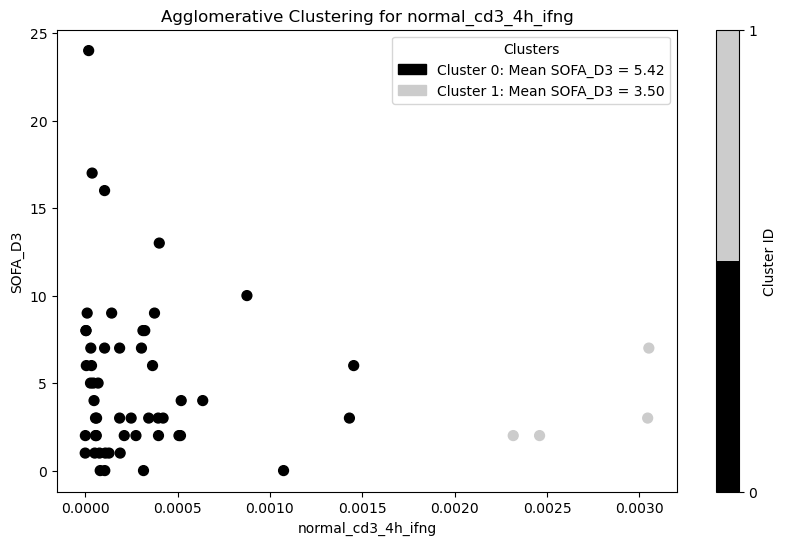

Method: Agglomerative, Column: normal_cd3_18h_ifng, Best num clusters: 2
Silhouette Score: 0.9146
Davies-Bouldin Index: 0.0480
Composite Score: 0.8666
Number of members in each cluster: 0    58
1     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


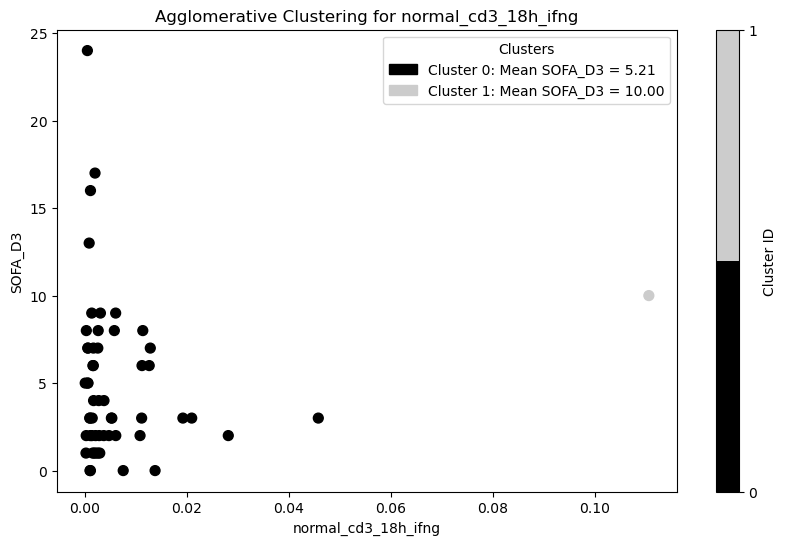

Method: Agglomerative, Column: normal_pma_4h_ifng, Best num clusters: 2
Silhouette Score: 0.6921
Davies-Bouldin Index: 0.5797
Composite Score: 0.1124
Number of members in each cluster: 0    13
1    46
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


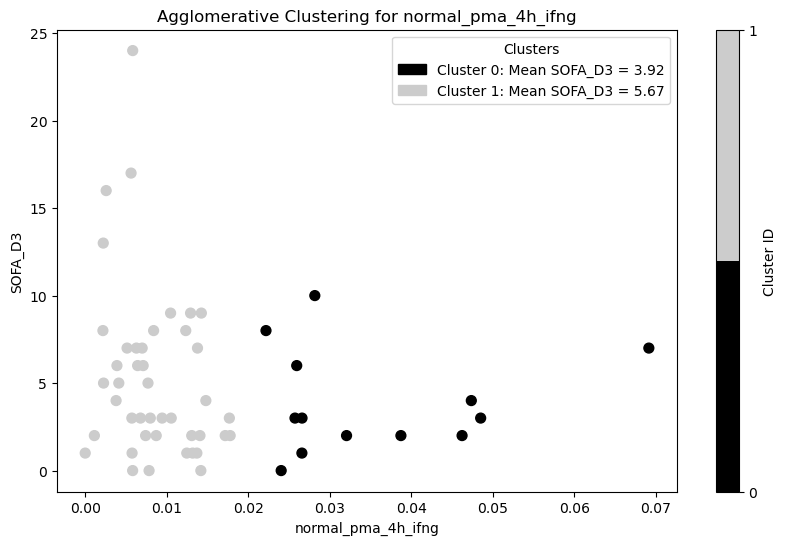

Method: Agglomerative, Column: normal_pma_18h_ifng, Best num clusters: 2
Silhouette Score: 0.6446
Davies-Bouldin Index: 0.5828
Composite Score: 0.0618
Number of members in each cluster: 0    16
1    43
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


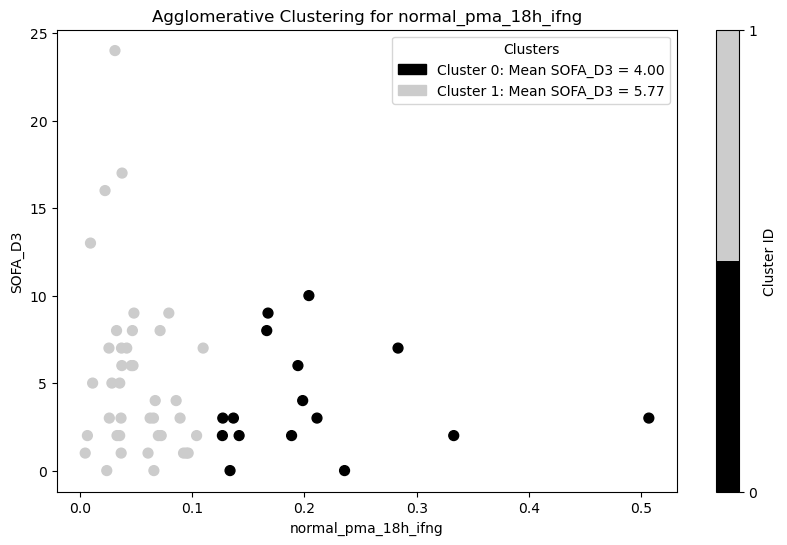

/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


Method: Agglomerative, Column: lps_4h_tnf, Best num clusters: 2
Silhouette Score: 0.6193
Davies-Bouldin Index: 0.5282
Composite Score: 0.0911
Number of members in each cluster: 0    46
1    13
dtype: int64



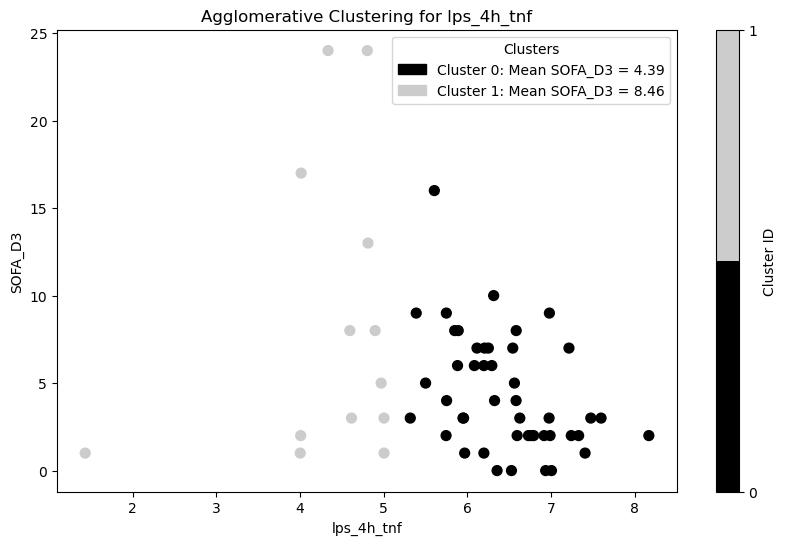

Method: Agglomerative, Column: lps_18h_tnf, Best num clusters: 2
Silhouette Score: 0.6221
Davies-Bouldin Index: 0.4619
Composite Score: 0.1602
Number of members in each cluster: 0    45
1    14
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


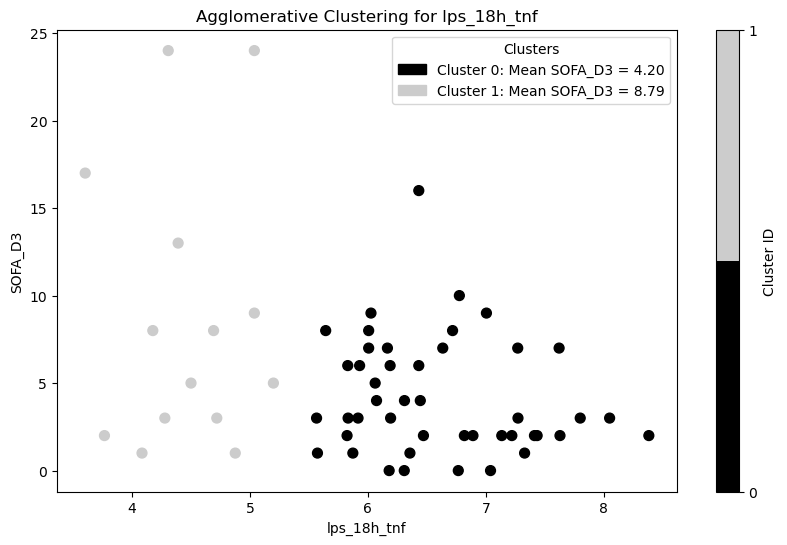

Method: Agglomerative, Column: lps_4h_il6, Best num clusters: 2
Silhouette Score: 0.6461
Davies-Bouldin Index: 0.4764
Composite Score: 0.1697
Number of members in each cluster: 0    40
1    19
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


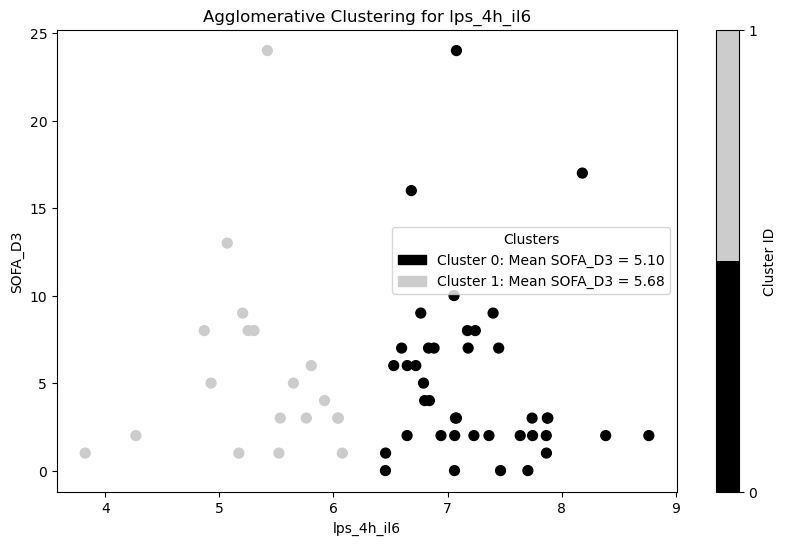

Method: Agglomerative, Column: lps_18h_il6, Best num clusters: 7
Silhouette Score: 0.6337
Davies-Bouldin Index: 0.3835
Composite Score: 0.2502
Number of members in each cluster: 0     9
1     6
2    10
3    12
4    12
5     6
6     4
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


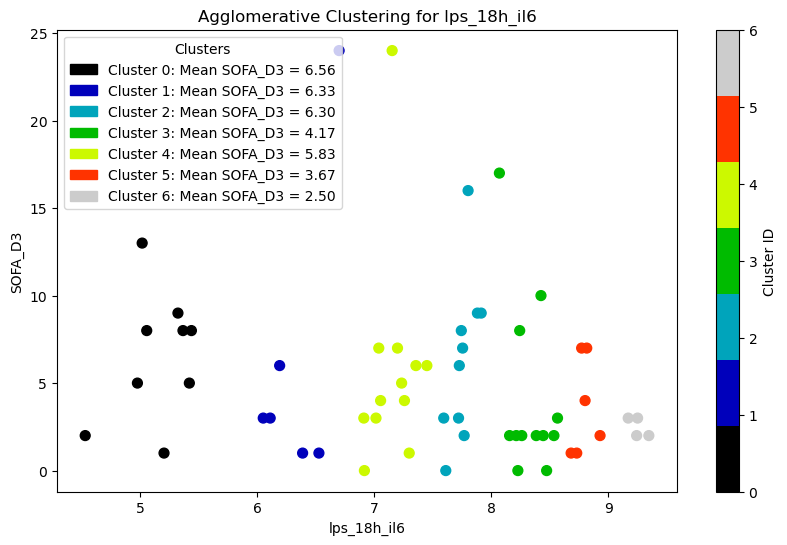

Method: Spectral, Column: normal_cd3_4h_ifng, Best num clusters: 2
Silhouette Score: 0.8501
Davies-Bouldin Index: 0.2281
Composite Score: 0.6220
Number of members in each cluster: 0    55
1     4
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


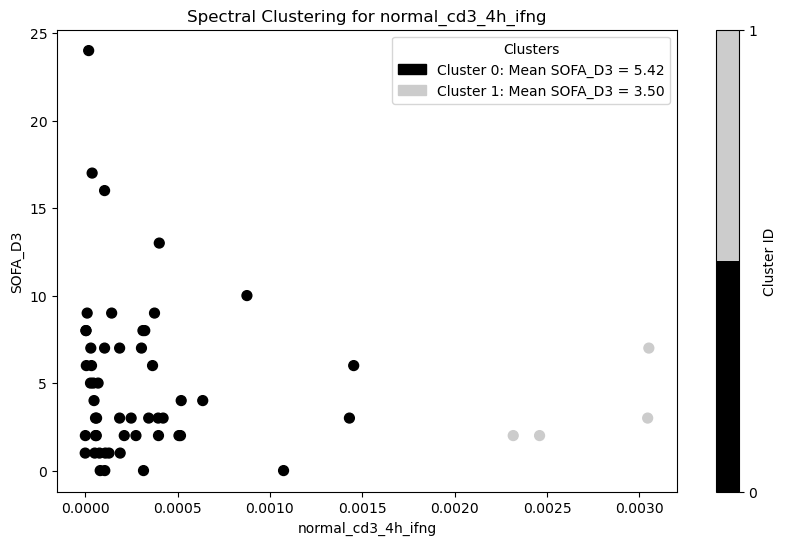

Method: Spectral, Column: normal_cd3_18h_ifng, Best num clusters: 2
Silhouette Score: 0.9146
Davies-Bouldin Index: 0.0480
Composite Score: 0.8666
Number of members in each cluster: 0    58
1     1
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


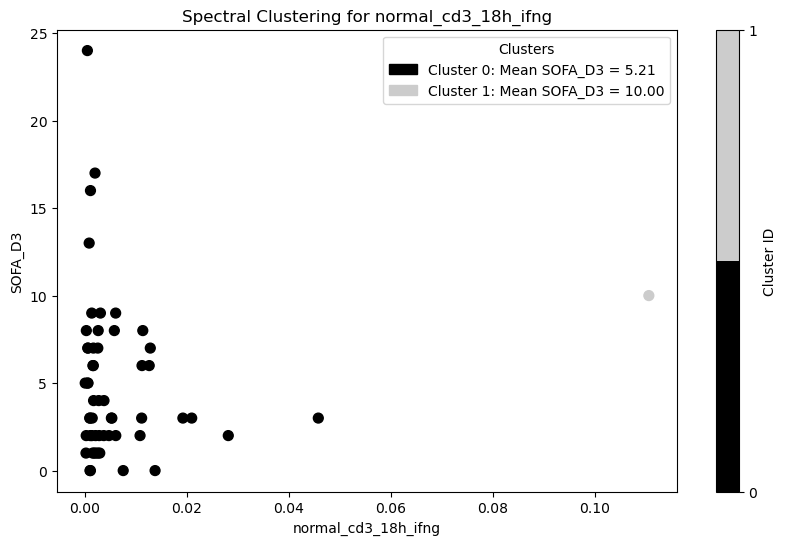

Method: Spectral, Column: normal_pma_4h_ifng, Best num clusters: 2
Silhouette Score: 0.7386
Davies-Bouldin Index: 0.3611
Composite Score: 0.3776
Number of members in each cluster: 0     5
1    54
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


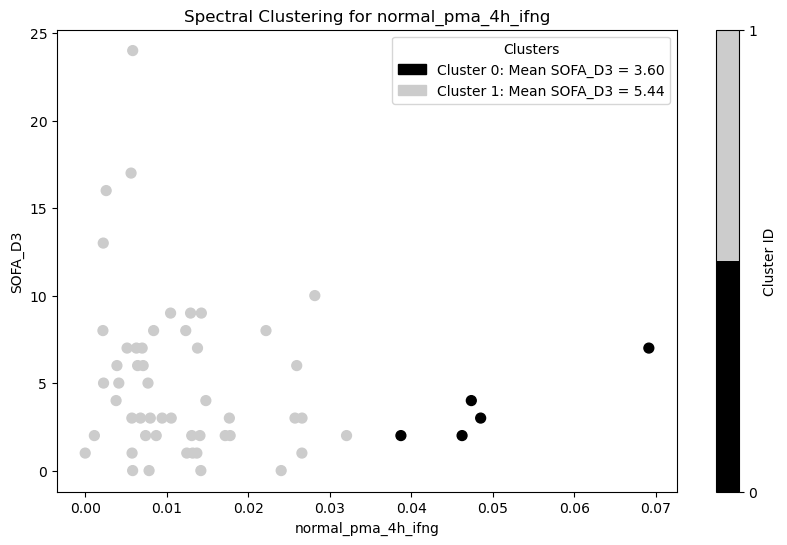

Method: Spectral, Column: normal_pma_18h_ifng, Best num clusters: 2
Silhouette Score: 0.7312
Davies-Bouldin Index: 0.4625
Composite Score: 0.2687
Number of members in each cluster: 0    56
1     3
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


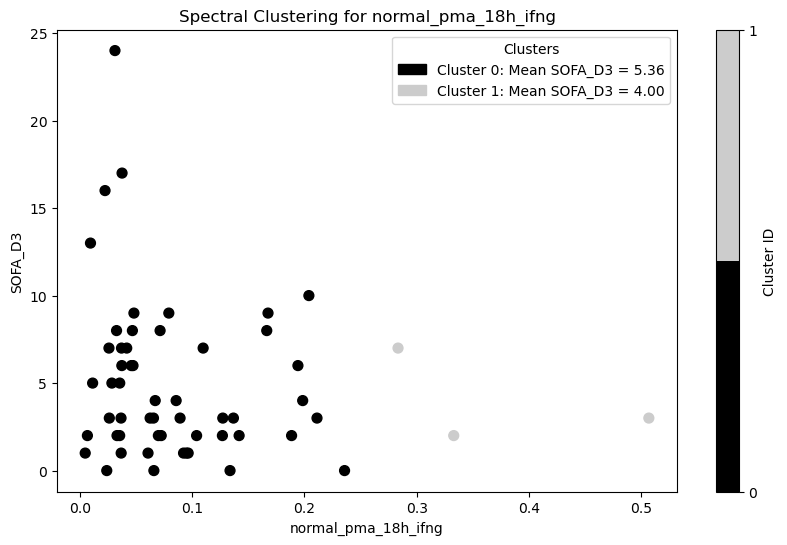

Method: Spectral, Column: lps_4h_tnf, Best num clusters: 2
Silhouette Score: 0.6193
Davies-Bouldin Index: 0.5282
Composite Score: 0.0911
Number of members in each cluster: 0    46
1    13
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


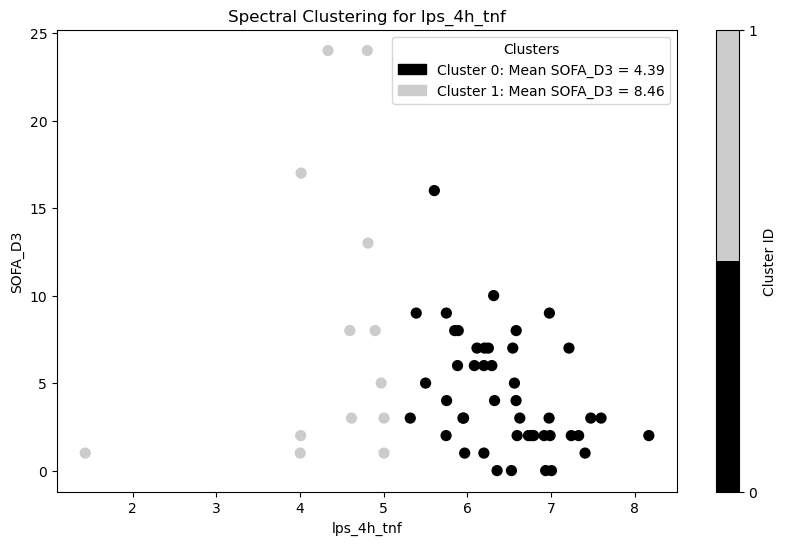

Method: Spectral, Column: lps_18h_tnf, Best num clusters: 2
Silhouette Score: 0.6137
Davies-Bouldin Index: 0.4489
Composite Score: 0.1647
Number of members in each cluster: 0    46
1    13
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


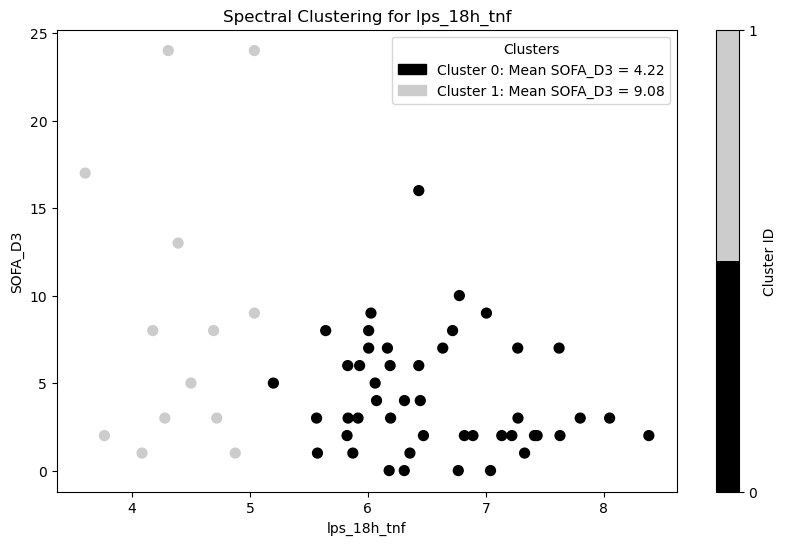

Method: Spectral, Column: lps_4h_il6, Best num clusters: 2
Silhouette Score: 0.6198
Davies-Bouldin Index: 0.4576
Composite Score: 0.1622
Number of members in each cluster: 0    43
1    16
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


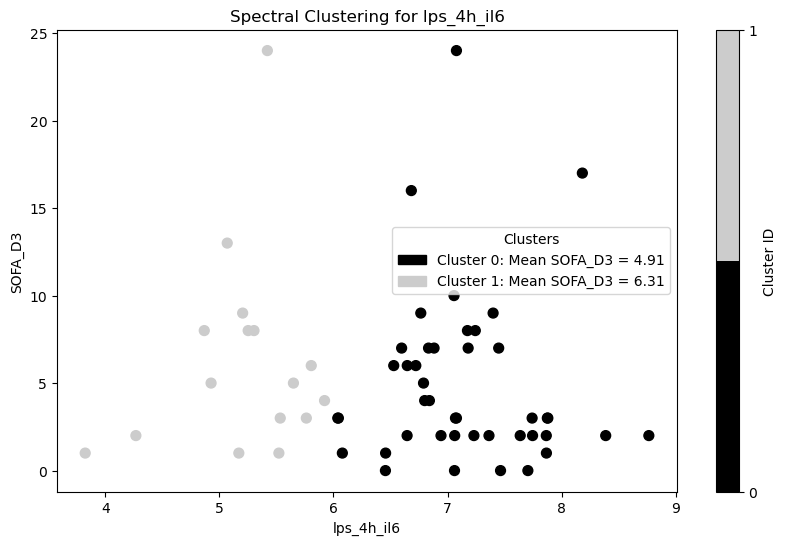

Method: Spectral, Column: lps_18h_il6, Best num clusters: 2
Silhouette Score: 0.6297
Davies-Bouldin Index: 0.4038
Composite Score: 0.2259
Number of members in each cluster: 0    47
1    12
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


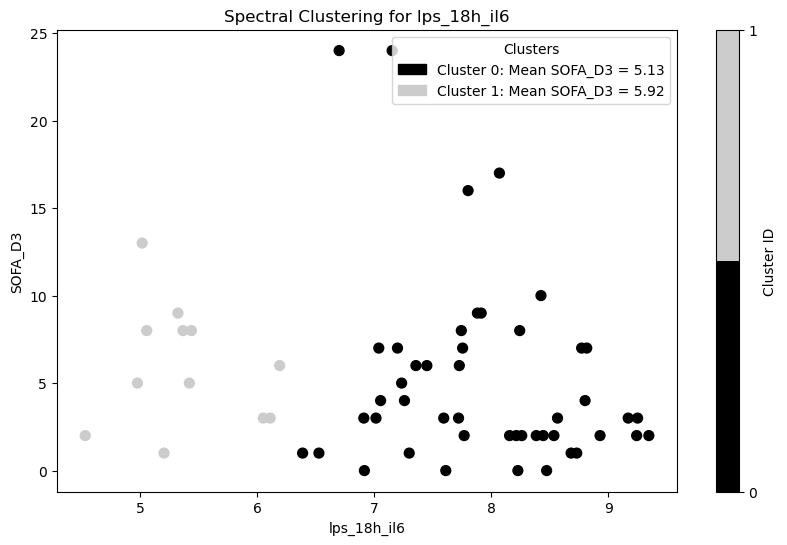

Method: DBSCAN, Column: normal_cd3_4h_ifng, Best num clusters: 2
Silhouette Score: 0.8216
Davies-Bouldin Index: 0.4478
Composite Score: 0.3738
Number of members in each cluster: -1     7
 0    52
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


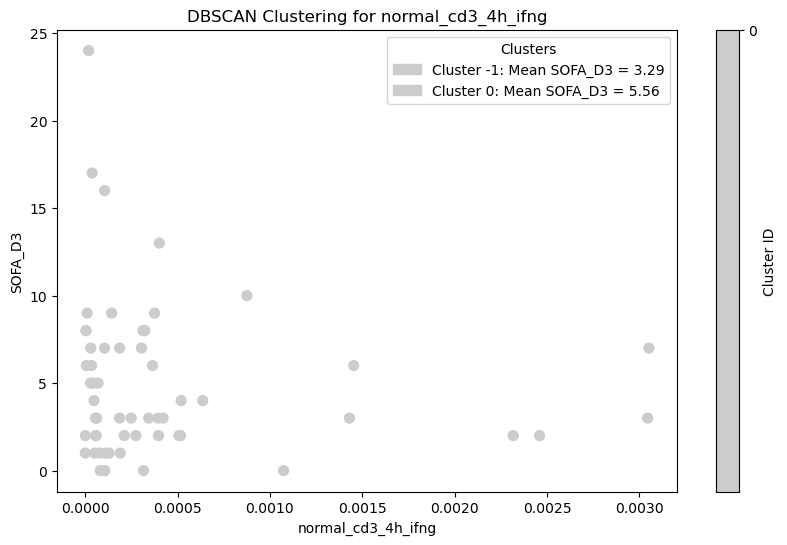

Method: DBSCAN, Column: normal_cd3_18h_ifng, Best num clusters: 2
Silhouette Score: 0.8605
Davies-Bouldin Index: 0.6375
Composite Score: 0.2229
Number of members in each cluster: -1     3
 0    56
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


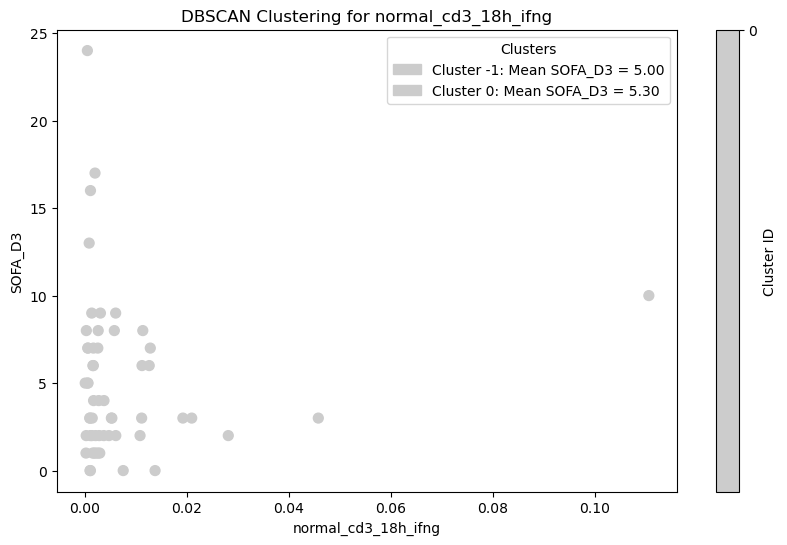

Method: DBSCAN, Column: normal_pma_4h_ifng, Best num clusters: 2
Silhouette Score: 0.7386
Davies-Bouldin Index: 0.3611
Composite Score: 0.3776
Number of members in each cluster: -1     5
 0    54
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


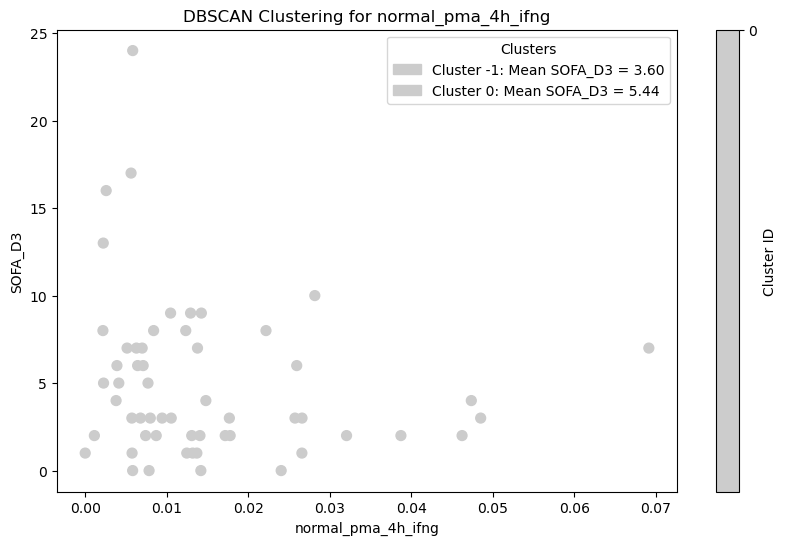

Method: DBSCAN, Column: normal_pma_18h_ifng, Best num clusters: 2
Silhouette Score: 0.7312
Davies-Bouldin Index: 0.4625
Composite Score: 0.2687
Number of members in each cluster: -1     3
 0    56
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


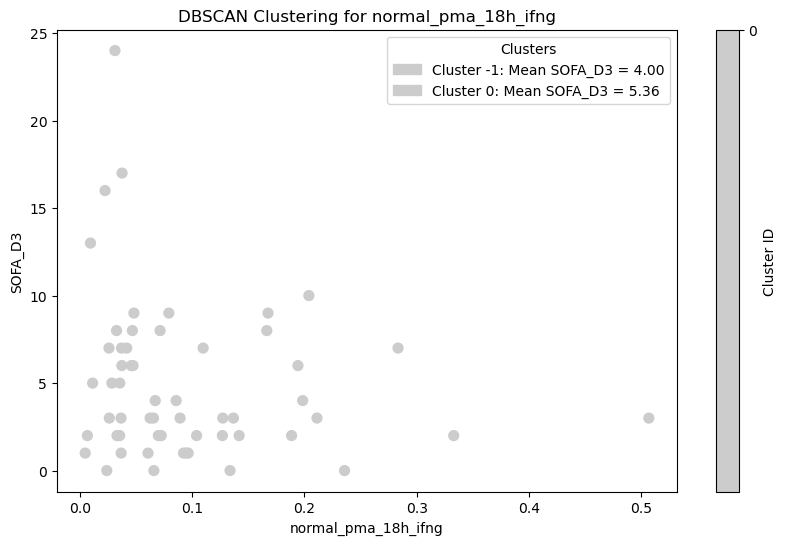

Method: DBSCAN, Column: lps_4h_tnf, Best num clusters: 2
Silhouette Score: 0.6447
Davies-Bouldin Index: 3.3223
Composite Score: -2.6776
Number of members in each cluster: -1     2
 0    57
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


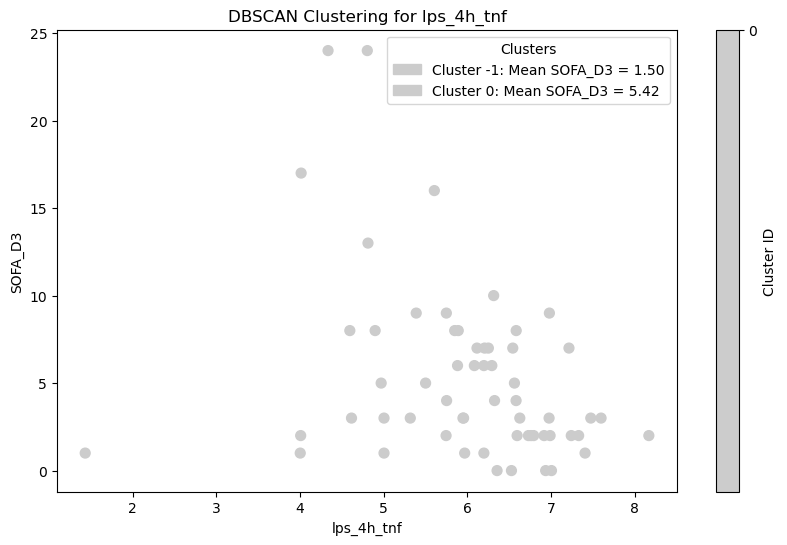

Method: DBSCAN, Column: lps_18h_tnf, Best num clusters: 2
Silhouette Score: 0.0000
Davies-Bouldin Index: inf
Composite Score: -inf
Number of members in each cluster: 0    59
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


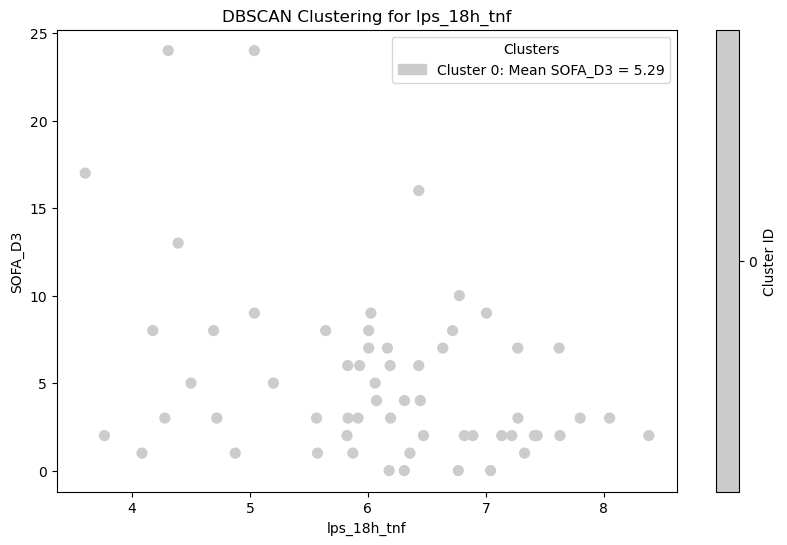

Method: DBSCAN, Column: lps_4h_il6, Best num clusters: 2
Silhouette Score: 0.5158
Davies-Bouldin Index: 0.3668
Composite Score: 0.1491
Number of members in each cluster: -1     2
 0    57
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


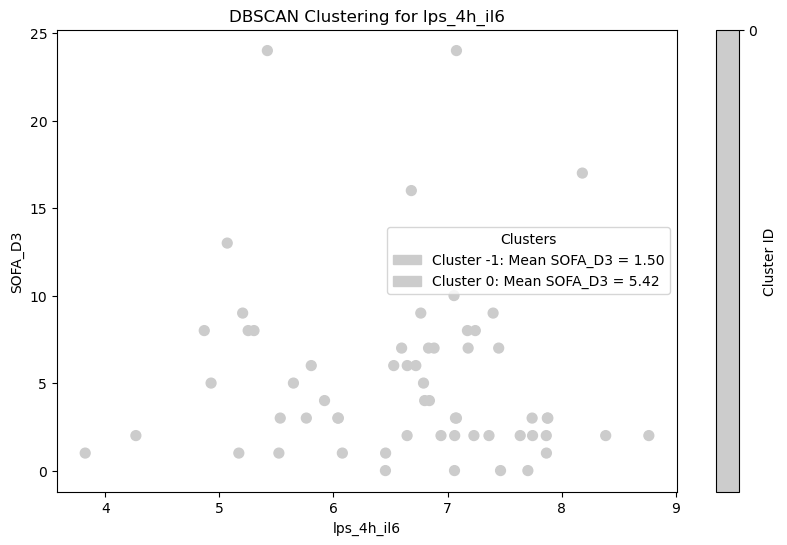

Method: DBSCAN, Column: lps_18h_il6, Best num clusters: 2
Silhouette Score: 0.0000
Davies-Bouldin Index: inf
Composite Score: -inf
Number of members in each cluster: 0    59
dtype: int64



/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/1478920328.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


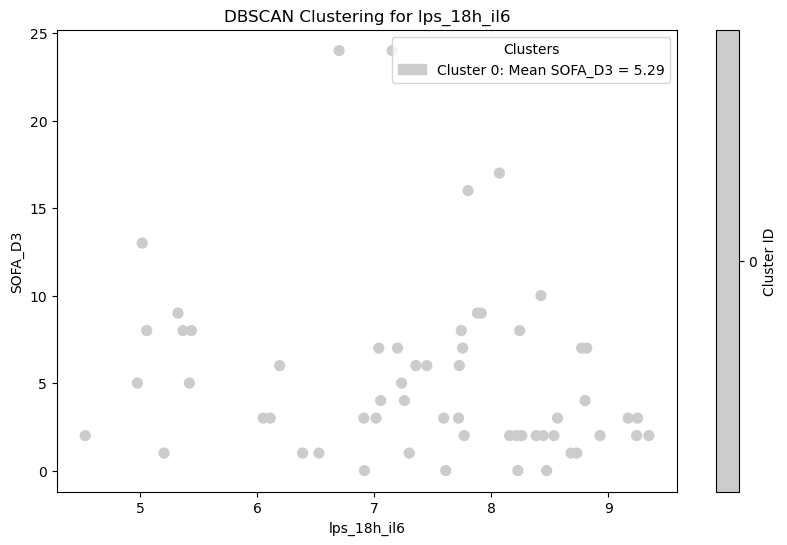

In [41]:
#CELL #1 (for plots)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.patches as mpatches

# Function to impute SOFA_D3
def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

# Read and filter data
df = pd.read_csv('20231026_Data_combined_python_D1.csv')
df = df[df['Sepsis'] == 1]
df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
df.dropna(subset=['SOFA_D3'], inplace=True)

# Columns of interest
columns_of_interest = [
    'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng',
    'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
    'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
]
# Apply a log transformation to handle right skewness
# Adding 1 as a constant to handle zero values (log(1) = 0)
df[columns_of_interest] = np.log1p(df[columns_of_interest])

# Clustering methods
methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']

# Function to optimize clustering
def optimize_clustering(df, method_name, columns, num_clusters):
    if method_name == 'K-means':
        method = KMeans(n_clusters=num_clusters, random_state=42)
    elif method_name == 'Agglomerative':
        method = AgglomerativeClustering(n_clusters=num_clusters)
    elif method_name == 'Spectral':
        method = SpectralClustering(n_clusters=num_clusters, random_state=42)
    elif method_name == 'DBSCAN':
        method = DBSCAN(eps=0.5, min_samples=5)

    imputer = SimpleImputer(strategy="mean")
    df_imputed = imputer.fit_transform(df[columns])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_imputed)

    labels = method.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else 0
    davies_bouldin = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else float('inf')

    return labels, silhouette, davies_bouldin

# Evaluate each method and plot
for method in methods:
    for col in columns_of_interest:
        best_silhouette = -1
        best_num_clusters = 0
        best_labels = None

        for num_clusters in range(2, 11):  # Search between 2 and 10 clusters
            labels, silhouette, _ = optimize_clustering(df, method, [col], num_clusters)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_num_clusters = num_clusters
                best_labels = labels

        labels, silhouette, davies_bouldin = optimize_clustering(df, method, [col], best_num_clusters)
        composite = silhouette - davies_bouldin
        cluster_counts = pd.Series(labels).value_counts().sort_index()

        print(f"Method: {method}, Column: {col}, Best num clusters: {best_num_clusters}")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f"Composite Score: {composite:.4f}")
        print(f"Number of members in each cluster: {cluster_counts}\n")

        plt.figure(figsize=(10, 6))

        cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
        scatter = plt.scatter(df[col], df['SOFA_D3'], c=labels, cmap=cmap, s=50)

        cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
        cbar.set_label('Cluster ID')

        legend_patches = []
        for cluster_id in np.unique(labels):
            mean_sofa = df[labels == cluster_id]['SOFA_D3'].mean()
            patch = mpatches.Patch(color=cmap(cluster_id), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
            legend_patches.append(patch)

        plt.legend(handles=legend_patches, title='Clusters')
        plt.xlabel(col)
        plt.ylabel('SOFA_D3')
        plt.title(f'{method} Clustering for {col}')

        plt.savefig(f"{method}_Clustering_for_{col}.png")
        plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

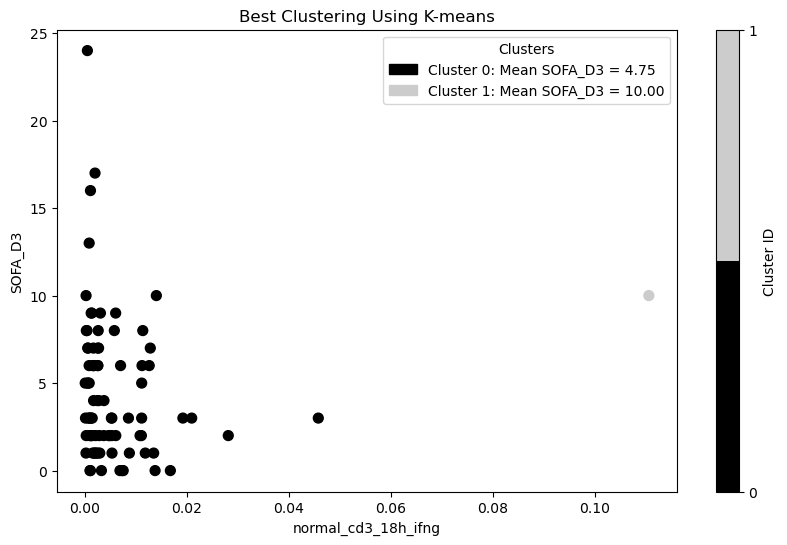

Best method: K-means
Best subset of columns of interest: ('normal_cd3_18h_ifng',)
Best metrics: {'Silhouette': 0.9286866166163571, 'Davies_Bouldin': 0.0425683559412584, 'Composite': 0.8861182606750987}


In [42]:
# Modified Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from itertools import chain, combinations
import matplotlib.patches as mpatches

# Function to impute SOFA_D3
def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

# Read and filter data
df = pd.read_csv('20231026_Data_combined_python_D1.csv')  # Uncomment this line when you have the actual data

df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
df.dropna(subset=['SOFA_D3'], inplace=True)

# Columns of interest
columns_of_interest = [
    'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng',
    'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
    'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
]

# Apply a log transformation to handle right skewness
# Adding 1 as a constant to handle zero values (log(1) = 0)
df[columns_of_interest] = np.log1p(df[columns_of_interest])

# Clustering methods
methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']

# Function to optimize clustering
def optimize_clustering(df, method_name, columns, num_clusters):
    if method_name == 'K-means':
        method = KMeans(n_clusters=num_clusters, random_state=42)
    elif method_name == 'Agglomerative':
        method = AgglomerativeClustering(n_clusters=num_clusters)
    elif method_name == 'Spectral':
        method = SpectralClustering(n_clusters=num_clusters, random_state=42)
    elif method_name == 'DBSCAN':
        method = DBSCAN(eps=0.5, min_samples=5)
    
    imputer = SimpleImputer(strategy="mean")
    df_imputed = imputer.fit_transform(df[columns])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_imputed)
    
    labels = method.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else 0
    davies_bouldin = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else float('inf')
    
    return labels, silhouette, davies_bouldin

# Function to get all non-empty subsets of a list
def all_subsets(lst):
    return chain(*[combinations(lst, i + 1) for i, _ in enumerate(lst)])

# Initialize variables to store the best metrics and corresponding columns and method
best_metrics = {
    'Silhouette': -1,
    'Davies_Bouldin': float('inf'),
    'Composite': -float('inf')
}
best_columns = None
best_method = None

# Iterate through all non-empty subsets of columns_of_interest
for cols in all_subsets(columns_of_interest):
    for method in methods:
        best_silhouette = -1
        best_num_clusters = 0

        # Empirically determine the best number of clusters
        for num_clusters in range(2, 11):  # Search between 2 and 10 clusters
            labels, silhouette, _ = optimize_clustering(df, method, list(cols), num_clusters)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_num_clusters = num_clusters

        labels, silhouette, davies_bouldin = optimize_clustering(df, method, list(cols), best_num_clusters)
        composite = silhouette - davies_bouldin

        # Update best metrics and corresponding columns and method if this composite is better
        if composite > best_metrics['Composite']:
            best_metrics['Silhouette'] = silhouette
            best_metrics['Davies_Bouldin'] = davies_bouldin
            best_metrics['Composite'] = composite
            best_columns = cols
            best_method = method

# Now that we have the best columns and method, plot them
labels, _, _ = optimize_clustering(df, best_method, list(best_columns), best_num_clusters)
plt.figure(figsize=(10, 6))

# Use mean value if best_columns has more than one column, else use the column itself
if len(best_columns) > 1:
    x_values = df[list(best_columns)].mean(axis=1)
    x_label = 'Mean Value of Best Columns'
else:
    x_values = df[list(best_columns)[0]]
    x_label = list(best_columns)[0]

cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
scatter = plt.scatter(x_values, df['SOFA_D3'], c=labels, cmap=cmap, s=50)

cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
cbar.set_label('Cluster ID')

legend_patches = []
for cluster_id in np.unique(labels):
    mean_sofa = df[labels == cluster_id]['SOFA_D3'].mean()
    patch = mpatches.Patch(color=cmap(cluster_id), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
    legend_patches.append(patch)

plt.legend(handles=legend_patches, title='Clusters')
plt.xlabel(x_label)
plt.ylabel('SOFA_D3')
plt.title(f'Best Clustering Using {best_method}')

plt.savefig(f"Best_Clustering_Using_{best_method}.png")
plt.show()

print(f"Best method: {best_method}")
print(f"Best subset of columns of interest: {best_columns}")
print(f"Best metrics: {best_metrics}")


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

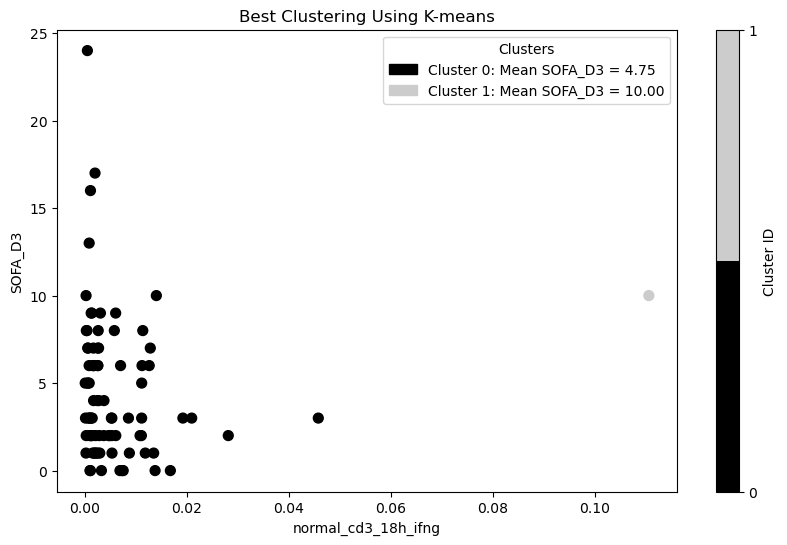

Best method: K-means
Best subset of columns: ('normal_cd3_18h_ifng',)
Best metrics: {'Silhouette': 0.9286866166163571, 'Davies_Bouldin': 0.0425683559412584, 'Composite': 0.8861182606750987}


In [50]:
# Sample code to demonstrate breaking down the tasks into functions for modularity and better readability.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from itertools import chain, combinations
import matplotlib.patches as mpatches

# Data Preparation
def load_data(filename):
    df = pd.read_csv(filename)
    return df

def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

def prepare_data(df, columns_of_interest):
    df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
    df.dropna(subset=['SOFA_D3'], inplace=True)
    df[columns_of_interest] = np.log1p(df[columns_of_interest])
    return df

# Clustering Functions
def perform_kmeans(X_scaled, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    return labels

def perform_agglomerative(X_scaled, num_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    labels = agglomerative.fit_predict(X_scaled)
    return labels

def perform_spectral(X_scaled, num_clusters):
    spectral = SpectralClustering(n_clusters=num_clusters, random_state=42)
    labels = spectral.fit_predict(X_scaled)
    return labels

def perform_dbscan(X_scaled):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    return labels

# Evaluation Metrics
def evaluate_clustering_with_labels(df, labels):
    unique_clusters = np.unique(labels)
    
    if len(unique_clusters) <= 1:
        print(f"Only {len(unique_clusters)} unique cluster(s) found. Skipping...")
        return -1, float('inf')  # Return an invalid silhouette score and Davies-Bouldin score
    
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    return silhouette, davies_bouldin


# Reporting and Plotting
def plot_results(df, best_method, best_columns, labels):
    plt.figure(figsize=(10, 6))
    if len(best_columns) > 1:
        x_values = df[list(best_columns)].mean(axis=1)
        x_label = 'Mean Value of Best Columns'
    else:
        x_values = df[list(best_columns)[0]]
        x_label = list(best_columns)[0]
    cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
    scatter = plt.scatter(x_values, df['SOFA_D3'], c=labels, cmap=cmap, s=50)
    cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
    cbar.set_label('Cluster ID')
    legend_patches = []
    for cluster_id in np.unique(labels):
        mean_sofa = df[labels == cluster_id]['SOFA_D3'].mean()
        patch = mpatches.Patch(color=cmap(cluster_id), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
        legend_patches.append(patch)
    plt.legend(handles=legend_patches, title='Clusters')
    plt.xlabel(x_label)
    plt.ylabel('SOFA_D3')
    plt.title(f'Best Clustering Using {best_method}')
    plt.savefig(f"Best_Clustering_Using_{best_method}.png")
    plt.show()

def report_results(best_method, best_columns, best_metrics):
    print(f"Best method: {best_method}")
    print(f"Best subset of columns: {best_columns}")
    print(f"Best metrics: {best_metrics}")

# Main Code
if __name__ == "__main__":
    # Parameters
    columns_of_interest = [
        'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng',
        'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
        'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
    ]
    methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']

    # Load and prepare data
    df = load_data('20231026_Data_combined_python_D1.csv')
    df = prepare_data(df, columns_of_interest)

    best_method = None
    best_columns = None
    best_metrics = {
        'Silhouette': -1,
        'Davies_Bouldin': float('inf'),
        'Composite': -float('inf')
    }
    best_labels = None  # Add this to keep track of the best labels

    # Function to get all non-empty subsets of a list
    def all_subsets(lst):
        return chain(*[combinations(lst, i + 1) for i, _ in enumerate(lst)])

    # Iterate through all non-empty subsets of columns_of_interest
    for cols in all_subsets(columns_of_interest):
        for method in methods:
            # Data scaling
            imputer = SimpleImputer(strategy="mean")
            df_imputed = imputer.fit_transform(df[list(cols)])
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(df_imputed)
            
            # Initialize best silhouette for each method
            best_silhouette = -1
            best_num_clusters = 0

            temp_best_labels = None  # Temporary variable to hold the best labels for this iteration
          
            # Empirically determine the best number of clusters
            for num_clusters in range(2, 11):  # Search between 2 and 10 clusters
                if method == 'K-means':
                    labels = perform_kmeans(X_scaled, num_clusters)
                elif method == 'Agglomerative':
                    labels = perform_agglomerative(X_scaled, num_clusters)
                elif method == 'Spectral':
                    labels = perform_spectral(X_scaled, num_clusters)
                silhouette, davies_bouldin = evaluate_clustering_with_labels(X_scaled, labels)

                # Update temporary best labels
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    temp_best_labels = labels  # Update the best labels for this iteration
            
            # No need to perform final clustering. Use the best labels obtained in this iteration.
            labels = temp_best_labels
       
            # Evaluate clustering
            silhouette, davies_bouldin = evaluate_clustering_with_labels(X_scaled, labels)
            composite = silhouette - davies_bouldin

             # Update best method, columns, and metrics
            if composite > best_metrics['Composite']:
                best_metrics['Silhouette'] = silhouette
                best_metrics['Davies_Bouldin'] = davies_bouldin
                best_metrics['Composite'] = composite
                best_columns = cols
                best_method = method
                best_labels = labels  # Update the best labels overall
                
    # Plot and report the results using best_labels instead of labels
    plot_results(df, best_method, best_columns, best_labels)
    report_results(best_method, best_columns, best_metrics)



Running K-means with columns ('normal_cd3_4h_ifng',)
Best silhouette for K-means is -1
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.8600388082977751
Best silhouette for Agglomerative is 0.8600388082977751
Best silhouette for Agglomerative is 0.8600388082977751
Best silhouette for Agg

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.8600388082977751
Best silhouette for Spectral is 0.8600388082977751
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Evaluating K-means with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.92868661661635

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Evaluating K-means with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_pma_4h_ifng',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.666218440736097

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7652671679058577
Best silhouette for Spectral is 0.7652671679058577
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_18h_ifng',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.627865858708765
Best silhouette for Spectral is 0.627865858708765
Best silhouette for Spectral is 0.627865858708765
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_tnf',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running DBSCAN with columns ('lps_18h_tnf',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Evaluating DBSCAN with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running K-means with columns ('lps_4h_il6',)
Best silhouette for K-means is -1
Best 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6377382777801397
Best silhouette for Spectral is 0.6377382777801397
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_il6',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5834549782790216
Evaluating K-means with labels [1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
Running Agglomerative with columns ('lps_18h_il6',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.73797319456356
Best silhouette for K-means is 0.73797319456356
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Evaluating Agglomerative with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6895109342906233
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-mea

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6104951136052353
Best silhouette for K-means is 0.6104951136052353
Best silhouette for K-means is 0.6104951136052353
Best silhouette for K-means is 0.6104951136052353
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Evaluating Agglom

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7870596733205362
Best silhouette for Spectral is 0.7870596733205362
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` w

Best silhouette for K-means is 0.8331544787092792
Best silhouette for K-means is 0.8331544787092792
Best silhouette for K-means is 0.8331544787092792
Best silhouette for K-means is 0.8331544787092792
Best silhouette for K-means is 0.8331544787092792
Evaluating K-means with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Ag

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.8269100251110848
Best silhouette for Agglomerative is 0.8269100251110848
Best silhouette for Agglomerative is 0.8269100251110848
Best silhouette for Agglomerative is 0.8269100251110848
Best silhouette for Agglomerative is 0.8269100251110848
Best silhouette for Agglomerative is 0.8269100251110848
Evaluating Agglomerative with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_18h_ifng', 'lps_18h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.4636600805859666
Best silhouette for Spectral is 0.4636600805859666
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for S

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.48164756179036083
Best silhouette for DBSCAN is 0.48164756179036083
Evaluating DBSCAN with labels [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 3 3 1 0 0 3 0 0 3 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
Running K-means with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Evaluating K-means with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.47074602695321754
Best silhouette for K-means is 0.47074602695321754
Evaluating K-means with labels [1 2 0 1 0 1 0 1 0 2 0 0 0 0 2 1 1 0 0 1 1 2 0 0 0 2 2 1 1 0 2 0 1 2 2 2 0
 0 0 1 2 0 0 2 0 0 0 2 0 0 2 2 0 2 0 0 1 2 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3959857740601198
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Evaluating Agglomerative with labels [0 1 2 0 2 0 2 0 2 1 2 2 2 2 1 0 0 2 2 2 0 2 2 2 2 1 1 0 2 2 1 2 0 1 1 1 2
 2 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Evaluating Spectral with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN i

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Best silhouette for DBSCAN is 0.5863895514444875
Evaluating DBSCAN with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_pma_4h_ifng', 'lps_18h_il6

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.45490620995981806
Best silhouette for K-means is 0.45490620995981806
Best silhouette for K-means is 0.45490620995981806
Evaluating K-means with labels [0 1 0 2 0 2 0 0 0 1 2 0 0 0 1 0 2 0 0 2 2 1 0 2 0 1 1 2 0 0 1 0 2 1 1 1 0
 0 0 2 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 2 1 0 1 0 0 0 0 2 0 2 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4148386457549977
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Evaluating Agglomerative with labels [0 1 2 0 2 0 2 0 2 1 2 2 2

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silho

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Evaluating K-means with labels [2 0 2 1 1 2 2 2 1 0 1 2 2 2 0 2 2 1 2 1 1 2 2 1 2 0 0 2 1 2 0 2 1 0 3 0 1
 2 1 2 0 2 1 0 2 1 2 2 1 1 0 2 2 0 2 2 2 0 1 2 2 2 1 2 2 2 1 2 1 1 1 1 2 1
 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 0]
Running Agglomerative with columns ('lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5429412631406579
Best silhouette for Spectral is 0.5429412631406579
Best silhouette for Spectral is 0.5429412631406579
Best silhouette for Spectral is 0.5429412631406579
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.5542506286344533
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('lps_18h_tnf', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Aggl

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5868603386917948
Best silhouette for K-means is 0.5868603386917948
Best silhouette for K-means is 0.5868603386917948
Best silhouette for K-means is 0.5868603386917948
Evaluating K-means with labels [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Evaluating Agglomerative

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best sil

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6509976005994683
Best silhouette for K-means is 0.6509976005994683
Best silhouette for K-means is 0.6509976005994683
Best silhouette for K-means is 0.6509976005994683
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723207262
Best silhouette for Agglomerative is 0.6022984723

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6983320353680377
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Best silhouette for DBSCAN is 0.6983320353680377
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5852954005745732
Best silhouette for K-means is 0.5852954005745732
Best silhouette for K-means is 0.5852954005745732
Best silhouette for K-means is 0.5852954005745732
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.687337863705

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6809534861936274
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Best silhouette for DBSCAN is 0.6809534861936274
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6521806108203138
Best silhouette for K-means is 0.6521806108203138
Best silhouette for K-means is 0.6521806108203138
Best silhouette for K-means is 0.6521806108203138
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.70748071703

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCA

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4612767636760047
Best silhouette for K-means is 0.4612767636760047
Best silhouette for K-means is 0.4612767636760047
Best silhouette for K-means is 0.4612767636760047
Best silhouette for K-means is 0.4612767636760047
Best silhouette for K-means is 0.4612767636760047
Evaluating K-means with labels [2 1 0 0 0 2 0 1 0 1 0 0 0 0 1 2 1 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 2 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4722523366672749
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouett

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [1 2 0 0 0 1 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 2 0 0 0 2 2 0 0 2 2 0 1 2 2 2 0
 2 0 2 2 0 0 2 0 0 0 0 0 0 2 2 0 0 2 2 1 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.43468043359557
Best silhouette for Agglomerative is 0.4863499241830874
Best silhouette for Agglomerative is 0.4863499241830874
Best silhouette for Agglomerative is 0.4863499241830874
Best silhouette for Agglomerative is 0.4863499241830874
Best silhouette for Agglomerative is 0.4863499241830874
Best silhouette for Agglomerative is 0.4863499241830874
Best silhouette for Agglomerative is 0.4863499241830874
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 0 0 0 1 0 2 1 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5865515122943957
Best silhouette for Spectral is 0.5865515122943957
Best silhouette for Spectral is 0.5865515122943957
Best silhouette for Spectral is 0.5865515122943957
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.5865231741730244
Best silhouette for DBSCAN is 0.5865231741730244
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.39748692102688976
Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Evaluating K-means with labels [2 0 1 1 1 2 0 0 1 0 1 1 1 1 0 2 1 1 1 1 2 0 0 1 1 0 0 1 1 0 0 1 2 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 2 0 1 1 1 0 1 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4990853003779212
Best silhouette for K-means is 0.4990853003779212
Evaluating K-means with labels [2 0 1 1 1 2 0 1 1 0 1 1 1 0 1 2 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4613683491929122
Best silhouette for Agglomerative is 0.5149718155133195
Best silhouette for Agglomerative is 0.5149718155133195
Best silhouette for Agglomerative is 0.5149718155133195
Best silhouette for Agglomerative is 0.5149718155133195
Best silhouette for Agglomerative is 0.5149718155133195
Best silhouette for Agglomerative is 0.5149718155133195
Best silhouette for Agglomerative is 0.5149718155133195
Evaluating Agglomerative with labels [2 1 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7785094612366016
Best silhouette for Spectral is 0.7785094612366016
Best silhouette for Spectral is 0.7785094612366016
Best silhouette for Spectral is 0.7785094612366016
Best silhouette for Spectral is 0.7785094612366016
Best silhouette for Spectral is 0.7785094612366016
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.77850946123660

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6803479263302434
Best silhouette for K-means is 0.6803479263302434
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Best silhouette for Agglomerative is 0.4217001935411239
Evaluating Agglomerative with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6762229996121121
Best silhouette for Spectral is 0.6762229996121121
Best silhouette for Spectral is 0.6762229996121121
Best silhouette for Spectral is 0.6762229996121121
Best silhouette for Spectral is 0.6762229996121121
Best silhouette for Spectral is 0.6762229996121121
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6762229996121121
Best silhouette for DBSCAN is 0.6762229996121121
Best silhouette for DBSCAN is 0.6762229996121121
Best silhouette for DBSCAN is 0.6762229996121121
Best silhouette for DBSCAN is 0.6762229996121121
Best silhouette for DBSCAN is 0.6762229996121121
Best silhouette for DBSCAN is 0.6762229996121121
Best 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Best silhouette for DBSCAN is 0.4372154917422656
Evaluating DBSCAN with labels [0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.7219861759360068
Best silhouette for K-means is 0.7219861759360068
Best silhouette for K-means is 0.7219861759360068
Evaluating K-means with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Best silhouette for Agglomerative is 0.7593611984692893
Evaluating Agglomerative with labels [0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.3333798073838832
Best silhouette for Spectral is 0.614919397230353
Best silhouette for Spectral is 0.614919397230353
Best silhouette for Spectral is 0.614919397230353
Best silhouette for Spectral is 0.614919397230353
Best silhouette for Spectral is 0.614919397230353
Best silhouette for Spectral is 0.614919397230353
Best silhouette for Spectral is 0.614919397230353
Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhoue

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5133740030174702
Best silhouette for Spectral is 0.5133740030174702
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Best silhouette for DBSCAN is 0.5133740030174702
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.47425146585122885
Best silhouette for K-means is 0.47425146585122885
Best silhouette for K-means is 0.47425146585122885
Best silhouette for K-means is 0.47425146585122885
Best silhouette for K-means is 0.47425146585122885
Best silhouette for K-means is 0.47425146585122885
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4662722254047611
Best silhouette for Agglomerative is 0.4904335364304371
Best silhouette for Agglomerative is 0.4904335364304371
Best silhouette for Agglomerative is 0.4904335364304371
Best silhouette for Agglomerative is 0.4904335364304371
Best silhouette for Agglomerative is 0.4904335364304371
Best si

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.47924970434166386
Best silhouette for Agglomerative is 0.5038050242247717
Best silhouette for Agglomerative is 0.5038050242247717
Best silhouette for Agglomerative is 0.5038050242247717
Best silhouette for Agglomerative is 0.5038050242247717
Best silhouette for Agglomerative is 0.5038050242247717
Best silhouette for Agglomerative is 0.5038050242247717
Best silhouette for Agglomerative is 0.5038050242247717
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Best silhouette for DBSCAN is 0.500943645784437
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('normal_pma_4h_ifng', 'nor

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.45375870634358345
Best silhouette for K-means is 0.45375870634358345
Best silhouette for K-means is 0.45375870634358345
Evaluating K-means with labels [0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Best silhouette for Agglomerative is 0.4021568054135407
Evaluating Agglomerative with labels [0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.46911069622196255
Best silhouette for Spectral is 0.46911069622196255
Best silhouette for Spectral is 0.4913673914306883
Best silhouette for Spectral is 0.4913673914306883
Best silhouette for Spectral is 0.4913673914306883
Best silhouette for Spectral is 0.4913673914306883
Best silhouette for Spectral is 0.4913673914306883
Best silhouette for Spectral is 0.4913673914306883
Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4913673914306883
Best silhouette for DBSCAN is 0.4913673914306883
Best silhouette for DBSCAN is 0.4913673914306883
Best silhouette for DBSCAN is 0.4913673914306883
Best silhouette for DBSCAN is 0.4913673914306883


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5553327602932445
Best silhouette for Spectral is 0.5553327602932445
Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Best silhouette for DBSCAN is 0.5553327602932445
Evaluating DBSCAN with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.43950491001362896
Best silhouette for K-means is 0.43950491001362896
Best silhouette for K-means is 0.43950491001362896
Best silhouette for K-means is 0.43950491001362896
Best silhouette for K-means is 0.43950491001362896
Best silhouette for K-means is 0.43950491001362896
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4398559596624397
Best silhouette for Agglomerative is 0.4676783335928542
Best silhouette for Agglomerative is 0.4676783335928542
Best silhouette for Agglomerative is 0.4676783335928542
Best silhouette for Agglomerative is 0.4676783335928542
Best silhouette for Agglomerative is 0.4676783335928542
Best silh

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [1 2 0 1 0 1 0 1 0 2 0 0 0 0 2 1 0 0 0 1 1 2 0 0 0 2 2 1 1 2 2 0 1 2 2 2 0
 2 0 1 2 0 0 2 0 0 0 0 0 0 2 2 0 2 2 2 1 2 0 0 0 0 0 0 0 2 1 2 0 0 0 0 1 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4288010217897359
Best silhouette for Agglomerative is 0.4539612390712665
Best silhouette for Agglomerative is 0.4539612390712665
Best silhouette for Agglomerative is 0.4539612390712665
Best silhouette for Agglomerative is 0.4539612390712665
Best silhouette for Agglomerative is 0.4539612390712665
Best silhouette for Agglomerative is 0.4539612390712665
Best silhouette for Agglomerative is 0.4539612390712665
Evaluating Agglomerative with labels [0 1 0 2 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Best silhouette for DBSCAN is 0.4573978822749136
Evaluating DBSCAN with labels [0 2 0 1 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 2 2 0 0 2 2 0 1 2 0 2 0
 2 0 1 2 0 0 2 0 0 0 0 0 0 2 0 0 2 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running K-means with columns ('normal_pma_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.44243356314123494
Best silhouette for K-means is 0.44243356314123494
Best silhouette for K-means is 0.44243356314123494
Best silhouette for K-means is 0.44243356314123494
Best silhouette for K-means is 0.44243356314123494
Best silhouette 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.41380102750996217
Best silhouette for K-means is 0.41380102750996217
Best silhouette for K-means is 0.41380102750996217
Evaluating K-means with labels [0 1 0 2 0 2 0 0 0 1 2 0 0 0 1 0 2 0 0 2 2 1 0 2 0 1 1 2 0 0 1 0 2 1 1 1 0
 0 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 2 1 0 0 0 0 0 0 2 1 2 0 0 0 0 0 0 2
 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Best silhouette for Agglomerative is 0.45968061489658707
Evaluating Agglomerative with labels [0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Best silhouette for Spectral is 0.4418437977822858
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4418437977822858
Best silhouette for DBSCAN is 0.4418437977822858
Best silhouette for DBSCAN is 0.4418437977822858
Best silhouette for DBSCAN is 0.4418437977822858
Best silhouette for DBSCAN is 0.4418437977822858
Best silho

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4289568453044989
Best silhouette for Spectral is 0.4289568453044989
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Best silhouette for DBSCAN is 0.4289568453044989
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.40722363231994996
Best silhouette for K-means is 0.40722363231994996
Best silhouette for K-means is 0.40722363231994996
Best silhouette for K-means is 0.40722363231994996
Best silhouette for K-means is 0.40722363231994996
Best silhouette for K-means is 0.40722363231994996
Best silhouette for K-means is 0.40722363231994996
Evaluating K-means with labels [1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4348948837808908
Best silhouette for Agglomerative is 0.4348948837808908
Best silhouette for Agglomerative is 0.4348948837808908
Best silhouette for Agglomerative is 0.4348948837808908
Best silhouette for Agglomerative is 0.4348948837808908
Best silhou

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4136277983712916
Evaluating K-means with labels [1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Best silhouette for Agglomerative is 0.3674070499563405
Evaluating Agglomerative with labels [0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running DBSCAN with columns ('lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Evaluating DBSCAN with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running K-means with columns ('lps_4h_tnf', 'lps_4h_il6'

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5421100531234733
Best silhouette for K-means is 0.5421100531234733
Best silhouette for K-means is 0.5421100531234733
Best silhouette for K-means is 0.5421100531234733
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Best silhouette for Agglomerative is 0.5459428189791621
Evaluatin

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Best silhouette for Spectral is 0.7657262233033657
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Best silhouette for K-means is 0.6939708299592214
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6424971911004085
Best silhouette for Agglomerative is 0.6424971911004085
Best silhouette for Agglomerative is 0.6424971911004085
Best silhouette for Agglomerative is 0.6424971911004

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.7044903875006563
Best silhouette for DBSCAN is 0.70

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.7168354686725066
Best silhouette for K-means is 0.716835468672

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.715536485661247
Best silhouette for K-means is 0.715536485661247
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6358260404482373
Best silhouette for DBSCAN is 0.6358260404482373
Best silhouette for DBSCAN is 0.6358260404482373
Best silhouette for DBSCAN is 0.6358260404482373
Best silhouette for DBSCAN is 0.6358260404482373
Best silhouette for DBSCAN is 0.6358260404482373
Best silhouette for DBSCAN is 0.63582604

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with column

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4648917374542121
Best silhouette for K-means is 0.4648917374542121
Best silhouette for K-means is 0.4648917374542121
Evaluating K-means with labels [2 0 1 1 1 2 1 1 1 0 1 1 1 1 0 2 1 1 1 1 2 0 1 1 1 0 0 3 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.38074617280709017
Best silhouette for Agglomerative is 0.4431991196688165
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Evaluating Agglomerative wit

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.3935222704335608
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Evaluating Spectral with labels [2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5421325214828054
Best silhouette for DBSCAN is 0.5421325214828054
Best silhouette for DBSCAN is 0.5421325214828054
Best silhouette for DBSCAN is 0.5421325214828054
Best silhouette for DBSCAN is 0.542

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Evaluating Agglomerative with labels [0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.707077852998736
Best silhouette for Spectral is 0.707077852998736
Best silhouette for Spectral is 0.707077852998736
Best silhouette for Spectral is 0.707077852998736
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.3748459679045398
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Evaluating K-means with labels [0 1 2 2 2 0 2 2 2 1 2 2 2 2 1 0 2 2 2 2 0 1 2 2 2 1 1 0 2 1 1 2 0 1 1 1 2
 1 2 0 1 2 2 1 2 2 2 1 2 2 1 1 2 1 1 1 0 1 2 1 2 2 2 2 2 1 0 2 2 2 2 2 0 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
Running Aggl

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4165907316950667
Best silhouette for K-means is 0.4165907316950667
Evaluating K-means with labels [0 2 1 1 1 0 1 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 1 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 1 1 1 1 1 1 2 0 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.309226822465466
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Evaluating Agglomerative with labels [2 0 1 1 1 2 0 1 1 0 1 0 1 0 0 2 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Evaluating K-means with labels [1 0 2 2 2 1 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 2 2 2 0 0 2 2 0 0 2 1 0 0 0 2
 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 0 0 1 0 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.39296918359891003
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.4

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.41631990642812366
Best silhouette for Agglomerative is 0.41631990642812366
Best silhouette for Agglomerative is 0.41631990642812366
Best silhouette for Agglomerative is 0.41631990642812366
Best silhouette for Agglomerative is 0.41631990642812366
Best silhouette for Agglomerative is 0.41631990642812366
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6405251785471527
Best silhouette for Spectral is 0.6405251785471527
Best silhouette for Spectral is 0.6405251785471527
Best silhouette for Spectral is 0.6405251785471527
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Evaluating DBSCAN with labels [0 0 0 0 0 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.6396195242458712
Best silhouette for DBSCAN is 0.6396195242458712
Best silhouette for DBSCAN is 0.6396195242458712
Best silhouette for DBSCAN is 0.6396195242458712
Best silhouette for DBSCAN is 0.6396195242458712
Best silhouette for DBSCAN is 0.6396195242458712
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.34195991206327375
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.39982690144

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4295997408694501
Best silhouette for K-means is 0.4295997408694501
Evaluating K-means with labels [2 0 1 1 1 2 0 1 1 0 1 1 1 0 1 1 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.38642991536238236
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.515567519167967

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.474955548409183
Best silhouette for K-means is 0.474955548409183
Best silhouette for K-means is 0.474955548409183
Best silhouette for K-means is 0.474955548409183
Best silhouette for K-means is 0.474955548409183
Evaluating K-means with labels [2 0 1 1 1 2 0 1 1 0 1 1 1 1 0 2 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4531360131190324
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.4877518273

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.6753127940616076
Best silhouette for Agglomerative is 0.6753127940616076
Best silhouette for Agglomerative is 0.6753127940616076
Best silhouette for Agglomerative is 0.6753127940616076
Best silhouette for Agglomerative is 0.6753127940616076
Best silhouette for Agglomerative is 0.6753127940616076
Best silhouette for Agglomerative is 0.6753127940616076
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.7016767509499762
Best silhouette for Spectral is 0.7016767509499762
Best silhouette for Spectral is 0.7016767509499762
Best silhouette for Spectral is 0.7016767509499762
Best silhouette for Spectra

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5758774405331512
Best silhouette for Spectral is 0.5758774405331512
Best silhouette for Spectral is 0.5758774405331512
Evaluating Spectral with labels [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Best silhouette for DBSCAN is 0.5758774405331512
Evaluating DBSCAN with labels [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Best silhouette for K-means is 0.4864666158178291
Evaluating K-means with labels [0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4066028883090819
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4047306386553914
Best silhouette for Agglomerative is 0.4555221755274335
Best silhouette for Agglomerative is 0.45581897325770376
Best silhouette for Agglomerative is 0.45581897325770376
Best silhouette for Agglomerative is 0.45581897325770376
Best silhouette for Agglomerative is 0.45581897325770376
Best silhouette for Agglomerative is 0.45581897325770376
Best silhouette for Agglomerative is 0.45581897325770376
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1 1 3 0 0 1 0 2 1 1 1 0
 0 0 2 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.622635781792667
Best silhouette for Spectral is 0.622635781792667
Best silhouette for Spectral is 0.622635781792667
Best silhouette for Spectral is 0.622635781792667
Best silhouette for Spectral is 0.622635781792667
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Evaluat

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4189161413777039
Best silhouette for K-means is 0.4189161413777039
Best silhouette for K-means is 0.4189161413777039
Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Best silhouette for Agglomerative is 0.38151511478428135
Evaluating Agglomera

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.404176539137375
Best silhouette for Spectral is 0.5019320725546841
Best silhouette for Spectral is 0.5063590311435338
Best silhouette for Spectral is 0.5063590311435338
Best silhouette for Spectral is 0.5063590311435338
Best silhouette for Spectral is 0.5063590311435338
Best silhouette for Spectral is 0.5063590311435338
Best silhouette for Spectral is 0.5063590311435338
Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5063590311435338
Best silhouette for DBSCAN is 0.5063590311435338
Best silhouette for DBSCAN is 0.5063590311435338
Best silhouette for DBSCAN is 0.5063590311435338
Best silhouette for DBSCAN is 0.50635

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4182578277968093
Best silhouette for Spectral is 0.4182578277968093
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Best silhouette for DBSCAN is 0.4182578277968093
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.39150630450292484
Best silhouette for K-means is 0.39150630450292484
Best silhouette for K-means is 0.39150630450292484
Best silhouette for K-means is 0.39150630450292484
Best silhouette for K-means is 0.39150630450292484
Best silhouette for K-means is 0.39150630450292484
Evaluating K-means with labels [2 0 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 1 0 2 2 2 0 0 1 2 0 0 2 1 0 0 0 2
 0 2 2 0 0 2 0 2 2 2 0 2 2 0 0 2 0 0 0 2 0 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3622076449213648
Best silhouette for Agglomerative is 0.3991232266939332
Best silhouette for Agglomerative is 0.3991232266939332
Best silhouette for Agglomerative is 0.3991232266939332
Best silhouette for Agglomerative is 0.3991232266939332
Best silhouette for Agglomerative is 0.3

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3915030451050511
Best silhouette for Agglomerative is 0.4288118425898304
Best silhouette for Agglomerative is 0.4288118425898304
Best silhouette for Agglomerative is 0.4288118425898304
Best silhouette for Agglomerative is 0.4288118425898304
Best silhouette for Agglomerative is 0.4288118425898304
Best silhouette for Agglomerative is 0.4288118425898304
Best silhouette for Agglomerative is 0.4288118425898304
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.38726358201815253
Best silhouette for Spectral is 0.38726358201815253
Best silhouette for Spectral is 0.38726358201815253
Best silhouette for Spectral is 0.38726358201815253
Best silhouette for Spectral is 0.38726358201815253
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN is 0.38726358201815253
Best silhouette for DBSCAN i

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4866644616550901
Best silhouette for K-means is 0.4866644616550901
Best silhouette for K-means is 0.4866644616550901
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.48686239846658513
Best silhouette for Agglomerative is 0.505067442037358
Best silhouette for Agglomerative is 0.505067442037358
Best silhouette for Agglomerative is 0.505067442037358
Best silhouette for Agglomerative is 0.505067442037358
Best silhouette for Agglomerative is 0.505067442037358
Best silhouette for Agglomerative is 0.505067442037358
Best silhouette for Agglomerative is 0.505067442037358
Evaluating Agglomerative with labels [0 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Spectral with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Best silhouette for Spectral is 0.49374929169120957
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.49374929169120957
Best silhouette for DBSCAN is 0.49374929169120957


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.48284971201907934
Best silhouette for Spectral is 0.48284971201907934
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Best silhouette for DBSCAN is 0.48284971201907934
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4016572029331257
Best silhouette for K-means is 0.4016572029331257
Best silhouette for K-means is 0.4016572029331257
Best silhouette for K-means is 0.4016572029331257
Best silhouette for K-means is 0.4016572029331257
Best silhouette for K-means is 0.4016572029331257
Evaluating K-means with labels [2 0 1 2 1 2 1 2 1 0 1 1 1 1 0 2 2 1 1 2 2 0 1 2 1 0 0 2 1 0 0 1 2 0 0 0 1
 0 1 2 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 2 0 1 0 1 1 1 1 2 0 2 1 1 1 1 1 2 1
 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3742167363537918
Best silhouette for Agglomerative is 0.3742167363537918
Best silhouette for Agglomerative is 0.3742167363537918
Best silhouette for Agglomerative is 0.3742167363537918
Best silhouette for Agglomerative is 0.3742167363537918
Best silhouette for Agglomerative is 0.374216736

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 2 1 0 1 0 1 0 1 2 1 1 1 1 2 0 0 1 1 0 0 2 1 0 1 2 2 0 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 1 1 1 1 1 0 2 0 2 1 1 1 1 0 1
 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3462106377706902
Best silhouette for Agglomerative is 0.3486712041207186
Best silhouette for Agglomerative is 0.3486712041207186
Best silhouette for Agglomerative is 0.3486712041207186
Best silhouette for Agglomerative is 0.3486712041207186
Best silhouette for Agglomerative is 0.3486712041207186
Best silhouette for Agglomerative is 0.3486712041207186
Best silhouette for Agglomerative is 0.3486712041207186
Evaluating Agglomerative with labels [0 2 1 0 1 0 1 0 1 2 0 1 1 1 1 0 0 0 1 0 0 2 1 0 1 2 2 0 0 2 2 1 0 2 2 2 0
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 0 2 1 1 1 0 1 1 0 2 0 1 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.39721498807519323
Best silhouette for Spectral is 0.4098011586260689
Best silhouette for Spectral is 0.4098011586260689
Best silhouette for Spectral is 0.4098011586260689
Best silhouette for Spectral is 0.4098011586260689
Best silhouette for Spectral is 0.4098011586260689
Evaluating Spectral with labels [0 0 0 4 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4098011586260689
Best silhouette for DBSCAN is 0.4098011586260689
Best silhouette for DBSCAN is 0.4098011586260689
Best silhouette for DBSCAN is 0.4098011586260689
Best silhouette for DBSCAN is 0.4098011586260689
Best silhouette for DBSCAN is 0.4098011586260689
Best silhouette for DBSCAN is 0.4098011

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4577601840591209
Best silhouette for K-means is 0.4577601840591209
Best silhouette for K-means is 0.4577601840591209
Best silhouette for K-means is 0.4577601840591209
Best silhouette for K-means is 0.4577601840591209
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4636598355045457
Best silhouette for Agglomerative is 0.47143151559448315
Best silhouette for Agglomerative is 0.47143151559448315
Best silhouette for Agglomerative is 0.47143151559448315
Best silhouette for Agglomerative is 0.47143151559448315
Best silhouette for Agglomerative is 0.47143151559448315
Best silhouette for Agglomerative is 0.471431

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.45586507020386663
Best silhouette for Agglomerative is 0.45586507020386663
Best silhouette for Agglomerative is 0.45586507020386663
Best silhouette for Agglomerative is 0.45586507020386663
Best silhouette for Agglomerative is 0.45586507020386663
Best silhouette for Agglomerative is 0.45586507020386663
Evaluating Agglomerative with labels [0 1 0 2 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.4591921632370756
Best silhouette for Spectral is 0.4591921632370756
Best silhouette for Spectral is 0.4591921632370756
Best silhouette for Spectral is 0.4591921632370756
Best silhouette for Spectral is 0.4591921632370756
Best silhouette for Spectral is 0.45919216

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.46481863747834307
Best silhouette for Spectral is 0.46481863747834307
Best silhouette for Spectral is 0.46481863747834307
Best silhouette for Spectral is 0.46481863747834307
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Best silhouette for DBSCAN is 0.46481863747834307
Evaluating DBSCAN with labels [0 1 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.4501792480093656
Best silhouette for K-means is 0.450179248009365

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.45052524815714823
Best silhouette for K-means is 0.45052524815714823
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Best silhouette for Agglomerative is 0.4556307286001177
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.46404448205425863
Best silhouette for Spectral is 0.46404448205425863
Best silhouette for Spectral is 0.46404448205425863
Best silhouette for Spectral is 0.46404448205425863
Best silhouette for Spectral is 0.46404448205425863
Best silhouette for Spectral is 0.46404448205425863
Best silhouette for Spectral is 0.46404448205425863
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.46404448205425863
Best silhouette for DBSCAN is 0.46404448205425863
Best silhouette for DBSCAN is 0.46404448205425863
Best silhouette for DBSCAN is 0.46404448205425863
Best silhouette for DBSCAN is 0.46404448205425863
Best silhouette for DBSCAN is 0.46

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6134884988031308
Best silhouette for K-means is 0.6134884988031308
Best silhouette for K-means is 0.6134884988031308
Best silhouette for K-means is 0.6134884988031308
Best silhouette for K-means is 0.6134884988031308
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7207424180733878
Best silhouette for Agglomerative is 0.7207424180733878
Best silhouette for Agglomerative is 0.7207424180733878
Best silhouette for Agglomerative is 0.7207424180733878
Best silhouette for Agglomerative is 0.7207424180733878
Best silhouette for Agglomerative is 0.7207424180733878
Best silhou

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6969700846025773
Best silhouette for Spectral is 0.7066280425888409
Best silhouette for Spectral is 0.7066280425888409
Best silhouette for Spectral is 0.7066280425888409
Best silhouette for Spectral is 0.7066280425888409
Best silhouette for Spectral is 0.7066280425888409
Best silhouett

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Best silhouette for DBSCAN is 0.707176277317964
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Best silhouette for K-means is 0.6425262291981483
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.666221695879595
Best silhouette for Agglomerative is 0.666221695879595
Best silhouette for Agglomerative is 0.666221695879595
Best silhouette for Agglomerative is 0.6

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6414856357848917
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Evaluating Agglomerative with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.66078746760526
Best silhouette for Spectral is 0.66078746760526
Best silhouette for Spectral is 0.66078746760526
Best silhouette for Spectral is 0.66078746760526
Best silhouette for Spectral is 0.66078746760526
Best silhouette for Spectral is 0.66078746760526
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.66078746760526
Best silhouette for DBSCAN is 0.66078746760526
Best silhouette for DBSCAN is 0.66078746760526
Best silhouette for DBSCAN is 0.66078746760526
Best silhouette for DBSCAN is 0.66078746760526
Best silhouette for DBSCAN is 0.66078746760526
Best silhouette for DBSCAN is 0.6607874676

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.303610473018069
Best silhouette for Agglomerative is 0.3504509359643638
Best silhouette for Agglomerative is 0.3551244167825885
Best silhouette for Agglomerative is 0.3551244167825885
Best silhouette for Agglomerative is 0.3551244167825885
Best silhouette for Agglomerative is 0.3551244167825885
Best silhouette for 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.3614645298627079
Best silhouette for Spectral is 0.6486581944496783
Best silhouette for Spectral is 0.6486581944496783
Best si

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Best silhouette for DBSCAN is 0.6354080591816976
Evaluating DBSCAN with

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Best silhouette for K-means is 0.6641566287317914
Evaluating K-means wi

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6636708024234322
Best silhouette for K-means is 0.6636708024234322
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6421365767551924
Best silhouette for DBSCAN is 0.6421365767551924
Best silhouette for DBSCAN is 0.6421365767551924
Best silhouette for DBSCAN is 0.6421365767551924
Best silhouette for DBSCAN is 0.6421365767551924
Best silhouette

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Evaluating K-means with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 0 0 0 2 1 0 0 0 1 1 3 0 1 1 0 2 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.417761638244934
Best silhouette for Agglomerative is 0.46843849068318416
Best silhouette for Agglomerative is 0.4715087298931295
Best silhouette for Agglomerative is 0.4715087298931295
Best silhouette for Agglomerative is 0.4715087298931295
Best silhouette for Agglomerative is 0.4715087298931295
Best silhouette for Agglomerative is 0.4715087298931295
Best silhouette for A

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.4169139729763989
Best silhouette for Spectral is 0.4809014662331939
Best silhouette for Spectral is 0.4809014662331939
Best silhouette for Spectral is 0.4809014662331939
Best silhouette for Spectral is 0.4809014662331939
Best silhouette for Spectral is 0.4809014662331939
Best silhouette for Spectral is 0.4809014662331939
Best silhouette for Spectral is 0.4809014662331939
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.666594746058189
Best silhouette for Spectral is 0.666594746058189
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6614987610831853
Best silhouette for Agglomerative is 0.6614987610831853
Best silhouette for Agglomerative is 0.6614987610831853
Best silhouette for Agglomerative is 0.6614987610831853
Best silhouette for Agglomerative is 0.6614987610831853
Best silhouette for

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Evaluating DBSCAN wit

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4377516572859631
Best silhouette for K-means is 0.4377516572859631
Evaluating K-means with labels [0 2 1 1 1 0 1 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 1 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 1 1 1 1 1 1 2 0 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.40590835593503294
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCA

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5849044602742264
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.44136097234294736
Best silhouette for K-means is 0.44136097234294736
Best silhouette for K-means is 0.44136097234294736
Best silhouette for K-means is 0.44136097234294736
Evaluating K-means with labels [2 0 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4039100707390673
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silho

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.4447518248391646
Best silhouette for Agglomerative is 0.4447518248391646
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5936210361254421
Best silhouette for Spectral is 0.5936210361254421
Best silhouette for Spectral is 0.5936210361254421
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agg

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.33430553446152395
Best silhouette for Agglomerative is 0.3961175083611851
Best silhouette for Agglomerative is 0.39851826724260025
Best silhouette for Agglomerative is 0.39851826724260025
Best silhouette for Agglomerative is 0.39851826724260025
Best silhouette for Agglomerative is 0.39851826724260025
Best silhouette for Agglomerative is 0.39851826724260025
Best silhouette for Agglomerative is 0.39851826724260025
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 3 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Best silhouette for DBSCAN is 0.5127536399018218
Evaluating DBSCAN with labels [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Run

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.39462576089618273
Best silhouette for K-means is 0.39462576089618273
Best silhouette for K-means is 0.39462576089618273
Best silhouette for K-means is 0.39462576089618273
Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.31024122608627536
Best silhouette for Agglomerative is 0.32161060717853834
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best s

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.43293601316832314
Evaluating Agglomerative with labels [2 1 2 0 2 0 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 1 2 2 2 1 1 0 0 1 1 2 0 1 1 1 2
 1 2 0 1 2 2 1 2 2 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
Running Spectral with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4552673307620537
Best silhouette for Spectral is 0.4552673307620537
Best silhouette for Spectral is 0.4552673307620537
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.44815994995413194
Best silhouette for K-means is 0.44815994995413194
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4282200287913388
Best silhouette for Agglomerative is 0.4565702867001152
Best silhouette for Agglomerative is 0.4565702867001152
Best silhouette for Agglomerative is 0.4565702867001152
Best silhouette for Agglomerative is 0.4565702867001152
Best silhouette for Agglomerative is 0.4565702867001152
Best silhouette for Agglomerative is 0.4565702867001152
Best silhouette for Agglomerative is 0.4565702867001152
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Best silhouette for Spectral is 0.4193276260361167
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4193276260361167
Best silhouette for DBSCAN is 0.4193276260361167
Best silhouette for DBSCAN is 0.4193276260361167
Best silhouette for DBSCAN is 0.4193276260361167
Best silhouette for 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4399473909318898
Best silhouette for Spectral is 0.4399473909318898
Evaluating Spectral with labels [2 0 2 2 2 3 2 2 2 0 2 2 2 2 2 2 2 2 2 2 3 0 2 2 2 0 0 1 2 0 0 2 3 0 0 0 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Best silhouette for DBSCAN is 0.4399473909318898
Evaluating DBSCAN with labels [2 0 2 2 2 3 2 2 2 0 2 2 2 2 2 2 2 2 2 2 3 0 2 2 2 0 0 1 2 0 0 2 3 0 0 0 2
 2 2 2 0 2 2 0 2 2 2 2 2 2

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5006312144047873
Best silhouette for K-means is 0.5006312144047873
Best silhouette for K-means is 0.5006312144047873
Best silhouette for K-means is 0.5006312144047873
Best silhouette for K-means is 0.5006312144047873
Best silhouette for K-means is 0.5006312144047873
Best silhouette for K-means is 0.5006312144047873
Evaluating K-means with labels [0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 1 0 2 2 0 0 2 2 2 0
 2 0 2 2 0 0 2 0 0 0 0 0 0 2 2 0 2 2 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.49176790643814783
Best silhouette for Agglomerative is 0.5065293223160179
Best silhouette for Agglomerative is 0.5065293223160179
Best silhouette for Agglomerative is 0.5065293223160179
Best silhouette for Agglomerative is 0.506529

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [2 1 0 2 0 2 0 2 0 1 0 0 0 0 1 2 2 0 0 2 2 1 0 2 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 2 1 0 1 0 0 0 0 2 1 2 0 0 0 0 0 2 0
 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.40808639729075663
Best silhouette for Agglomerative is 0.4382457976867864
Best silhouette for Agglomerative is 0.4382457976867864
Best silhouette for Agglomerative is 0.4382457976867864
Best silhouette for Agglomerative is 0.4382457976867864
Best silhouette for Agglomerative is 0.4382457976867864
Best silhouette for Agglomerative is 0.4382457976867864
Best silhouette for Agglomerative is 0.4382457976867864
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.40438777376229085
Best silhouette for Spectral is 0.40438777376229085
Best silhouette for Spectral is 0.40438777376229085
Best silhouette for Spectral is 0.40438777376229085
Best silhouette for Spectral is 0.40438777376229085
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette for DBSCAN is 0.40438777376229085
Best silhouette

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4675181568864932
Best silhouette for K-means is 0.4675181568864932
Best silhouette for K-means is 0.4675181568864932
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Best silhouette for Agglomerative is 0.4736126700671861
Evaluating Agglomerativ

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Best silhouette for Spectral is 0.47434893759419194
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.47434893759419194
Best silhouette for DBSCAN is 0.47434893759419194
Best silhouette for DBSCAN is 0.47434893759419194
Best silhouette for DBSCAN is 0.47434893759419194
Best silhouette f

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6666217908100589
Best silhouette for Spectral is 0.6666217908100589
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Best silhouette for DBSCAN is 0.6666217908100589
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5109490363820623
Best silhouette for K-means is 0.5109490363820623
Best silhouette for K-means is 0.5109490363820623
Best silhouette for K-means is 0.5109490363820623
Best silhouette for K-means is 0.5109490363820623
Best silhouette for K-means is 0.5109490363820623
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6725457147738072
Best silhouette for Agglomerative is 0.6725457147738072
Best silhouette for Agglomerative is 0.6725457147738072
Best silhouette for Agglomerative is 0.6725457147738072
Best silhouette for Agglomerative is 0.6725457147738072
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Best silhouette for Agglomerative is 0.6717675546130424
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6603403728804287
Best silhouette for Spectral is 0.6603403728804287
Best silhouette for Spectral is 0.6603403728804287
Best silhouette for Spectral is 0.6603403728804287
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.6603403728804287
Best silhouette for DBSCAN is 0.660340372880428

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.42129353624738647
Best silhouette for K-means is 0.42129353624738647
Evaluating K-means with labels [2 0 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.36290471531664104
Best silhouette for Agglomerative is 0.4206017242336726
Best silhouette for Agglomerative is 0.42603995981474635
Best silhouette for Agglomerative is 0.42603995981474635
Best silhouette for Agglomerative is 0.42603995981474635
Best silhouette for Agglomerative is 0.42603995981474635
Best silhouette for Agglomerative is 0.42603995981474635
Best silhouette for Agglomerative is 0.42603995981474635
Evaluating Agglomerative with lab

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6216820618363792
Best silhouette for Spectral is 0.6216820618363792
Best silhouette for Spectral is 0.6216820618363792
Best silhouette for Spectral is 0.6216820618363792
Best silhouette for Spectral is 0.6216820618363792
Best silhouette for Spectral is 0.6216820618363792
Best silhouette for Spectral is 0.6216820618363792
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6216820618363792
Best silhouette for DBSCAN is 0.6216820618363792
Best silhouette for DBSCAN is 0.6216820618363792
Best silhouette for DBSCAN is 0.6216820618363792
Best silhouette for DBSCAN is 0.6216820618363792
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6197389771948754
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Best silhouette for DBSCAN is 0.6197389771948754
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4168027938384818
Best silhouette for K-means is 0.4168027938384818
Best silhouette for K-means is 0.4168027938384818
Best silhouette for K-means is 0.4168027938384818
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.36968727465008305
Best silhouette for Agglomerative is 0.42348843125777375
Best silhouette for Agglomerative is 0.42348843125777375
Best silhouette for Agglomerative is 0.42348843125777375
Best silhouette for Agglomerative is 0.42348843125777375
Best silhouette for Agglomerative is 0.42348843125777375
Best silhouette for Agglomerative is 0.42348843

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 3 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.3740677291414553
Best silhouette for Spectral is 0.5204985448746268
Best silhouette for Spectral is 0.5334858079230549
Best silhouette for Spectral is 0.5334858079230549
Best silhouette for Spectral is 0.5334858079230549
Best silhouette for Spectral is 0.5334858079230549
Best silhouette for Spectral is 0.5334858079230549
Best silhouette for Spectral is 0.5334858079230549
Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.598845120735148
Best silhouette for Spectral is 0.598845120735148
Best silhouette for Spectral is 0.598845120735148
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Best silhouette for DBSCAN is 0.598845120735148
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.3245511230863862
Best silhouette for K-means is 0.409361400939409
Best silhouette for K-means is 0.409361400939409
Best silhouette for K-means is 0.409361400939409
Best silhouette for K-means is 0.409361400939409
Best silhouette for K-means is 0.409361400939409
Best silhouette for K-means is 0.409361400939409
Best silhouette for K-means is 0.409361400939409
Evaluating K-means with labels [0 2 1 1 1 0 1 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 0 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 2 1 1 1 1 1 2 0 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3676988695328907
Best silhouette for Agglomerative is 0.4150287369007617
Best silhouette for Agglomerative is 0.4150287369007617
Best silhouette for Agglomerat

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4026118822464264
Evaluating K-means with labels [1 0 2 2 2 1 2 2 2 0 2 2 2 2 0 1 2 2 2 2 1 0 2 2 2 0 0 1 2 0 0 2 1 0 0 0 2
 0 2 1 0 2 2 0 2 2 2 2 2 2 0 0 2 0 0 0 1 0 2 2 2 2 2 2 2 0 1 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3631024723704931
Best silhouette for Agglomerative is 0.4107207133449183
Best silhouette for Agglomerative is 0.4107207133449183
Best silhouette for Agglomerative is 0.4107207133449183
Best silhouette for Agglomerative is 0.4107207133449183
Best silhouette for Agglomerative is 0.4107207133449183
Best silhouette for Agglomerative is 0.4107207133449183
Best silhouette for Agglomerative is 0.4107207133449183
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6228325780267677
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Best silhouette for DBSCAN is 0.6228325780267677
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4529336130923764
Best silhouette for K-means is 0.4529336130923764
Best silhouette for K-means is 0.4529336130923764
Best silhouette for K-means is 0.4529336130923764
Best silhouette for K-means is 0.4529336130923764
Evaluating K-means with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.42554037926840865
Best silhouette for Agglomerative is 0.45612016177270603
Best silhouette for Agglomerative is 0.45612016177270603
Best silhouette for Agglomerative is 0.45612016177270603
Best silhouette for Agglomerative is 0.45612016177270603
Best silhouette for Agglomerative is 0.45612016177270603
Best s

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.3740853362386649
Best silhouette for Agglomerative is 0.42245515007214396
Best silhouette for Agglomerative is 0.42353538222024284
Best silhouette for Agglomerative is 0.42353538222024284
Best silhouette for Agglomerative is 0.42353538222024284
Best silhouette for Agglomerative is 0.42353538222024284
Best silhouette for Agglomerative is 0.42353538222024284
Best silhouette for Agglomerative is 0.42353538222024284
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 3 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.37979803362859543
Best silhouette for Spectral is 0.393170366149971
Best silhouette for Spectral is 0.393

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.3735311376371967
Best silhouette for Spectral is 0.3735311376371967
Best silhouette for Spectral is 0.3735311376371967
Best silhouette for Spectral is 0.3735311376371967
Evaluating Spectral with labels [0 2 1 0 1 0 1 0 1 2 1 1 1 1 2 0 0 1 1 0 0 2 1 0 1 2 2 0 1 1 2 1 0 2 2 2 1
 1 1 0 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 0 2 1 1 1 1 1 1 1 2 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Best silhouette for DBSCAN is 0.3735311376371967
Evalua

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4501515663791695
Best silhouette for K-means is 0.4501515663791695
Best silhouette for K-means is 0.4501515663791695
Evaluating K-means with labels [1 0 1 2 1 2 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 1
 0 1 2 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.43574915859664204
Best silhouette for Agglomerative is 0.4357491585

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Best silhouette for Spectral is 0.43888266332403436
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.43888266332403436
Best silhouette for DBSCAN is 0.43888266332403436
Best silhouette for DBSCAN is 0.43888266332403436
Best silhouette for DBSCAN is 0.438882663324

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.42741151318400905
Best silhouette for Spectral is 0.42741151318400905
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Best silhouette for DBSCAN is 0.42741151318400905
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.3880456680830834
Best silhouette for K-means is 0.3880456680830834
Best silhouette for K-means is 0.3880456680830834
Best silhouette for K-means is 0.3880456680830834
Best silhouette for K-means is 0.3880456680830834
Best silhouette for K-means is 0.3880456680830834
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.29294346280875555
Best silhouette for Agglomerative is 0.3330251743371646
Best silhouette for Agglomerative is 0.3389393360160956
Best silhouette for Agglomerative is 0.3389393360160956
Best silhouette for Agglomerative is 0.338

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.29597553831835904
Best silhouette for Agglomerative is 0.33366851842573747
Best silhouette for Agglomerative is 0.33925079729183283
Best silhouette for Agglomerative is 0.33925079729183283
Best silhouette for Agglomerative is 0.33925079729183283
Best silhouette for Agglomerative is 0.33925079729183283
Best silhouette for Agglomerative is 0.33925079729183283
Best silhouette for Agglomerative is 0.33925079729183283
Evaluating Agglomerative with labels [2 0 2 2 2 1 0 2 2 0 2 0 2 0 0 2 2 2 0 2 1 0 0 2 2 0 0 3 2 0 0 2 1 0 0 0 2


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6253666865303453
Best silhouette for Spectral is 0.6253666865303453
Best silhouette for Spectral is 0.6253666865303453
Best silhouette for Spectral is 0.6253666865303453
Best silhouette for Spectral is 0.6253666865303453
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6253666865303453
Best silhouette for DBSCAN is 0.6253666865303453
Best silhouette for DBSCAN is 0.6253666865303453
Best silhouette for DBSCAN is 0.6253666865303453
Best silhouette for DBSCAN is 0.6253666865303453
Best silhouette for DBSCAN is 0.6253666865303453
Best silhouette for DBSCAN is 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.40948204422446804
Best silhouette for K-means is 0.40948204422446804
Best silhouette for K-means is 0.40948204422446804
Evaluating K-means with labels [0 2 1 0 1 0 1 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 0 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 1 1 1 1 1 1 2 0 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.39093892739435504
Best silhouette for Agglomerative is 0.4303475357976721
Best silhouette for Agglomerative is 0.4303475357976721
Best silhouette for Agglomerative is 0.4303475357976721
Best silhouette for Agglomerative is 0.4303475357976721
Best silhouette for Agglomerative is 0.4303475357976721
Best silhouette for Agglomerative is 0.4303475357976721
Best silhouette for Agglomerat

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative is 0.4341058909065956
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Best silhouette for Spectral is 0.3972741580466388
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Evaluating DBSCAN wit

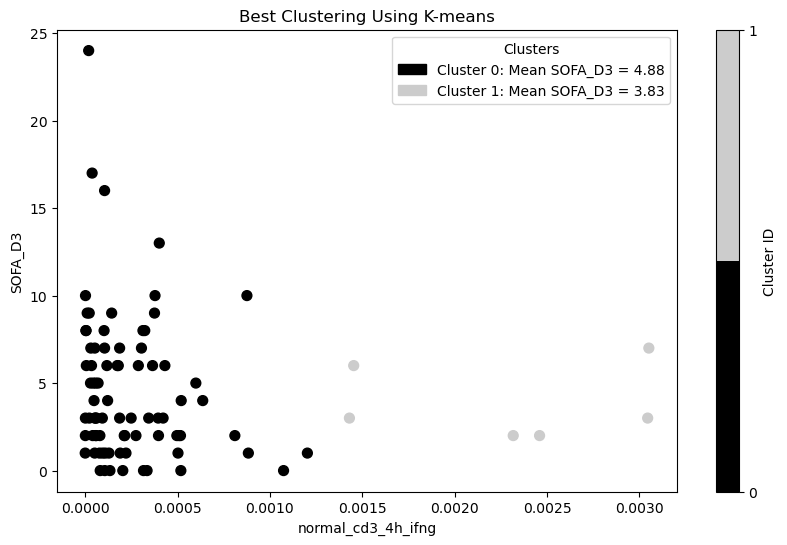

Best method: K-means
Best subset of columns: ('normal_cd3_4h_ifng',)
Best metrics: {'Silhouette': 0.8390795168728242, 'Davies_Bouldin': 0.37193635803036407, 'Composite': 0.3103090972238844}


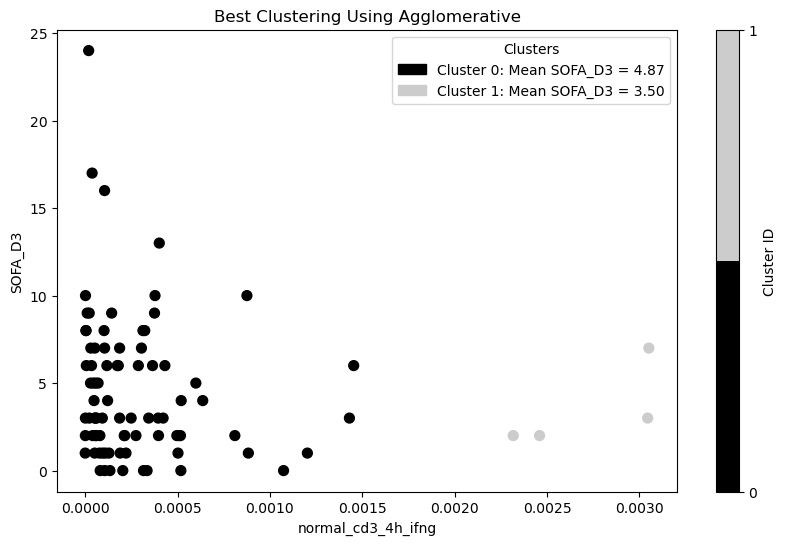

Best method: Agglomerative
Best subset of columns: ('normal_cd3_4h_ifng',)
Best metrics: {'Silhouette': 0.8600388082977751, 'Davies_Bouldin': 0.22477797912631575, 'Composite': 0.2799495822133917}


/var/folders/bq/vp8kmtn166x_ry0r60021s9jfzfs2_/T/ipykernel_22618/4157966933.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)


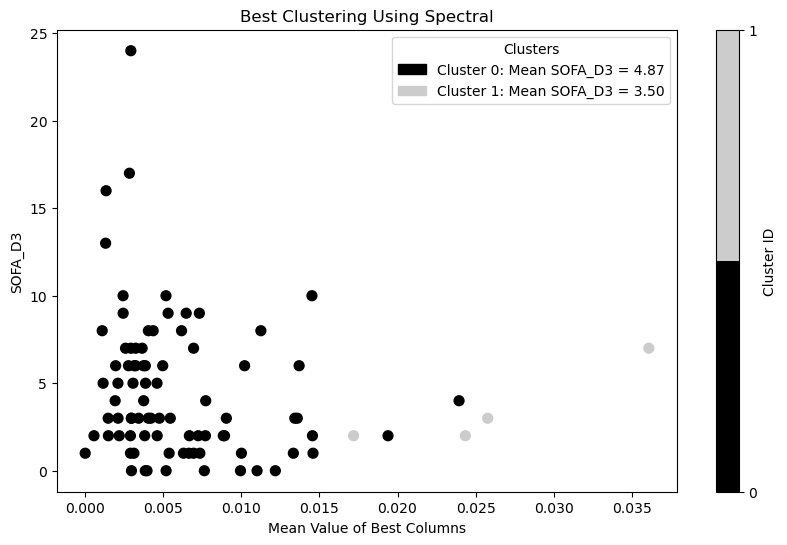

Best method: Spectral
Best subset of columns: ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng')
Best metrics: {'Silhouette': 0.7915169443053308, 'Davies_Bouldin': 0.34678413899513966, 'Composite': 0.21416680261934182}


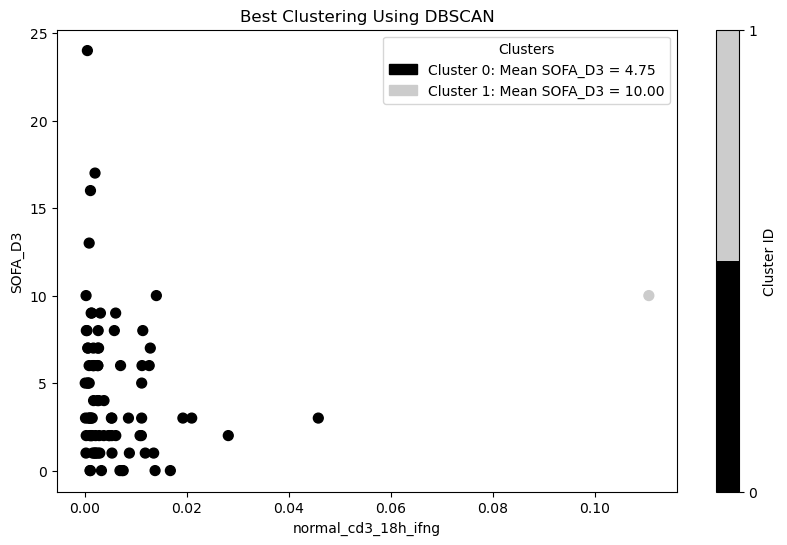

Best method: DBSCAN
Best subset of columns: ('normal_cd3_18h_ifng',)
Best metrics: {'Silhouette': 0.9286866166163571, 'Davies_Bouldin': 0.0425683559412584, 'Composite': 0.8861182606750987}


In [54]:
#CELL 2 for figures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from itertools import chain, combinations
import matplotlib.patches as mpatches

# Data Preparation
def load_data(filename):
    df = pd.read_csv(filename)
    return df

def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

def prepare_data(df, columns_of_interest):
    df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
    df.dropna(subset=['SOFA_D3'], inplace=True)
    df[columns_of_interest] = np.log1p(df[columns_of_interest])
    return df

# Clustering Functions
def perform_kmeans(X_scaled, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    return labels

def perform_agglomerative(X_scaled, num_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    labels = agglomerative.fit_predict(X_scaled)
    return labels

def perform_spectral(X_scaled, num_clusters):
    spectral = SpectralClustering(n_clusters=num_clusters, random_state=42)
    labels = spectral.fit_predict(X_scaled)
    return labels

def perform_dbscan(X_scaled):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    return labels

# Evaluation Metrics
def evaluate_clustering_with_labels(df, labels):
    unique_clusters = np.unique(labels)
    
    if len(unique_clusters) <= 1:
        print(f"Only {len(unique_clusters)} unique cluster(s) found. Skipping...")
        return -1, float('inf')  # Return an invalid silhouette score and Davies-Bouldin score
    
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    return silhouette, davies_bouldin


# Reporting and Plotting
def plot_results(df, best_method, best_columns, labels):
    plt.figure(figsize=(10, 6))
    if len(best_columns) > 1:
        x_values = df[list(best_columns)].mean(axis=1)
        x_label = 'Mean Value of Best Columns'
    else:
        x_values = df[list(best_columns)[0]]
        x_label = list(best_columns)[0]
    cmap = plt.cm.get_cmap('nipy_spectral', np.max(labels) + 1)
    scatter = plt.scatter(x_values, df['SOFA_D3'], c=labels, cmap=cmap, s=50)
    cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
    cbar.set_label('Cluster ID')
    legend_patches = []
    for cluster_id in np.unique(labels):
        mean_sofa = df[labels == cluster_id]['SOFA_D3'].mean()
        patch = mpatches.Patch(color=cmap(cluster_id), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
        legend_patches.append(patch)
    plt.legend(handles=legend_patches, title='Clusters')
    plt.xlabel(x_label)
    plt.ylabel('SOFA_D3')
    plt.title(f'Best Clustering Using {best_method}')
    plt.savefig(f"Best_Clustering_Using_{best_method}.png")
    plt.show()

def report_results(best_method, best_columns, best_metrics):
    print(f"Best method: {best_method}")
    print(f"Best subset of columns: {best_columns}")
    print(f"Best metrics: {best_metrics}")

# Main Code
if __name__ == "__main__":
    # Parameters
    columns_of_interest = [
        'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng',
        'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
        'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
    ]
    methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']
   
    best_metrics_by_method = {}
    best_columns_by_method = {}
    best_labels_by_method = {}
    temp_best_labels_by_method = {}
    
    # Load and prepare data
    df = load_data('20231026_Data_combined_python_D1.csv')
    df = prepare_data(df, columns_of_interest)

    best_method = None
    best_columns = None
    best_metrics = {
        'Silhouette': -1,
        'Davies_Bouldin': float('inf'),
        'Composite': -float('inf')
    }
    best_labels = None  # Add this to keep track of the best labels

    # Function to get all non-empty subsets of a list
    def all_subsets(lst):
        return chain(*[combinations(lst, i + 1) for i, _ in enumerate(lst)])

    # Iterate through all non-empty subsets of columns_of_interest
    for cols in all_subsets(columns_of_interest):
        for method in methods:
            # Data scaling
            print(f"Running {method} with columns {cols}")
            imputer = SimpleImputer(strategy="mean")
            df_imputed = imputer.fit_transform(df[list(cols)])
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(df_imputed)
            best_silhouette = -1
            best_num_clusters = 0

            temp_best_labels = None  # Temporary variable to hold the best labels for this iteration
          
            # Empirically determine the best number of clusters
            for num_clusters in range(2, 11):  # Search between 2 and 10 clusters
                print(f"Best silhouette for {method} is {best_silhouette}")
                if method == 'K-means':
                    labels = perform_kmeans(X_scaled, num_clusters)
                elif method == 'Agglomerative':
                    labels = perform_agglomerative(X_scaled, num_clusters)
                elif method == 'Spectral':
                    labels = perform_spectral(X_scaled, num_clusters)
                silhouette, davies_bouldin = evaluate_clustering_with_labels(X_scaled, labels)

                # Update temporary best labels
                if silhouette > best_silhouette:
                   best_silhouette = silhouette
                   temp_best_labels_by_method[method] = labels  # Update the best labels for this method and iteration
            
            # No need to perform final clustering. Use the best labels obtained in this iteration.
            labels = temp_best_labels_by_method.get(method, np.array([-1] * len(df)))  # Use -1 as default label if no label is found
       
            # Evaluate clustering
            composite = silhouette - davies_bouldin
            print(f"Evaluating {method} with labels {labels}")  # Diagnostic print
            silhouette, davies_bouldin = evaluate_clustering_with_labels(X_scaled, labels)
      

             # Update best method, columns, and metrics
            if method not in best_metrics_by_method or composite > best_metrics_by_method[method]['Composite']:
                best_metrics_by_method[method] = {
                    'Silhouette': silhouette,
                    'Davies_Bouldin': davies_bouldin,
                    'Composite': composite
                }
                best_columns_by_method[method] = cols
                best_labels_by_method[method] = labels

    
    for method in methods:
        if method in best_metrics_by_method:
            plot_results(df, method, best_columns_by_method[method], best_labels_by_method[method])
            report_results(method, best_columns_by_method[method], best_metrics_by_method[method])

Running K-means with columns ('normal_cd3_4h_ifng',)
Best silhouette for K-means is -1
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Best silhouette for K-means is 0.8390795168728242
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.8600388082977751
Best silhouette for Agglomerative is 0.8600388082977751
Best silhouette for Agglomerative is 0.8600388082977751
Best silhouette for Agg

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.8600388082977751
Best silhouette for Spectral is 0.8600388082977751
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Best silhouette for DBSCAN is 0.8600388082977751
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Best silhouette for K-means is 0.9286866166163571
Evaluating K-means with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.9286866166163571
Best silhouette for Agglomerative is 0.92868661

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Best silhouette for K-means is 0.7050467899943331
Evaluating K-means with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_pma_4h_ifng',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.6662184407360977
Best silhouette for Agglomerative is 0.666218440

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7652671679058577
Best silhouette for Spectral is 0.7652671679058577
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_18h_ifng',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Best silhouette for DBSCAN is 0.7652671679058577
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.627865858708765
Best silhouette for Spectral is 0.627865858708765
Best silhouette for Spectral is 0.627865858708765
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_tnf',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Best silhouette for DBSCAN is 0.627865858708765
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running DBSCAN with columns ('lps_18h_tnf',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Best silhouette for DBSCAN is 0.6003464498440438
Evaluating DBSCAN with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running K-means with columns ('lps_4h_il6',)
Best silhouette for K-means is -1
Best 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6377382777801397
Best silhouette for Spectral is 0.6377382777801397
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_il6',)
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Best silhouette for DBSCAN is 0.6377382777801397
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5834549782790216
Evaluating K-means with labels [1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
Running Agglomerative with columns ('lps_18h_il6',)
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Best silhouette for Agglomerative is 0.6010559088907034
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.73797319456356
Best silhouette for K-means is 0.73797319456356
Best silhouette for K-means is 0.73797319456356
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Best silhouette for Agglomerative is 0.7129142827013043
Evaluating Agglomerative with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Best silhouette for Spectral is 0.7996949554575588
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette for DBSCAN is 0.7996949554575588
Best silhouette fo

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6895109342906233
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Best silhouette for DBSCAN is 0.6895109342906233
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-mea

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6104951136052353
Best silhouette for K-means is 0.6104951136052353
Best silhouette for K-means is 0.6104951136052353
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Best silhouette for Agglomerative is 0.6801844397859194
Evaluating Agglomerative with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Best silhouette for Spectral is 0.6767918510055525
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6767918510055525
Best silhouette for DBSCAN is 0.6767918510055525
Best silhouette for DBSCAN is 0.6767918510055525
Best silhouette for DBSCAN is 0.6767918510055525
Best silhouette for DBSCAN is 0.6767918510055525
Best silhouette for DBSCAN is 0.6767918510055525
Best silhouette for DBSCAN

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Best silhouette for DBSCAN is 0.7870596733205362
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_18h_ifng', 'n

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` w

Best silhouette for K-means is 0.8331544787092792
Best silhouette for K-means is 0.8331544787092792
Evaluating K-means with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Best silhouette for Agglomerative is 0.8331544787092792
Evaluating Agglomerative with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4636600805859666
Best silhouette for Spectral is 0.4636600805859666
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Best silhouette for Spectral is 0.48094117967177086
Evaluating Spectral with labels [0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 3 1 0 0 3 0 0 3 0 3 0
 0 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.48094117967177086
Best silhouette for DBSCAN is 0.48094117967177086
Best silhouette for DBSCAN is 0.48094117967177086
Best silhouette for DBSCAN is 0.48094117967177086
Best silhouette for DBSCAN is 0.48094117967177086
Best silhoue

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Best silhouette for K-means is 0.6522994092732043
Evaluating K-means with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6475707915422682
Best silhouette for Agglomerative is 0.6475707915422682
Best silhouette for Agglomerative is 0.6475707915422682
Best silhouette for Agglomerative is 0.6475707915422682
Best silhouette for Agglomerative is 0.6475707915422682
Best silhouette for Agglom

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [1 2 0 1 0 1 0 1 0 2 0 0 0 0 2 1 1 0 0 1 1 2 0 0 0 2 2 1 1 0 2 0 1 2 2 2 0
 0 0 1 2 0 0 2 0 0 0 2 0 0 2 2 0 2 0 0 1 2 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3959857740601198
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Best silhouette for Agglomerative is 0.4490077019146337
Evaluating Agglomerative with labels [0 1 2 0 2 0 2 0 2 1 2 2 2 2 1 0 0 2 2 2 0 2 2 2 2 1 1 0 2 2 1 2 0 1 1 1 2
 2 2 0 1 2 2 1 1 2 2 2 2 2 1 1 2 1 2 2 0 1 2 1 2 2 2 2 0 1 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Best silhouette for Spectral is 0.5838014191756271
Evaluating Spectral with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Best silhouette for DBSCAN is 0.5838014191756271
Evaluating DBSCAN with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.38351890570431907
Best silhouette for K-means is 0.4467676351282695
Best silhouette for K-means is 0.4467676351282695
Best silhouette for K-means is 0.4467676351282695
Best silhouette for K-means is 0.4467676351282695
Best silhouette for K-means is 0.4467676351282695
Best silhouette for K-means is 0.4467676351282695
Best silhouette for K-means is 0.4467676351282695
Evaluating K-means with labels [2 1 1 2 0 2 1 2 0 1 0 0 0 1 1 2 2 0 1 2 2 1 1 0 0 1 1 2 2 1 1 0 2 1 0 1 0
 1 0 2 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 2 1 0 0 0 1 0 0 0 1 2 1 0 0 0 0 2 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3702385799071664
Best silhouette for Agglomerative is 0.41551524914609417
Best silhouette for Agglomerative is 0.41551524914609417
Best silhouette for Agglomerative is 0.41551524914609417
Best silhouette for Agglomerative is

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.45490620995981806
Evaluating K-means with labels [0 1 0 2 0 2 0 0 0 1 2 0 0 0 1 0 2 0 0 2 2 1 0 2 0 1 1 2 0 0 1 0 2 1 1 1 0
 0 0 2 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 2 1 0 1 0 0 0 0 2 0 2 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4148386457549977
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Best silhouette for Agglomerative is 0.4455733279730578
Evaluating Agglomerative with labels [0 1 2 0 2 0 2 0 2 1 2 2 2 2 1 2 0 2 2 0 0 1 2 0 2 1 1 0 2 2 1 2 0 1 1 1 2
 2 2 0 1 2 2 1 2 2 2 1 2 2 1 1 2 1 2 2 0 1 2 1 2 2 2 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Best silhouette for Spectral is 0.39419387503585396
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Best silhouette for DBSCAN is 0.39419387503585396
Evaluating DBSCA

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Best silhouette for K-means is 0.5497131777999557
Evaluating K-means with labels [2 0 2 1 1 2 2 2 1 0 1 2 2 2 0 2 2 1 2 1 1 2 2 1 2 0 0 2 1 2 0 2 1 0 3 0 1
 2 1 2 0 2 1 0 2 1 2 2 1 1 0 2 2 0 2 2 2 0 1 2 2 2 1 2 2 2 1 2 1 1 1 1 2 1
 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 0]
Running Agglomerative with columns ('lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Best silhouette for Agglomerative is 0.5958108278394828
Evaluating Agglomerative

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Best silhouette for Agglomerative is 0.5660782923000957
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Best silhouette for Spectral is 0.5678995388838977
Evaluating Spectral with labels [0 1 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5429412631406579
Best silhouette for Spectral is 0.5429412631406579
Best silhouette for Spectral is 0.5429412631406579
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Best silhouette for DBSCAN is 0.5429412631406579
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Best silhouette for K-means is 0.5556567873323015
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5642111137551227
Best silhouette for Agglomerative is 0.5642111137551227
Best silhouette for Agglomerative is 0.5642111137551227
Best silhouette for Agglomerative is 0.5642111137551227
Best silhouette for Agglomerative is 0.5642111137551227
Best silhouette for Agglomerative is 0.56

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Best silhouette for Agglomerative is 0.5887802106728591
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Best silhouette for Spectral is 0.7965380470205485
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Best silhouette for DBSCAN is 0.7965380470205485
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Best silhouette for K-means is 0.6611442775625722
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7076847085880922
Best silhouette for Agglomerative is 0.7076847085880922
Best silhouette for Agglomerative is 0.7076847085880922
Best silhouette for Agglomerative is 0.7076847085880922
Best silhouette fo

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Best silhouette for Spectral is 0.7001872165215222
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Best silhouette for DBSCAN is 0.7001872165215222
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Best silhouette for K-means is 0.6692939171862756
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.784039353017953
Best silhouette for Agglomerative is 0.784039353017953
Best silhouette for Agglomerative is 0.784039353017953
Best silhouette for Agglomerative is 0.784039353017953
Best silhouett

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Best silhouette for Agglomerative is 0.6873378637056932
Evaluating Agglomerative with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Best silhouette for Spectral is 0.6916649144996464
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Best silhouette for DBSCAN is 0.6916649144996464
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Best silhouette for K-means is 0.5938251913500111
Evaluating K-means with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6772298733134203
Best silhouette for Agglomerative is 0.6772298733134203
Best silhouette for Agglomerative is 0.6772298733134203
Best silhouette for Agglomerative is 0.6772298733134203
Best silhouette fo

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6521806108203138
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Best silhouette for Agglomerative is 0.7074807170389422
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Best silhouette for Spectral is 0.6998101845980317
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Best silhouette for DBSCAN is 0.6998101845980317
Evaluat

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4612767636760047
Best silhouette for K-means is 0.4612767636760047
Evaluating K-means with labels [2 1 0 0 0 2 0 1 0 1 0 0 0 0 1 2 1 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 2 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4722523366672749
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Best silhouette for Agglomerative is 0.5241958792381916
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 0 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5947763392438256
Best silhouette for Spectral is 0.5947763392438256
Best silhouette for Spectral is 0.5947763392438256
Best silhouette for Spectral is 0.5947763392438256
Best silhouette for Spectral is 0.5947763392438256
Best silhouette for Spectral is 0.5947763392438256
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette for DBSCAN is 0.5947763392438256
Best silhouette

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Best silhouette for DBSCAN is 0.5865515122943957
Evaluating DBSCAN with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4582449496285953
Best silhouette for K-means is 0.4582449496285953
Evaluating K-means with labels [2 0 1 1 1 2 0 0 1 0 1 1 1 1 0 2 1 1 1 1 2 0 0 1 1 0 0 1 1 0 0 1 2 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 2 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4438363612711368
Best silhouette for Agglomerative is 0.4971208553388156
Best silhouette for Agglomerative is 0.4971208553388156
Best silhouette for Agglomerative is 0.4971208553388156
Best silhouette for Agglomerative is 0.4971208553388156
Best silhouette for Agglomerative is 0.4971208553388156
Best silhouette for Agglomerative is 0.4971208553388156
Best silhouette for Agglomerative is 0.4971208553388156
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Best silhouette for Spectral is 0.5883511462179829
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5883511462179829
Best silhouette for DBSCAN is 0.5883511462179829
Best silhouette for DBSCAN is 0.5883511462179829
Best silhouette for DBSCAN is 0.5883511462179829
Best silhouette for DBSCAN is 0.5883511462179829
Best silho

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7785094612366016
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Best silhouette for DBSCAN is 0.7785094612366016
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6790185181961814
Best silhouette for K-means is 0.6790185181961814
Best silhouette for K-means is 0.6790185181961814
Best silhouette for K-means is 0.6790185181961814
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
Best silhouette for Agglomerative is 0.414741400894949
E

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Best silhouette for Spectral is 0.6798281958464337
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6798281958464337
Best silhouette for DBSCAN is 0.6798281958464337
Best silhouette for DBSCAN is 0.6798281958464337
Best silhouette for DBSCAN is 0.6798281958464337
Best silhouette for DBSCAN is 0.6798281958464337
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.7215633252891286
Best silhouette for K-means is 0.7215633252891286
Best silhouette for K-means is 0.7215633252891286
Best silhouette for K-means is 0.7215633252891286
Evaluating K-means with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.7602607474253319
Best silhouette for Agglomerative is 0.760260747

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.3595343101659207
Best silhouette for Spectral is 0.42491897470592516
Best silhouette for Spectral is 0.45525602032908835
Best silhouette for Spectral is 0.45525602032908835
Best silhouette for Spectral is 0.45525602032908835
Best silhouette for Spectral is 0.45525602032908835
Best silhouette for Spectral is 0.45525602032908835
Best silhouette for Spectral is 0.45525602032908835
Evaluating Spectral with labels [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 3 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.45525602032908835
Best silhouette for DBSCAN is 0.45525602032908835
Best silhouette for DBSCAN is 0.45525602032908835
Best silhouette for DBSCAN is 0.45525602032908835
Best silhouette for DBSCAN is 0.4552560

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.614919397230353
Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Best silhouette for DBSCAN is 0.614919397230353
Evaluating DBSCAN with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4986003463232582
Best silhouette for K-means is 0.4986003463232582
Best silhouette for K-means is 0.4986003463232582
Best silhouette for K-means is 0.4986003463232582
Evaluating K-means with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.47627715420361294
Best silhouette for Agglomerative is 0.5009812695427703
Best silhouette for Agglomerative is 0.5009812695427703
Best silhouette for Agglomerative is 0.5009812695427703
Best silhouette for Agglomerative is 0.5009812695427703
Best silhouette for Agglomerative is 0.5009812695427703
Best silhouette for Agglomerative is 0.5009812695427703
Best silhouette for Agglomerative is 0.5009812695427703
E

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Best silhouette for Spectral is 0.46809629818419546
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.46809629818419546
Best silhouette for DBSCAN is 0.46809629818419546
Best silhouette for DBSCAN is 0.46809629818419546
Best silhouette for DBSCAN is 0.46809629818419546
Best silhouette for DBSCAN is 0.46809629818419

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4688855948281156
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Best silhouette for DBSCAN is 0.4688855948281156
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.502827368878673
Best silhouette for K-means is 0.502827368878673
Best silhouette for K-means is 0.502827368878673
Best silhouette for K-means is 0.502827368878673
Evaluating K-means with labels [2 0 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 0 1 2 0 0 2 2 0 0 0 2
 0 2 0 0 2 2 0 2 2 2 2 2 2 0 0 0 2 0 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.49941921832930253
Best silhouette for Agglomerative is 0.5237012549581092
Best silhouette for Agglomerative is 0.5237012549581092
Best silhouette for Agglomerative is 0.5237012549581092
Best silhouette for Agglomerative is 0.5237012549581092
Best silhouette for Agglomerative is 0.5237012549581092
Best silhouette for Agglomerative is 0.5237012549581092
Best silhouette for Agglomerative is 0.5237012549581092
Eval

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Spectral with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Best silhouette for Spectral is 0.49117592310166686
Evaluating Spectral with labels [0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.49117592310166686
Best silhouette for DBSCAN is 0.49117592310166686
Best silhouett

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4709626120126629
Best silhouette for K-means is 0.4709626120126629
Best silhouette for K-means is 0.4709626120126629
Best silhouette for K-means is 0.4709626120126629
Best silhouette for K-means is 0.4709626120126629
Best silhouette for K-means is 0.4709626120126629
Evaluating K-means with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.384128130094969
Best silhouette for Agglomerative is 0.384128130094969
Best silhouette for Agglomerative is 0.384128130094969
Best silhouette for Agglomerative is 0.384128130094969
Best silhouette for Agglomerative is 0.384128130094969
Best silhouette for Agglomerative is 0.384128130094969
Best silhou

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Best silhouette for Agglomerative is 0.4629579550271676
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.4670132004439444
Best silhouette for Spectral is 0.4670132004439444
Best silhouette for Spectral is 0.4670132004439444
Best silhouette for Spectral is 0.4670132004439444
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5114818207465113
Best silhouette for Spectral is 0.5114818207465113
Best silhouette for Spectral is 0.5114818207465113
Evaluating Spectral with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Best silhouette for DBSCAN is 0.5114818207465113
Evaluating DBSCAN with labels [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.4379879098444515
Best silhouette for DBSCAN is 0.4379879098444515
Best silhouette for DBSCAN is 0.4379879098444515
Evaluating DBSCAN with labels [0 2 0 1 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 2 2 0 0 2 2 0 1 2 2 2 0
 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 2 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running K-means with columns ('normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Best silhouette for K-means is 0.4362259179740881
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4234023789099726
Best silhouette for K-means is 0.4234023789099726
Evaluating K-means with labels [1 2 0 1 0 1 0 1 0 2 0 0 0 0 2 1 1 0 0 1 1 2 0 0 0 2 2 1 1 2 2 0 1 2 0 2 0
 2 0 1 2 0 0 2 0 0 0 0 0 0 2 2 0 2 2 2 1 2 0 0 0 1 0 0 0 2 1 2 0 0 0 0 1 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Best silhouette for Agglomerative is 0.4342957860799135
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.46366174972526725
Best silhouette for Spectral is 0.46366174972526725
Best silhouette for Spectral is 0.46366174972526725
Best silhouette for Spectral is 0.46366174972526725
Best silhouette for Spectral is 0.46366174972526725
Best silhouette for Spectral is 0.46366174972526725
Evaluating Spectral with labels [0 2 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 2 2 0 0 2 2 0 1 2 0 2 0
 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.46366174972526725
Best silhouette for DBSCAN is 0.46366174972526725
Best silhouette for DBSCAN is 0.46366174972526725
Best silhouette for DBSCAN is 0.46366174972526725
Best silhouette for DBSCAN is 0.46366174972526725
Best silhouette for DBSCAN is 0.46366174972526725
Best silhouette for DBSCAN is 0.46366174972526725
B

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.3929923001589107
Best silhouette for K-means is 0.3929923001589107
Evaluating K-means with labels [1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Best silhouette for Agglomerative is 0.4285171205280176
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.44081668518915174
Best silhouette for Spectral is 0.44081668518915174
Best silhouette for Spectral is 0.44081668518915174
Best silhouette for Spectral is 0.44081668518915174
Best silhouette for Spectral is 0.44081668518915174
Best silhouette for Spectral is 0.44081668518915174
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.44081668518915174
Best silhouette for DBSCAN is 0.44081668518915174
Best silhouette for DBSCAN is 0.44081668518915174
Best silhouette for DBSCAN is 0.44081668518915174
Best silhouette for DBSCAN is 0.44081668518915174
Best silhouette for DBSCAN is 0.44081668518915174
Best silhouette for DBSCAN is 0.44081668518915174


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Best silhouette for DBSCAN is 0.43619013670303186
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('normal_p

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5471466506048198
Best silhouette for K-means is 0.5471466506048198
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Best silhouette for Agglomerative is 0.5539279240993752
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5518897088201485
Best silhouette for Spectral is 0.5518897088201485
Best silhouette for Spectral is 0.5518897088201485
Best silhouette for Spectral is 0.5518897088201485
Best silhouette for Spectral is 0.5518897088201485
Best silhouette for Spectral is 0.5518897088201485
Evaluating Spectral with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running DBSCAN with columns ('lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for DBSCAN is 0.5518897088201485
Best silhouette for D

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Best silhouette for DBSCAN is 0.5594489835351855
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('lps_18h_tnf', 'lps_4h_il6'

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.782985549946249
Best silhouette for K-means is 0.782985549946249
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Best silhouette for Agglomerative is 0.782985549946249
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Best silhouette for Spectral is 0.7187373579426145
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7187373579426145
Best silhouette for DBSCAN is 0.7

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6916188135134688
Best silhouette for K-means is 0.6916188135134688
Best silhouette for K-means is 0.6916188135134688
Best silhouette for K-means is 0.6916188135134688
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglomerative is 0.6397237816785853
Best silhouette for Agglome

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6924493993117962
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Best silhouette for Spectral is 0.7044903875006563
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6978899077490038
Best silhouette for Spectral is 0.6978899077490038
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Best silhouette for DBSCAN is 0.6978899077490038
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.715536485661247
Best silhouette for K-means is 0.715536485661247
Best silhouette for K-means is 0.715536485661247
Best silhouette for K-means is 0.715536485661247
Best silhouette for K-means is 0.715536485661247
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.715536485661247
Best silhouette for Agglomerative is 0.7155

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.4789806187734534
Best silhouette for Agglomerative is 0.4789806187734534
Best silhouette for Agglomerative is 0.4789806187734534
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 2 0 0 2 1 0 0 0 1 1 3 0 0 1 0 2 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Best silhouette for Spectral is 0.6358260404482373
Evaluating Spectral with labels [1 0 0 0 0 1 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6631918097809055
Best silhouette for Spectral is 0.6631918097809055
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Best silhouette for DBSCAN is 0.6631918097809055
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4648917374542121
Best silhouette for K-means is 0.4648917374542121
Best silhouette for K-means is 0.4648917374542121
Best silhouette for K-means is 0.4648917374542121
Best silhouette for K-means is 0.4648917374542121
Evaluating K-means with labels [2 0 1 1 1 2 1 1 1 0 1 1 1 1 0 2 1 1 1 1 2 0 1 1 1 0 0 3 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.38074617280709017
Best silhouette for Agglomerative is 0.4431991196688165
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4502575023258138
Best silhouette for Agglomerative is 0.4

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.4673144967316341
Best silhouette for Agglomerative is 0.4673144967316341
Best silhouette for Agglomerative is 0.4673144967316341
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 0 0 0 2 1 0 0 0 1 1 3 0 1 1 0 2 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 2 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.3935222704335608
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Best silhouette for Spectral is 0.5421325214828054
Evaluating Spectral with labels [2 0 0 0 0 2 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Best silhouette for K-means is 0.5454445154199692
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.7086260422461057
Best silhouette for Agglomerative is 0.708626

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Best silhouette for Agglomerative is 0.4670244126088723
Evaluating Agglomerative with labels [0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.707077852998736
Best silhouette for Spectral is 0.707077852998736
Best silhouette for Spectral is 0.707077852998736
Best silhouette for Spectral is 0.707077852998736
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Best silhouette for DBSCAN is 0.707077852998736
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.3748459679045398
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Best silhouette for K-means is 0.43455247714175244
Evaluating K-means with labels [0 1 2 2 2 0 2 2 2 1 2 2 2 2 1 0 2 2 2 2 0 1 2 2 2 1 1 0 2 1 1 2 0 1 1 1 2
 1 2 0 1 2 2 1 2 2 2 1 2 2 1 1 2 1 1 1 0 1 2 1 2 2 2 2 2 1 0 2 2 2 2 2 0 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
Running Aggl

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4165907316950667
Evaluating K-means with labels [0 2 1 1 1 0 1 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 1 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 1 1 1 1 1 1 2 0 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.309226822465466
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Best silhouette for Agglomerative is 0.34409232537985984
Evaluating Agglomerative with labels [2 0 1 1 1 2 0 1 1 0 1 0 1 0 0 2 1 1 0 1 2 0 0 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 1 0 0 1

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Best silhouette for Spectral is 0.6315496029272619
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.6315496029272619
Best silhouette for DBSCAN is 0.63154960292

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Best silhouette for K-means is 0.407126392053824
Evaluating K-means with labels [1 0 2 2 2 1 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 2 2 2 0 0 2 2 0 0 2 1 0 0 0 2
 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 0 0 1 0 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.39296918359891003
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerative is 0.45181157870168276
Best silhouette for Agglomerativ

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Best silhouette for Spectral is 0.6450439853960496
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6450439853960496
Best silhouette for DBSCAN is 0.6450439853960496
Best silhouette for DBSCAN is 0.6450439853960496
Best silhouette for DBSCAN is 0.6450439853960496
Best silhouette for DBSCAN is 0.64504

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6405251785471527
Best silhouette for Spectral is 0.6405251785471527
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Best silhouette for DBSCAN is 0.6405251785471527
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Best silhouette for K-means is 0.3998269014481844
Evaluating K-means with labels [1 0 2 2 2 1 0 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 0 2 2 0 0 2 2 0 0 2 1 0 2 0 2
 0 2 2 0 0 2 0 2 2 0 2 2 2 0 0 2 0 0 0 1 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.37208301514598324
Best silhouette for Agglomerative is 0.42240312194381535
Best silhouette for Agglomerative is 0.42240312194381535
Best silhouette for Agglomerative is 0.42240312194381535
Best silhouette for Agglomerative is 0.42240312194381535
Best silhouette for Agglomerative is 0.42

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.38642991536238236
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Best silhouette for Agglomerative is 0.4368951847417682
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.639764723084275
Best silhouette for Spectral is 0.639764723084275
Best silhouette for Spectral is 0.639764723084275
Best silhouette for Spectral is 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Best silhouette for Spectral is 0.5155675191679673
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Best silhouette for DBSCAN is 0.5155675191679673
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4631032596290384
Best silhouette for K-means is 0.49112799087240944
Best silhouette for K-means is 0.49112799087240944
Best silhouette for K-means is 0.49112799087240944
Best silhouette for K-means is 0.49112799087240944
Best silhouette for K-means is 0.49112799087240944
Best silhouette for K-means is 0.49112799087240944
Best silhouette for K-means is 0.49112799087240944
Evaluating K-means with labels [2 0 1 1 1 2 1 1 1 0 1 1 1 1 0 2 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 2 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.46276665171987064
Best silhouette for Agglomerative is 0.49695449996361607
Best silhouette for Agglomerative is 0.49695449996361607
Best silhouette for Agglomerative is 0.49695449996361607
B

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [2 0 1 1 1 2 0 1 1 0 1 1 1 1 0 2 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4531360131190324
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Best silhouette for Agglomerative is 0.48775182731386546
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Best silhouette for K-means is 0.4889770938030267
Evaluating K-means with labels [0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4813356768111191
Best silhouette for Agglomerative is 0.4813356768111191
Best silhouette for Agglomerative is 0.4813356768111191
Best silhouette for Agglomerative is 0.481335676811

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4864666158178291
Evaluating K-means with labels [0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Best silhouette for Agglomerative is 0.49262920525629283
Evaluating Agglomerative with labels [1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6253720939191191
Best silhouette for Spectral is 0.6253720939191191
Best silhouette for Spectral is 0.6253720939191191
Best silhouette for Spectral is 0.6253720939191191
Best silhouette for Spectral is 0.6253720939191191
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939191191
Best silhouette for DBSCAN is 0.6253720939

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Best silhouette for DBSCAN is 0.622635781792667
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.32479707186608103
Best silhouette for K-means is 0.4054214244549016
Best silhouette for 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.42916997435604287
Best silhouette for K-means is 0.42916997435604287
Evaluating K-means with labels [0 2 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 2 2 1 0 2 2 0 1 2 2 2 0
 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 2 2 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3897490340283809
Best silhouette for Agglomerative is 0.4407954024689966
Best silhouette for Agglomerative is 0.44477068173296486
Best silhouette for Agglomerative is 0.44477068173296486
Best silhouette for Agglomerative is 0.44477068173296486
Best silhouette for Agglomerative is 0.44477068173296486
Best silhouette for Agglomerative is 0.44477068173296486
Best silhouette for Agglomerative is 0.44477068173296486
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5026668215452521
Best silhouette for Spectral is 0.5026668215452521
Best silhouette for Spectral is 0.5026668215452521
Best silhouette for Spectral is 0.5026668215452521
Best silhouette for Spectral is 0.5026668215452521
Best silhouette for Spectral is 0.5026668215452521
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5026668215452521
Best silhouette for DBSCAN is 0.5026668215452521
Best silhouette for DBSCAN is 0.5026668215452521
Best silhouette for DBSCAN is 0.5026668215452521
Best silhouette for DBSCAN is 0.5026668215452521
Best silhouette for DBSCAN is 0.5026668215452521
Best silhouette for DBSCAN is 0.5026668

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.42973723659451607
Best silhouette for K-means is 0.42973723659451607
Best silhouette for K-means is 0.42973723659451607
Evaluating K-means with labels [2 0 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 2 2 2 0 0 1 2 0 0 2 1 0 0 0 2
 0 2 0 0 2 2 0 2 2 2 0 2 2 0 0 2 0 0 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3886793191959611
Best silhouette for Agglomerative is 0.43107361770124897
Best silhouette for Agglomerative is 0.43107361770124897
Best silhouette for Agglomerative is 0.43107361770124897
Best silhouette for Agglomerative is 0.43107361770124897
Best silhouette for Agglomerative is 0.43107361770124897
Best silhouette for Agglomerative is 0.43107361770124897
Best silhouette for Agglomerative is 0.43107361770124897
Evaluating Agglomer

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.38072531798857456
Best silhouette for Spectral is 0.4170184420308502
Best silhouette for Spectral is 0.4170184420308502
Best silhouette for Spectral is 0.4170184420308502
Best silhouette for Spectral is 0.4170184420308502
Best silhouette for Spectral is 0.4170184420308502
Best silhouette for Spectral is 0.4170184420308502
Best silhouette for Spectral is 0.4170184420308502
Evaluating Spectral with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 2 1 1 0 1 1 0 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4170184420308502
Best silhouette for DBSCAN is 0.4170184420308502
Best silhouette for DBSCAN is 0.4170184420308502
Best silhouette for DBSCAN is 0.4170184420308502
Best silhouette for DBSCAN is 0.41

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.43259165471228134
Best silhouette for Spectral is 0.43259165471228134
Evaluating Spectral with labels [0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 2 2 1 0 2 2 0 1 2 2 2 0
 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Best silhouette for DBSCAN is 0.43259165471228134
Evaluating DBSCAN with labels [0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 2 2 1 0 2 2 0 1 2 2 2 0
 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4355929255662259
Best silhouette for K-means is 0.4355929255662259
Best silhouette for K-means is 0.4355929255662259
Best silhouette for K-means is 0.4355929255662259
Best silhouette for K-means is 0.4355929255662259
Evaluating K-means with labels [0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3360082626955461
Best silhouette for Agglomerative is 0.358253489663599
Best silhouette for Agglomerative is 0.358253489663599
Best silhouette for Agglomerative is 0.358253489663599
Best silhouette for Agglomerative is 0.358253489663599
Best silhouette for Agglomerative is 0.358253489663599
Best silhouette for Agglomerative is 0.358253

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.5066321967182996
Best silhouette for Agglomerative is 0.5066321967182996
Best silhouette for Agglomerative is 0.5066321967182996
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Best silhouette for Spectral is 0.4997008892540598
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.48811116349864897
Best silhouette for Spectral is 0.48811116349864897
Best silhouette for Spectral is 0.48811116349864897
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Best silhouette for DBSCAN is 0.48811116349864897
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4861559352993123
Best silhouette for K-means is 0.4861559352993123
Best silhouette for K-means is 0.4861559352993123
Best silhouette for K-means is 0.4861559352993123
Best silhouette for K-means is 0.4861559352993123
Best silhouette for K-means is 0.4861559352993123
Best silhouette for K-means is 0.4861559352993123
Evaluating K-means with labels [0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.47910818445890196
Best silhouette for Agglomerative is 0.4980795025601734
Best silhouette for Agglomerative is 0.4980795025601734
Best silhouette for Agglomerative is 0.4980795025601734
Best silhouette for Agglomerative is 0.4980795025601734
Bes

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [2 1 0 2 0 2 0 2 0 1 0 0 0 0 1 2 2 0 0 2 2 1 0 2 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 2 1 0 1 0 0 0 0 2 1 2 1 0 0 0 0 2 0
 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3873979088340282
Best silhouette for Agglomerative is 0.4128210077417875
Best silhouette for Agglomerative is 0.4128210077417875
Best silhouette for Agglomerative is 0.4128210077417875
Best silhouette for Agglomerative is 0.4128210077417875
Best silhouette for Agglomerative is 0.4128210077417875
Best silhouette for Agglomerative is 0.4128210077417875
Best silhouette for Agglomerative is 0.4128210077417875
Evaluating Agglomerative with labels [2 1 0 2 0 2 0 2 0 1 0 0 0 0 1 2 2 0 0 2 2 0 0 2 0 1 1 2 0 0 1 0 2 1 1 1 0
 0 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 2 1 0 0 0 2 0 0 0 1 2 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.3620280618844349
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.3325286915849632
Best silhouette for K-means is 0.39769908211557803
Best silhouette for K-means is 0.39769908211557803
Best silhouette for K-means is 0.39769908211557803
Best silhouette for K-means is 0.39769908211557803
Best silhouette for K-means is 0.39769908211557803
Best silhouette for K-means is 0.39769908211557803
Best silhouette for K-means is 0.39769908211557803
Evaluating K-means with labels [2 1 0 2 0 2 0 2 0 1 0 0 0 0 1 2 2 0 0 2 2 1 0 2 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 2 1 0 0 0 0 0 0 2 1 2 1 0 0 0 0 2 0
 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.39280840581508
Best silhouette for K-means is 0.39280840581508
Evaluating K-means with labels [1 2 0 1 0 1 0 1 0 2 0 0 0 0 2 1 1 0 0 1 1 2 0 1 0 2 2 1 1 2 2 0 1 2 0 2 0
 2 0 1 2 0 0 2 0 0 0 0 0 0 2 2 0 2 2 2 1 2 0 0 0 0 0 0 1 2 1 2 0 0 0 0 1 0
 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Best silhouette for Agglomerative is 0.3407881281197641
Evaluating Agglomerative with labels [1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.3868838003924237
Best silhouette for Spectral is 0.4040644836195184
Best silhouette for Spectral is 0.4040644836195184
Best silhouette for Spectral is 0.4040644836195184
Best silhouette for Spectral is 0.4040644836195184
Best silhouette for Spectral is 0.4040644836195184
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4040644836195184
Best silhouette for DBSCAN is 0.4040644836195184
Best silhouette for DBSCAN is 0.4040644836195184
Best silhouette for DBSCAN is 0.4040644836195184
Best silhouette for DBSCAN is 0.4040644836195184
Best silhouette for DBSCAN is 0.4040644836195184
Best silhouette for DBSCAN is 0.40406448

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Best silhouette for DBSCAN is 0.4707178533247483
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running K-means with columns ('norm

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.46201301301564845
Best silhouette for K-means is 0.46201301301564845
Best silhouette for K-means is 0.46201301301564845
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4622945771188028
Best silhouette for Agglomerative is 0.4645434512389741
Best silhouette for Agglomerative is 0.4645434512389741
Best silhouette for Agglomerative is 0.4645434512389741
Best silhouette for Agglomerative is 0.4645434512389741
Best silhouette for Agglomerative is 0.4645434512389741
Best silhouette for Agglomerative is 0.4645434512389741
Best silhouette for Agglomerative is 0.4645434512389741
Evaluating Agglomerative with label

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.45732832485124386
Best silhouette for Spectral is 0.45732832485124386
Best silhouette for Spectral is 0.45732832485124386
Best silhouette for Spectral is 0.45732832485124386
Best silhouette for Spectral is 0.45732832485124386
Best silhouette for Spectral is 0.45732832485124386
Best silhouette for Spectral is 0.45732832485124386
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45732832485124386
Best silhouette for DBSCAN is 0.45

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4606881482307662
Best silhouette for K-means is 0.4606881482307662
Best silhouette for K-means is 0.4606881482307662
Best silhouette for K-means is 0.4606881482307662
Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is 0.45559594489272953
Best silhouette for Agglomerative is

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Best silhouette for Spectral is 0.4567286961144844
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Runnin

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5500917005390771
Best silhouette for Spectral is 0.5500917005390771
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Best silhouette for DBSCAN is 0.5500917005390771
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5667165078245225
Best silhouette for K-means is 0.5667165078245225
Best silhouette for K-means is 0.5667165078245225
Best silhouette for K-means is 0.5667165078245225
Best silhouette for K-means is 0.5667165078245225
Evaluating K-means with labels [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silhouette for Agglomerative is 0.7155931955284325
Best silho

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.7162777963399045
Best silhouette for Agglomerative is 0.7162777963399045
Best silhouette for Agglomerative is 0.7162777963399045
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6974332701354293
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Best silhouette for Spectral is 0.707176277317964
Evaluating Spectral with labels 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.7053298511731935
Best silhouette for Spectral is 0.7053298511731935
Best silhouette for Spectral is 0.7053298511731935
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Best silhouette for DBSCAN is 0.7053298511731935
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6414856357848917
Best silhouette for K-means is 0.6414856357848917
Best silhouette for K-means is 0.6414856357848917
Best silhouette for K-means is 0.6414856357848917
Best silhouette for K-means is 0.6414856357848917
Best silhouette for K-means is 0.6414856357848917
Best silhouette for K-means is 0.6414856357848917
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerative is 0.5492863269475218
Best silhouette for Agglomerativ

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Best silhouette for Agglomerative is 0.66078746760526
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Best silhouette for K-means is 0.5599665310867689
Evaluating K-means with labels [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6699932359632826
Best silhouette for K-means is 0.6699932359632826
Best silhouette for K-means is 0.6699932359632826
Best silhouette for K-means is 0.6699932359632826
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhouette for Agglomerative is 0.6699932359632826
Best silhoue

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Best silhouette for Spectral is 0.6354080591816976
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6354080591816976

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6427176427752418
Best silhouette for Spectral is 0.6427176427752418
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Best silhouette for DBSCAN is 0.6427176427752418
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.6636708024234322
Best silhouette for K-means is 0.6636708024234322
Best silhouette for K-means is 0.6636708024234322
Best silhouette for K-means is 0.6636708024234322
Best silhouette for K-means is 0.6636708024234322
Best silhouette for K-means is 0.6636708024234322
Evaluating K-means with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agglomerative is 0.6636708024234322
Best silhouette for Agg

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Best silhouette for Agglomerative is 0.6649448650115966
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.6308695941150294
Best silhouette for Spectral is 0.6421365767551924
Best silhouette for Spectral is 0.6421365767551924
Best si

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.41835443805346756
Best silhouette for K-means is 0.4658031296068343
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Best silhouette for K-means is 0.4693685535496725
Evaluating K-means with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 0 0 0 2 1 0 0 0 1 1 3 0 1 1 0 2 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.417761638244934
Best silhouette for Agglomerative is 0.46843849068318416
Best silhouette for Agglomerative is 0.4715087298931295
Best silhouette for Agglomerative is 0.47150

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.44854773903621176
Evaluating K-means with labels [0 1 2 2 2 0 1 2 2 1 2 2 2 2 1 0 2 2 2 2 0 1 2 2 2 1 1 0 2 1 1 2 0 1 1 1 2
 1 2 1 1 2 2 1 2 2 2 2 2 2 1 1 2 2 1 1 0 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4081292623646818
Best silhouette for Agglomerative is 0.4601561687597215
Best silhouette for Agglomerative is 0.4601561687597215
Best silhouette for Agglomerative is 0.4601561687597215
Best silhouette for Agglomerative is 0.4601561687597215
Best silhouette for Agglomerative is 0.4601561687597215
Best silhouette for Agglomerative is 0.4601561687597215
Best silhouette for Agglomerative is 0.4601561687597215
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 0 1 0
 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.666594746058189
Best silhouette for Spectral is 0.666594746058189
Best silhouette for Spectral is 0.666594746058189
Best silhouette for Spectral is 0.666594746058189
Best silhouette for Spectral is 0.666594746058189
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.666594746058189
Best silhouette for DBSCAN is 0.

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Best silhouette for DBSCAN is 0.6652761406913807
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-means is 0.46864985575285995
Best silhouette for K-

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4669626423562896
Best silhouette for K-means is 0.4669626423562896
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Best silhouette for Agglomerative is 0.66081081033235
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Best silhouette for Spectral is 0.6595222912980192
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette for DBSCAN is 0.6595222912980192
Best silhouette f

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4377516572859631
Best silhouette for K-means is 0.4377516572859631
Evaluating K-means with labels [0 2 1 1 1 0 1 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 1 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 1 1 1 1 1 1 1 2 0 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.40590835593503294
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Best silhouette for Agglomerative is 0.4358803429248219
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Best silhouette for Spectral is 0.5874398947017475
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN is 0.5874398947017475
Best silhouette for DBSCAN 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Best silhouette for DBSCAN is 0.5849044602742264
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-me

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.44136097234294736
Best silhouette for K-means is 0.44136097234294736
Best silhouette for K-means is 0.44136097234294736
Evaluating K-means with labels [2 0 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 1 1 0 0 1 2 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4039100707390673
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Best silhouette for Agglomerative is 0.44345094946645525
Eval

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Best silhouette for Spectral is 0.5959690524090384
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5959690524090384
Best silhouette for DBSCAN is 0.5959690524090384
Best silhouette for DBSCAN is 0.5959690524090384
Best silhouette for DBSCAN is 0.5959690524090384
Best silhouette for DBSCAN is 0.5959690524090384
Best silhouette for DBSC

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5936210361254421
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Best silhouette for DBSCAN is 0.5936210361254421
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Best silhouette for K-means is 0.37636241540807785
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best silhouette for Agglomerative is 0.4201507217249569
Best sil

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.33479940619410625
Best silhouette for Spectral is 0.33888844918984606
Best silhouette for Spectral is 0.5125951907452674
Best silhouette for Spectral is 0.5220008342854874
Best silhouette for Spectral is 0.5220008342854874
Best silhouette for Spectral is 0.5220008342854874
Best silhouette for Spectral is 0.5220008342854874
Best silhouette for Spectral is 0.5220008342854874
Evaluating Spectral with labels [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5220008342854874
Best silhouette for DBSCAN is 0.5220008342854874
Best silhouette for DBSCAN is 0.5220008342854874
Best silhouette for DBSCAN is 0.5220008342854874
Best silhoue

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.36592734131445465
Best silhouette for K-means is 0.36592734131445465
Best silhouette for K-means is 0.36592734131445465
Best silhouette for K-means is 0.36592734131445465
Best silhouette for K-means is 0.36592734131445465
Best silhouette for K-means is 0.36592734131445465
Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 1 0 2 1 1 0 0 1 1 2 0 1 1 0 2 1 0 1 0
 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.41151315085503076
Best silhouette for Agglomerative is 0.41151315085503076
Best silhouette for Agglomerative is 0.41151315085503076
Best silhouette for Agglomerative is 0.41151315085503076
Best silhouette for Agglomerative is 0.41151315085503076
Best silhoue

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.31024122608627536
Best silhouette for Agglomerative is 0.32161060717853834
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Best silhouette for Agglomerative is 0.3314537116584068
Evaluating Agglomerative with labels [1 0 0 1 2 1 0 1 2 0 2 0 0 0 0 1 1 2 0 1 1 0 0 1 2 0 0 3 2 0 0 2 1 0 0 0 2
 0 2 1 0 0 2 0 0 2 0 0 2 2 0 0 0 2 0 0 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Best silhouette for Spectral is 0.5765936950875045
Evaluating Spectral with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Best silhouette for DBSCAN is 0.5765936950875045
Evaluating DBSCAN with labels 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for DBSCAN is 0.4552673307620537
Best silhouette for DBSCAN is 0.4552673307620537
Evaluating DBSCAN with labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.4178605674321186
Best silhouette for K-means is 0.45084420772649214
Best silhouette for K-means is 0.45084420772649214
Best silhouette for K-means is 0.45084420772649214
Best silhouette for K-means is 0.45084420772649214
Best silhouette for K-means is 0.45084420772649214
Best silhouette for K-means is 0.45084420772649214
Best silhouette for K-means is 0.45084420772649214
Evaluating K-means with labels [0 2 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 2 2 1 0 2 2 0 1 2 2 2 0
 2 0 0 2 0 0 2 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4345476238949119
Best silhouette for K-means is 0.4345476238949119
Evaluating K-means with labels [1 0 1 2 1 2 0 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 1
 0 1 2 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.40991233502021673
Best silhouette for Agglomerative is 0.4474468020686124
Best silhouette for Agglomerative is 0.4474468020686124
Best silhouette for Agglomerative is 0.4474468020686124
Best silhouette for Agglomerative is 0.4474468020686124
Best silhouette for Agglomerative is 0.4474468020686124
Best silhouette for Agglomerative is 0.4474468020686124
Best silhouette for Agglomerative is 0.4474468020686124
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.4282200287913388
Best silhouette for Spectral is 0.4282200287913388
Best silhouette for Spectral is 0.4282200287913388
Best silhouette for Spectral is 0.4282200287913388
Best silhouette for Spectral is 0.4282200287913388
Best silhouette for Spectral is 0.4282200287913388
Best silhouette for Spectral is 0.4282200287913388
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4282200287913388
Best silhouette for DBSCAN is 0.4282200287913388
Best silhouette for DBSCAN is 0.4282200287913388
Best silhouette for DBSCAN is 0.4282200287913388
Best silhouette for DBSCAN is 0.4282200287913388
Best silhouette for DBS

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4361353384309786
Best silhouette for K-means is 0.4361353384309786
Best silhouette for K-means is 0.4361353384309786
Best silhouette for K-means is 0.4361353384309786
Evaluating K-means with labels [0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.41157234811918597
Best silhouette for Agglomerative is 0.44466176137701613
Best silhouette for Agglomerative is 0.44466176137701613
Best silhouette for Agglomerative is 0.44466176137701613
Best silhouette for Agglomerative is 0.44466176137701613
Best silhouette for Agglomerative is 0.44466176137701613
Best silhouette for Agglomerative is 0.44466176137701613
Best silhoue

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Spectral with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Best silhouette for Spectral is 0.49626678692805815
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.49626678692805815
Best silhouette for 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.41393554516996767
Best silhouette for Spectral is 0.41393554516996767
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Best silhouette for DBSCAN is 0.41393554516996767
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.38553048199184226
Best silhouette for K-means is 0.38553048199184226
Best silhouette for K-means is 0.38553048199184226
Best silhouette for K-means is 0.38553048199184226
Best silhouette for K-means is 0.38553048199184226
Best silhouette for K-means is 0.38553048199184226
Evaluating K-means with labels [1 2 0 1 0 1 0 1 0 2 0 0 0 0 2 1 1 0 0 1 1 2 0 1 0 2 2 1 1 2 2 0 1 2 2 2 0
 2 0 1 2 0 0 2 0 0 0 0 0 0 2 2 0 0 2 2 1 2 0 0 0 0 0 0 1 2 1 0 0 0 0 0 1 0
 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.40559121725529224
Best silhouette for Agglomerative is 0.4362686593351854
Best silhouette for Agglomerative is 0.4362686593351854
Best silhouette for Agglomerative is 0.4362686593351854
Best silhouette for Agglomerative is 0.4362686593351854
Best silhouette for Agglom

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Best silhouette for Agglomerative is 0.39961743257049565
Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral i

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.47521540017639036
Best silhouette for Spectral is 0.47521540017639036
Best silhouette for Spectral is 0.47521540017639036
Best silhouette for Spectral is 0.47521540017639036
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Best silhouette for DBSCAN is 0.47521540017639036
Evaluating DBSCAN with lab

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5165394300916146
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Best silhouette for Agglomerative is 0.6754689495760204
Evaluating Agglomerative with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6620770069032141
Best silhouette for Spectral is 0.6620770069032141
Best silhouette for Spectral is 0.6620770069032141
Best silhouette for Spectral is 0.6620770069032141
Best silhouette for Spectral is 0.6620770069032141
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6620770069032141
Best silhouette for DBSCAN is 0.6620770069032141
Best silhouette for DBSCAN is 0.6620770069032141
Best silhouette for DBSCAN is 0.6620770069032141
Best silhouette for DBSCAN is 0.6620770069032141
Best silhouette for DBSCAN is 0.6620770069032141
Best silhouette for DBSCAN is 0.66207700690321

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Best silhouette for DBSCAN is 0.6614163967727944
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.5115556789679873
Best silhouette for K-means is 0.5115556789679873
Best silhouette for K-means is 0.5115556789679873
Evaluating K-means with labels [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6723567527153402
Best silhouette for Agglomerative is 0.6

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6244186085964547
Best silhouette for Spectral is 0.6244186085964547
Best silhouette for Spectral is 0.6244186085964547
Best silhouette for Spectral is 0.6244186085964547
Best silhouette for Spectral is 0.6244186085964547
Best silhouette for Spectral is 0.6244186085964547
Best silhouette for Spectral is 0.6244186085964547
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6244186085964547
Best silhouette for DBSCAN is 0.6244186085964547
Best silhouette for DBSCAN is 0.6244186085964547
Best silhouette for DBSCAN is 0.6244186085964547
Best silhouette for DBSCAN is 0.6244186085964547
Be

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6218854247244775
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Best silhouette for DBSCAN is 0.6218854247244775
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.41304916925932955
Best silhouette for K-means is 0.41304916925932955
Best silhouette for K-means is 0.41304916925932955
Best silhouette for K-means is 0.41304916925932955
Best silhouette for K-means is 0.41304916925932955
Best silhouette for K-means is 0.41304916925932955
Evaluating K-means with labels [2 0 1 1 1 2 0 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3670083099641506
Best silhouette for Agglomerative is 0.4264146542113112
Best silhouette for Agglomerative is 0.4264146542113112
Best silhouette for Agglomerative is 0.4264146542113112
Best silhouette for Agglomerative is 0.4264146542113112
Best

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Agglomerative is 0.38057554433126356
Best silhouette for Agglomerative is 0.43444103868810846
Best silhouette for Agglomerative is 0.43867521357173284
Best silhouette for Agglomerative is 0.43867521357173284
Best silhouette for Agglomerative is 0.43867521357173284
Best silhouette for Agglomerative is 0.43867521357173284
Best silhouette for Agglomerative is 0.43867521357173284
Best silhouette for Agglomerative is 0.43867521357173284
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 3 0 0 1 0 2 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.38057554433126356
Best silhouette for Spectral is 0.5234574607729671
Best silhouette for Spectral is 0.5

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.31572139453735615
Best silhouette for K-means is 0.40949209891616356
Best silhouette for K-means is 0.40949209891616356
Best silhouette for K-means is 0.40949209891616356
Best silhouette for K-means is 0.40949209891616356
Best silhouette for K-means is 0.40949209891616356
Best silhouette for K-means is 0.40949209891616356
Best silhouette for K-means is 0.40949209891616356
Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.35236344989340945
Best silhouette for Agglomerative is 0.40494918662595036
Best silhouette for Agglomerative is 0.40494918662595036
Best silho

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4622287758669058
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4273081186175575
Best silhouette for Agglomerative is 0.46027058400972715
Best silhouette for Agglomerative is 0.46069296555206973
Best silhouette for Agglomerative is 0.46069296555206973
Best silhouette for Agglomerative is 0.46069296555206973
Best silhouette for Agglomerative is 0.46069296555206973
Best silhouette for Agglomerative is 0.46069296555206973
Best silhouette for Agglomerative is 0.46069296555206973
Evaluating Agglomerative with labels [2 1 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 0 0 0 2 1 0 0 0 1 1 3

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6277728869325531
Best silhouette for Spectral is 0.6277728869325531
Best silhouette for Spectral is 0.6277728869325531
Best silhouette for Spectral is 0.6277728869325531
Best silhouette for Spectral is 0.6277728869325531
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6277728869325531
Best silhouette for DBSCAN is 0.6277728869325531
Best silhouette for DBSCAN is 0.6277728869325531
Best silhouette for DBSCAN is 0.6277728869325531
Best silhouette for DBSCAN is 0.6277728869325531
Best silhouette for DBSCAN is 0.6277728869325531
Best silhouette for DBSCAN is 0.6277728869325531
Best s

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Best silhouette for DBSCAN is 0.6252192149065199
Evaluating DBSCAN with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running K-means with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for K-means is -1
Best silhouette for K-means is 0.319822

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.39349670750169846
Best silhouette for K-means is 0.39349670750169846
Best silhouette for K-means is 0.39349670750169846
Evaluating K-means with labels [0 2 1 0 1 0 2 1 1 2 1 1 1 1 2 0 1 1 1 1 0 2 1 1 1 2 2 0 1 2 2 1 0 2 2 2 1
 2 1 0 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2 2 0 2 1 1 1 1 1 1 1 2 0 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.30767366435267307
Best silhouette for Agglomerative is 0.32885437529495737
Best silhouette for Agglomerative is 0.32885437529495737
Best silhouette for Agglomerative is 0.32885437529495737
Best silhouette for Agglomerative is 0.32885437529495737
Best silhouette for Agglomerative is 0.32885437529495737
Best silhouette for Agglomerative is 0.32885437529495737
Best silhouette for Agglomerative is 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Best silhouette for Spectral is 0.5512793526117767
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5512793526117767
Best silhouette for DBSCAN is 0.5512793526117767
Best silhouette for DBSCAN is 0.5512793526117767
Best silhouette for DBSCAN is 0.5512793526117767
Best sil

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.41012954785021244
Best silhouette for K-means is 0.41012954785021244
Best silhouette for K-means is 0.41012954785021244
Best silhouette for K-means is 0.41012954785021244
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.36418418575328354
Best silhouette for Agglomerative is 0.39843739279499224
Best silhouette for Agglomerative is 0.39843739279499224
Best silhouette for Agglomerative is 0.39843739279499224
Best silhouette for Agglomerative is 0.39843739279499224
Best silhouette for Agglomerative is 0.39843739279499224
Best silhouette for Agglomerative is 0.3984

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Agglomerative with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Spectral with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Spectral is -1
Best silhouette for Spectral is 0.37361994282139455
Best silhouette for Spectral is 0.37361994282139455
Best silhouette for Spectral is 0.37361994282139455
Best silhouette for Spectral is 0.4673740077135524
Best silhouette for Spectral is 0.4673740077135524
Best silhouette for Spectral is 0.4673740077135524
Best silhouette for Spectral is 0.4673740077135524
Best silhouette for Spectral is 0.4673740077135524
Evaluating Spectral with labels [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.36531754191983995
Best silhouette for Spectral is 0.36531754191983995
Best silhouette for Spectral is 0.36531754191983995
Evaluating Spectral with labels [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running DBSCAN with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Best silhouette for DBSCAN is 0.36531754191983995
Evaluating DBSCAN with labels [0 1 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4522503813798392
Best silhouette for K-means is 0.4522503813798392
Best silhouette for K-means is 0.4522503813798392
Best silhouette for K-means is 0.4522503813798392
Best silhouette for K-means is 0.4522503813798392
Best silhouette for K-means is 0.4522503813798392
Best silhouette for K-means is 0.4522503813798392
Evaluating K-means with labels [2 0 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 2 2 2 0 0 1 2 0 0 2 1 0 0 0 2
 0 2 0 0 2 2 0 2 2 2 2 2 2 0 0 2 0 0 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.4366454820875426
Best silhouette for Agglomerative is 0.4366454820875426
Best silhouette for Agglomerative is 0.4366454820875426
Best silhouette for Agglomerative is 0.4366454820875426
Best silhouette for Agg

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating K-means with labels [1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Running Agglomerative with columns ('normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.42632975915665217
Best silhouette for Agglomerative is 0.445576796238785
Best silhouette for Agglomerative is 0.445576796238785
Best silhouette for Agglomerative is 0.445576796238785
Best silhouette for Agglomerative is 0.445576796238785
Best silhouette for Agglomerative is 0.445576796238785
Best silhouette for Agglomerative is 0.445576796238785
Best silhouette for Agglomerative is 0.445576796238785
Evaluating Agglomerative with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0
 1 0 2 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.6297281231256364
Best silhouette for Spectral is 0.6297281231256364
Best silhouette for Spectral is 0.6297281231256364
Best silhouette for Spectral is 0.6297281231256364
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.6297281231256364
Best silhouette for DBSCAN is 0.62

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.3478010113413866
Best silhouette for K-means is 0.3478010113413866
Evaluating K-means with labels [0 1 0 0 0 2 1 0 0 1 0 0 0 1 1 0 0 0 1 0 2 1 1 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.29327298874975577
Best silhouette for Agglomerative is 0.3162388246265039
Best silhouette for Agglomerative is 0.3162388246265039
Best silhouette for Agglomerative is 0.3162388246265039
Best silhouette for Agglomerative is 0.3162388246265039
Best silhouette for Agglomerative is 0.3162388246265039
Best silhouette for Agglomerative is 0.3162388246265039
Best silhouette for Agglomerative is 0.3162388246265039
Evaluating Agglome

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5888210681787894
Best silhouette for Spectral is 0.5888210681787894
Best silhouette for Spectral is 0.5888210681787894
Best silhouette for Spectral is 0.5888210681787894
Best silhouette for Spectral is 0.5888210681787894
Best silhouette for Spectral is 0.5888210681787894
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5888210681787894
Best silhouette for DBSCAN is 0.5888210681787894
Best silhouette for DBSCAN is 0.5888210681787894
Best silhouette for DBSCAN is 0.5888210681787894
Best silhouette for DBSCAN is 0.5888210681787894
Best silhouette for DBSCAN is 0.588821

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Evaluating Spectral with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Best silhouette for DBSCAN is 0.4760855237147802
Evaluating DBSCAN with labels [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for K-means is 0.4281584436836225
Best silhouette for K-means is 0.4281584436836225
Best silhouette for K-means is 0.4281584436836225
Evaluating K-means with labels [0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 2 0 1 1 0 2 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Running Agglomerative with columns ('normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for Agglomerative is -1
Best silhouette for Agglomerative is 0.3961475132797211
Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative is 0.4341058909065956
Best silhouette for Agglomerative

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/

Best silhouette for Spectral is 0.5895791556380167
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Best silhouette for Spectral is 0.5977967238762958
Evaluating Spectral with labels [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Running DBSCAN with columns ('normal_cd3_4h_ifng', 'normal_cd3_18h_ifng', 'normal_pma_4h_ifng', 'normal_pma_18h_ifng', 'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6')
Best silhouette for DBSCAN is -1
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhouette for DBSCAN is 0.5977967238762958
Best silhou

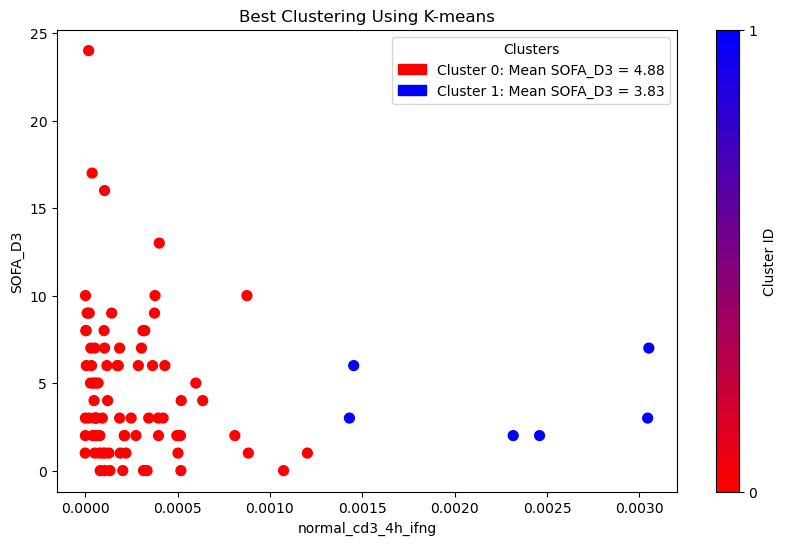

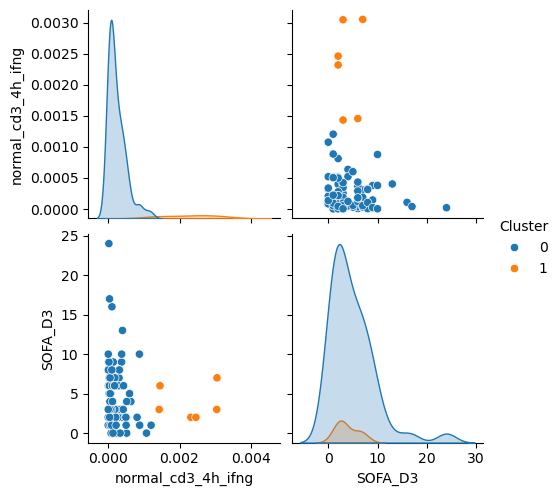

Best method: K-means
Best subset of columns: ('normal_cd3_4h_ifng',)
Best metrics: {'Silhouette': 0.8390795168728242, 'Davies_Bouldin': 0.37193635803036407, 'Composite': 0.3103090972238844}


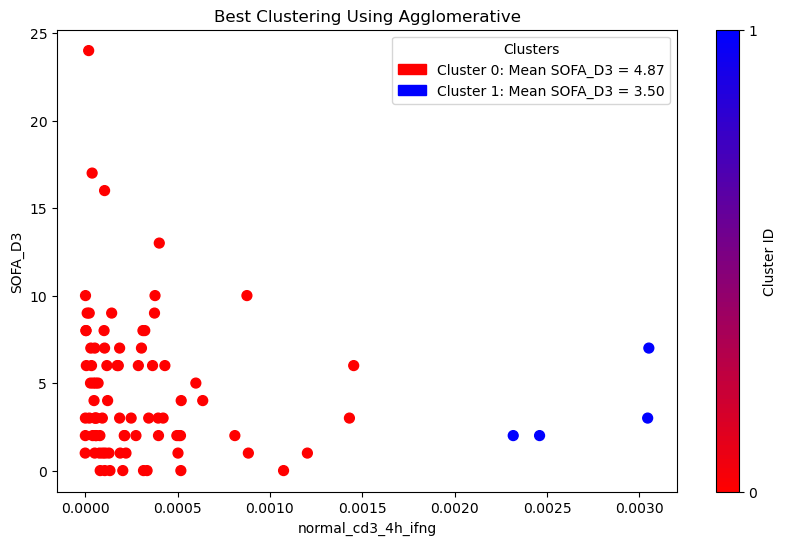

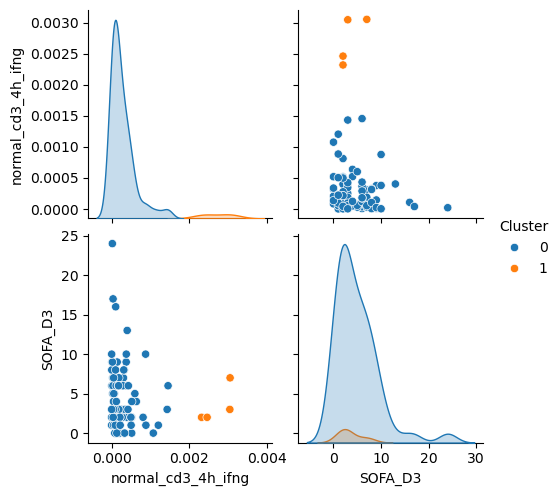

Best method: Agglomerative
Best subset of columns: ('normal_cd3_4h_ifng',)
Best metrics: {'Silhouette': 0.8600388082977751, 'Davies_Bouldin': 0.22477797912631575, 'Composite': 0.2799495822133917}


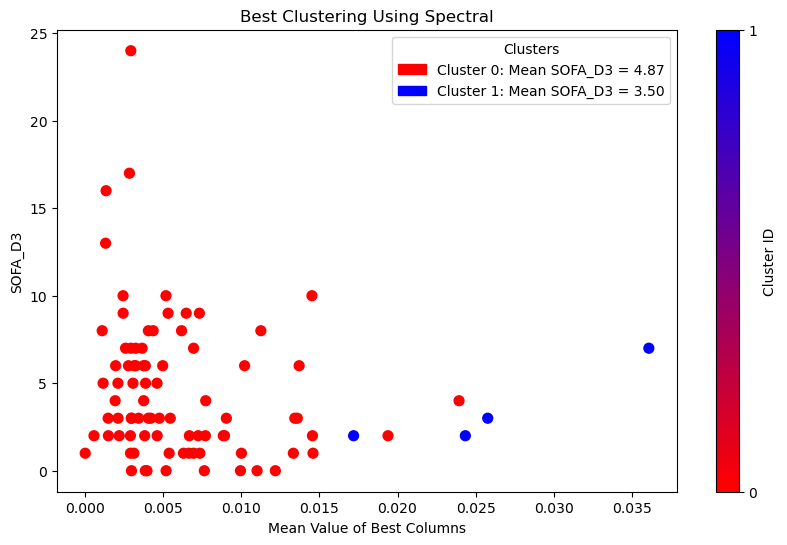

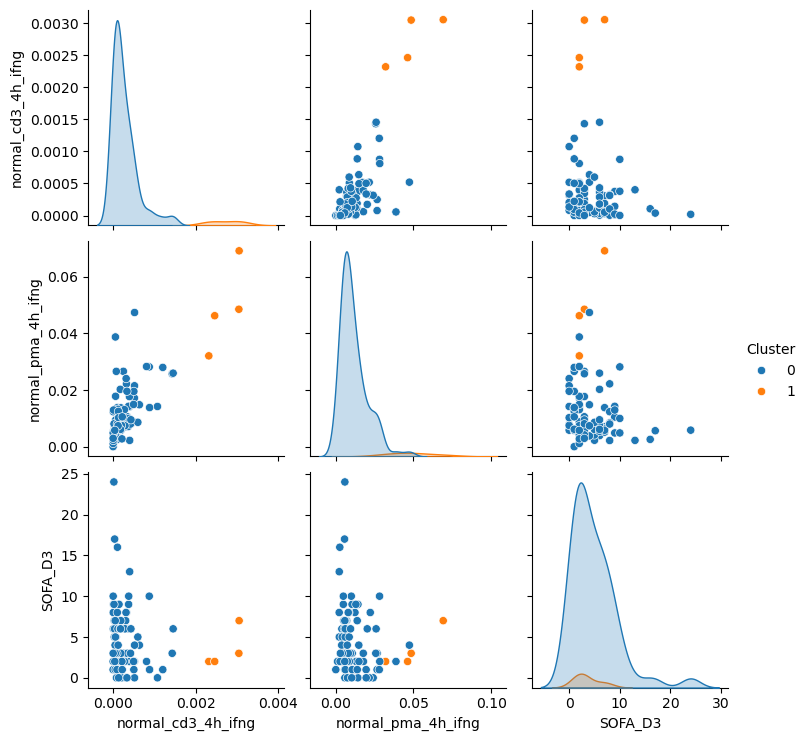

Best method: Spectral
Best subset of columns: ('normal_cd3_4h_ifng', 'normal_pma_4h_ifng')
Best metrics: {'Silhouette': 0.7915169443053308, 'Davies_Bouldin': 0.34678413899513966, 'Composite': 0.21416680261934182}


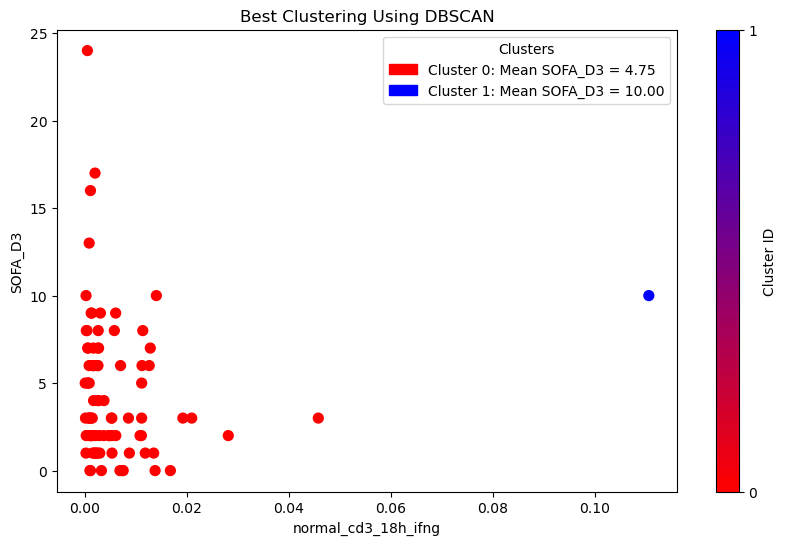

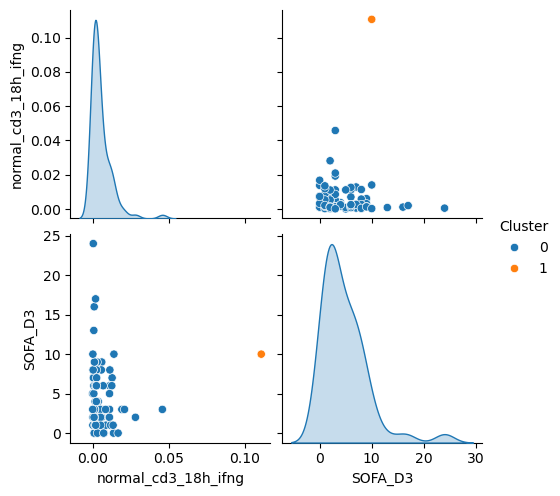

Best method: DBSCAN
Best subset of columns: ('normal_cd3_18h_ifng',)
Best metrics: {'Silhouette': 0.9286866166163571, 'Davies_Bouldin': 0.0425683559412584, 'Composite': 0.8861182606750987}


In [56]:
#CELL 3 for figures

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from itertools import chain, combinations
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap that transitions from red to blue
colors = [(1, 0, 0), (0, 0, 1)]  # R -> B
n_bins = [3]  # Discretizes the interpolation into bins
cmap_name = "red_blue"
red_blue_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Data Preparation
def load_data(filename):
    df = pd.read_csv(filename)
    return df

def impute_sofa_day3(row):
    if pd.isna(row['SOFA_D3']):
        if row['30day_mortality'] == 1 and (row['dud'] == 2 or row['dud'] == 3):
            return 24
        else:
            return np.nan
    return row['SOFA_D3']

def prepare_data(df, columns_of_interest):
    df['SOFA_D3'] = df.apply(impute_sofa_day3, axis=1)
    df.dropna(subset=['SOFA_D3'], inplace=True)
    df[columns_of_interest] = np.log1p(df[columns_of_interest])
    return df

# Clustering Functions
def perform_kmeans(X_scaled, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    return labels

def perform_agglomerative(X_scaled, num_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    labels = agglomerative.fit_predict(X_scaled)
    return labels

def perform_spectral(X_scaled, num_clusters):
    spectral = SpectralClustering(n_clusters=num_clusters, random_state=42)
    labels = spectral.fit_predict(X_scaled)
    return labels

def perform_dbscan(X_scaled):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    return labels

# Evaluation Metrics
def evaluate_clustering_with_labels(df, labels):
    unique_clusters = np.unique(labels)
    
    if len(unique_clusters) <= 1:
        print(f"Only {len(unique_clusters)} unique cluster(s) found. Skipping...")
        return -1, float('inf')  # Return an invalid silhouette score and Davies-Bouldin score
    
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    return silhouette, davies_bouldin


# Reporting and Plotting
def plot_results(df, best_method, best_columns, labels):
    plt.figure(figsize=(10, 6))
    if len(best_columns) > 1:
        x_values = df[list(best_columns)].mean(axis=1)
        x_label = 'Mean Value of Best Columns'
    else:
        x_values = df[list(best_columns)[0]]
        x_label = list(best_columns)[0]
        
    scatter = plt.scatter(x_values, df['SOFA_D3'], c=labels, cmap=red_blue_cmap, s=50)
    cbar = plt.colorbar(scatter, ticks=np.arange(0, np.max(labels) + 1))
    cbar.set_label('Cluster ID')
    
    legend_patches = []
    for cluster_id in np.unique(labels):
        mean_sofa = df[labels == cluster_id]['SOFA_D3'].mean()
        patch = mpatches.Patch(color=red_blue_cmap(cluster_id / np.max(labels)), label=f"Cluster {cluster_id}: Mean SOFA_D3 = {mean_sofa:.2f}")
        legend_patches.append(patch)
        
    plt.legend(handles=legend_patches, title='Clusters')
    plt.xlabel(x_label)
    plt.ylabel('SOFA_D3')
    plt.title(f'Best Clustering Using {best_method}')
    plt.savefig(f"Best_Clustering_Using_{best_method}.png")
    plt.show()

def report_results(best_method, best_columns, best_metrics):
    print(f"Best method: {best_method}")
    print(f"Best subset of columns: {best_columns}")
    print(f"Best metrics: {best_metrics}")

# Main Code
if __name__ == "__main__":
    # Parameters
    columns_of_interest = [
        'normal_cd3_4h_ifng', 'normal_cd3_18h_ifng',
        'normal_pma_4h_ifng', 'normal_pma_18h_ifng',
        'lps_4h_tnf', 'lps_18h_tnf', 'lps_4h_il6', 'lps_18h_il6'
    ]
    methods = ['K-means', 'Agglomerative', 'Spectral', 'DBSCAN']
   
    best_metrics_by_method = {}
    best_columns_by_method = {}
    best_labels_by_method = {}
    temp_best_labels_by_method = {}
    
    # Load and prepare data
    df = load_data('20231026_Data_combined_python_D1.csv')
    df = prepare_data(df, columns_of_interest)

    best_method = None
    best_columns = None
    best_metrics = {
        'Silhouette': -1,
        'Davies_Bouldin': float('inf'),
        'Composite': -float('inf')
    }
    best_labels = None  # Add this to keep track of the best labels

    # Function to get all non-empty subsets of a list
    def all_subsets(lst):
        return chain(*[combinations(lst, i + 1) for i, _ in enumerate(lst)])

    # Iterate through all non-empty subsets of columns_of_interest
    for cols in all_subsets(columns_of_interest):
        for method in methods:
            # Data scaling
            print(f"Running {method} with columns {cols}")
            imputer = SimpleImputer(strategy="mean")
            df_imputed = imputer.fit_transform(df[list(cols)])
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(df_imputed)
            best_silhouette = -1
            best_num_clusters = 0

            temp_best_labels = None  # Temporary variable to hold the best labels for this iteration
          
            # Empirically determine the best number of clusters
            for num_clusters in range(2, 11):  # Search between 2 and 10 clusters
                print(f"Best silhouette for {method} is {best_silhouette}")
                if method == 'K-means':
                    labels = perform_kmeans(X_scaled, num_clusters)
                elif method == 'Agglomerative':
                    labels = perform_agglomerative(X_scaled, num_clusters)
                elif method == 'Spectral':
                    labels = perform_spectral(X_scaled, num_clusters)
                silhouette, davies_bouldin = evaluate_clustering_with_labels(X_scaled, labels)

                # Update temporary best labels
                if silhouette > best_silhouette:
                   best_silhouette = silhouette
                   temp_best_labels_by_method[method] = labels  # Update the best labels for this method and iteration
            
            # No need to perform final clustering. Use the best labels obtained in this iteration.
            labels = temp_best_labels_by_method.get(method, np.array([-1] * len(df)))  # Use -1 as default label if no label is found
       
            # Evaluate clustering
            composite = silhouette - davies_bouldin
            print(f"Evaluating {method} with labels {labels}")  # Diagnostic print
            silhouette, davies_bouldin = evaluate_clustering_with_labels(X_scaled, labels)
      

             # Update best method, columns, and metrics
            if method not in best_metrics_by_method or composite > best_metrics_by_method[method]['Composite']:
                best_metrics_by_method[method] = {
                    'Silhouette': silhouette,
                    'Davies_Bouldin': davies_bouldin,
                    'Composite': composite
                }
                best_columns_by_method[method] = cols
                best_labels_by_method[method] = labels


for method in methods:
    if method in best_metrics_by_method:
        # Your existing plotting code
        plot_results(df, method, best_columns_by_method[method], best_labels_by_method[method])
        
        # New pairplot code
        best_cols = list(best_columns_by_method[method])
        pairplot_df = df[best_cols + ['SOFA_D3']].copy()
        pairplot_df['Cluster'] = best_labels_by_method[method]
        sns.pairplot(pairplot_df, hue='Cluster', diag_kind='kde')
        plt.title('')
        plt.savefig(f"Pairplot_for_{method}.png")
        plt.show()
        
        # Your existing reporting code
        report_results(method, best_columns_by_method[method], best_metrics_by_method[method])
